<a href="https://colab.research.google.com/github/maimonahST/GP/blob/main/Preprocessing_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 33.0 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Sample

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P16_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...


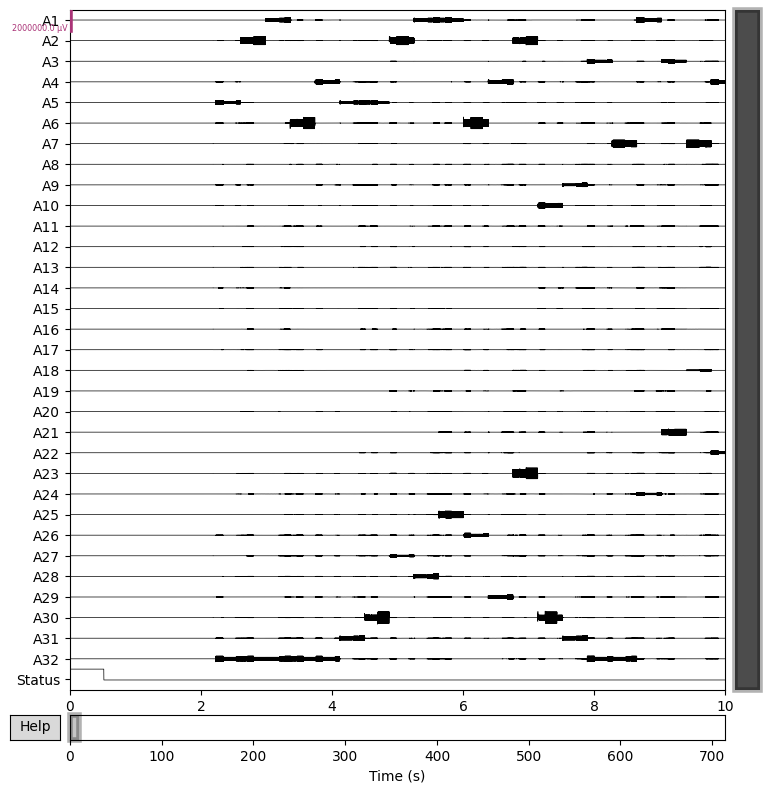

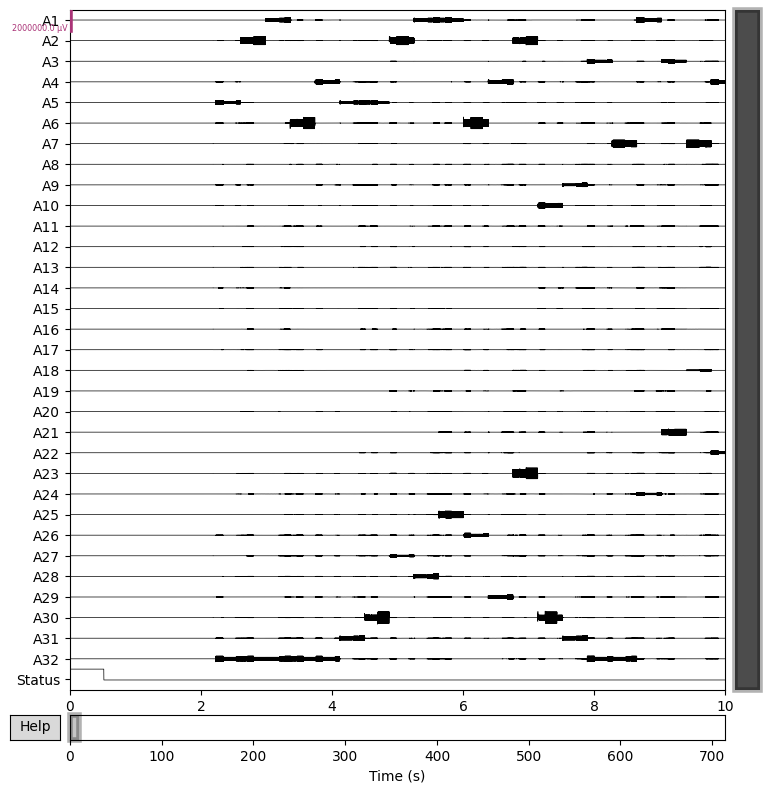

In [12]:
import mne
file_path = '/content/drive/MyDrive/GP/GP-Data/Ischaemia/P16_TD1.bdf'
raw = mne.io.read_raw_bdf(file_path, preload=True)

raw.plot(n_channels=len(raw.ch_names), scalings={'eeg': 1})

Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65285 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]


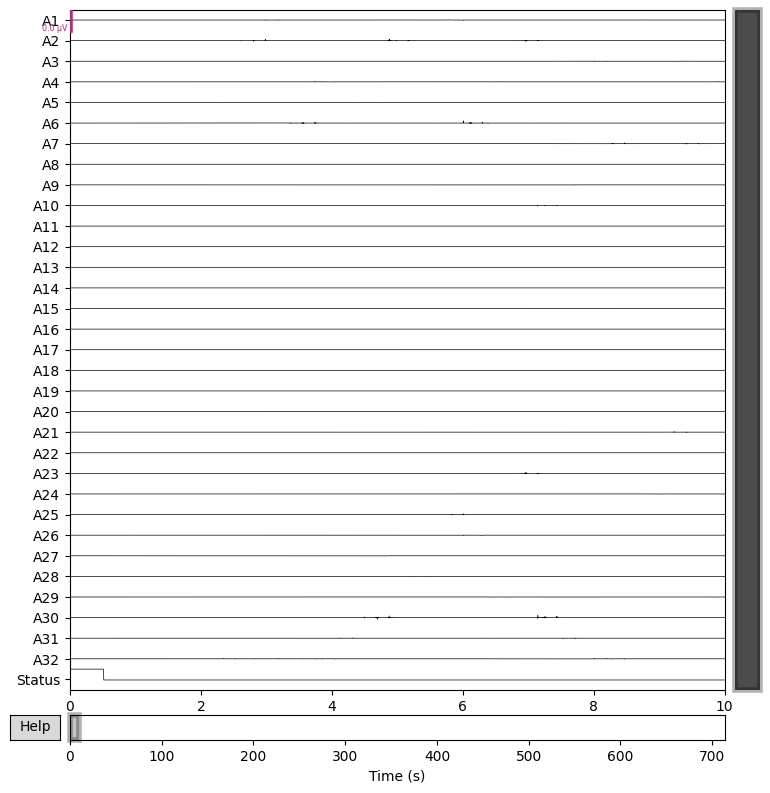

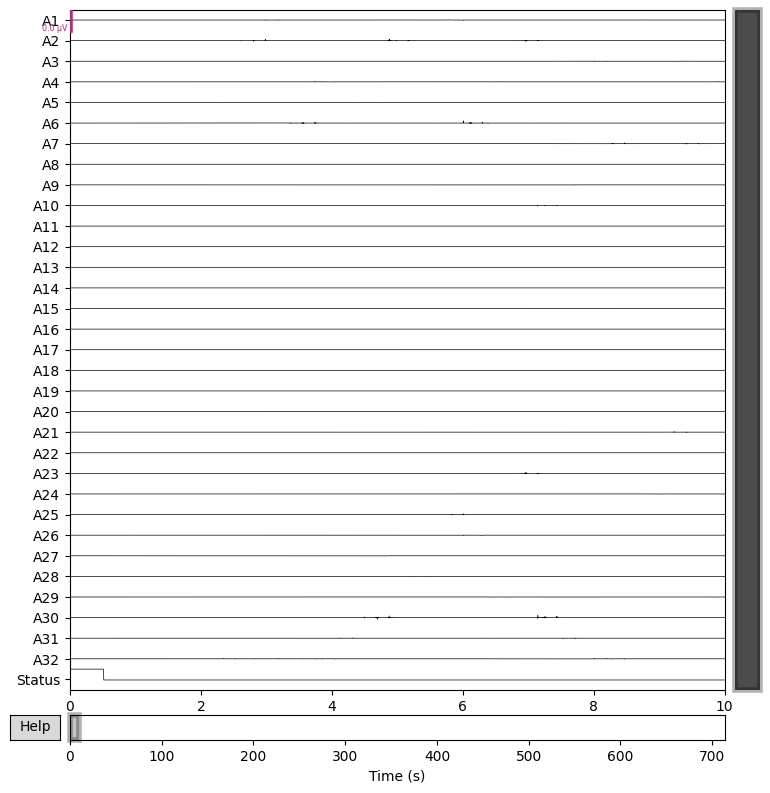

In [13]:
resampled = raw.copy().resample(250)
resampled.plot(n_channels=len(raw.ch_names), scalings={'eeg': 0})

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


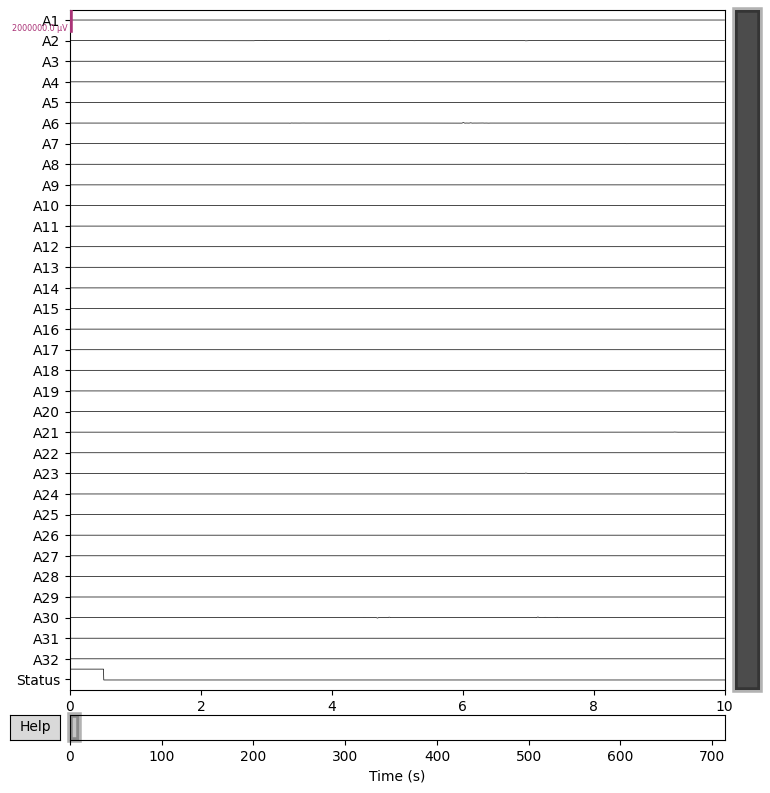

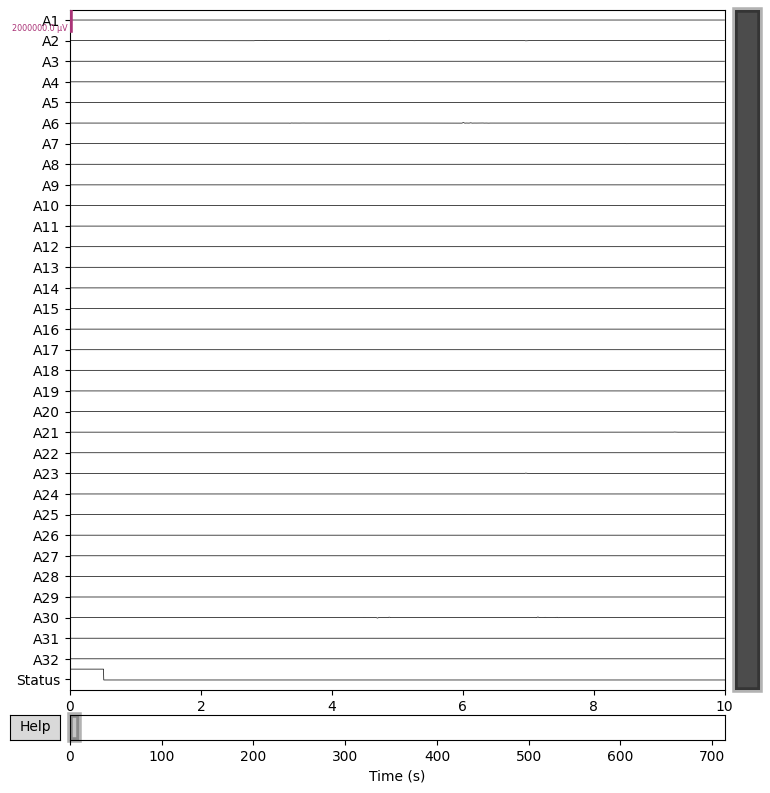

In [17]:
filterd = resampled.copy().filter(0.5, 25, fir_design='firwin')
filterd.plot(n_channels=len(raw.ch_names), scalings={'eeg': 1})

Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 81920 original time points ...
0 bad epochs dropped


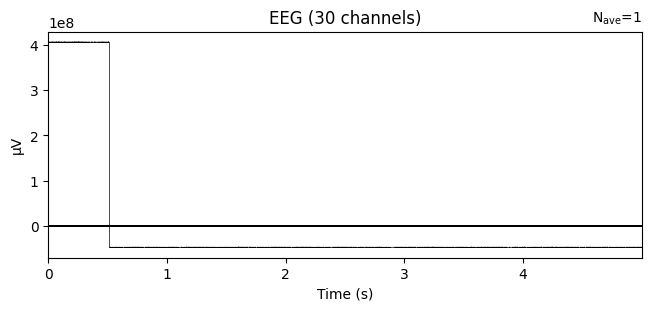

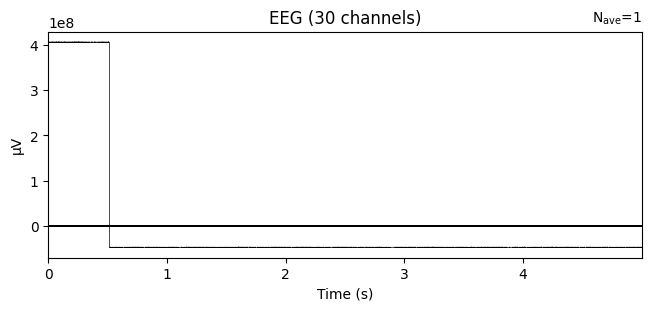

In [22]:
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA
import numpy as np


epochs = mne.make_fixed_length_epochs(raw, duration=5, overlap=0.1)

# Apply PCA
pca = UnsupervisedSpatialFilter(PCA(30), average=False)
X=epochs.get_data(copy=False)

pca_data = pca.fit_transform(X)
ev = mne.EvokedArray(
    np.mean(pca_data, axis=0),
    mne.create_info(30, epochs.info["sfreq"], ch_types="eeg")
)

# Plot PCA
ev.plot()

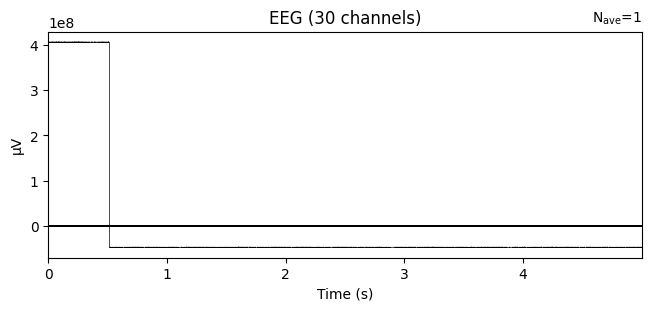

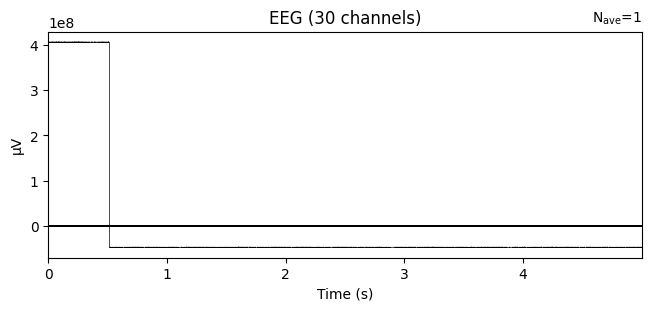

In [23]:
ev.plot(show=False, window_title="PCA", time_unit="s")

In [24]:
pca_data.shape # epochs , channels , samples

(145, 30, 81920)

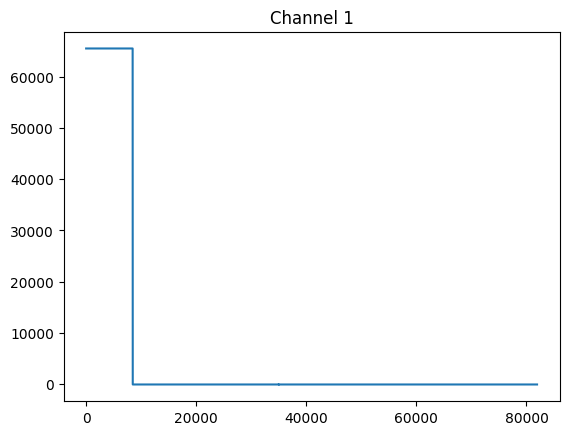

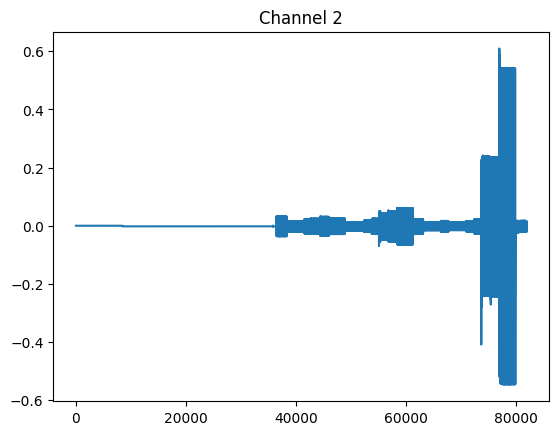

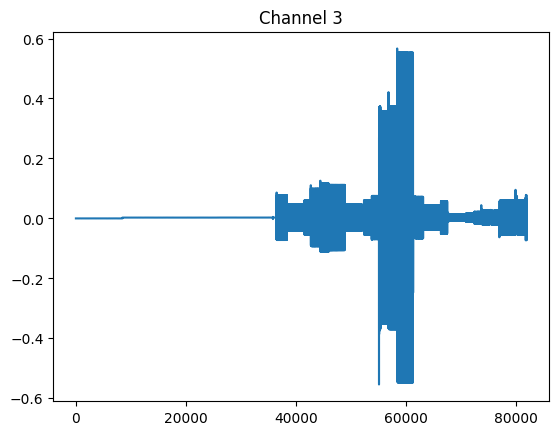

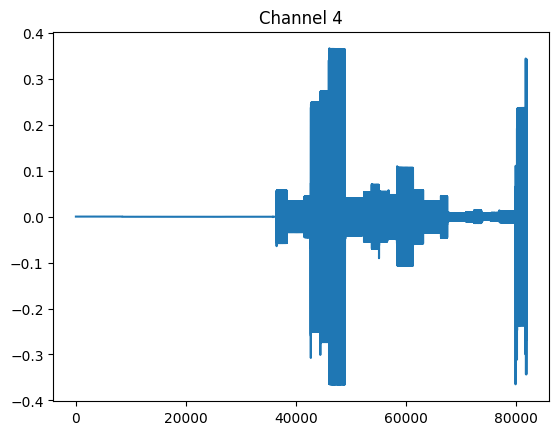

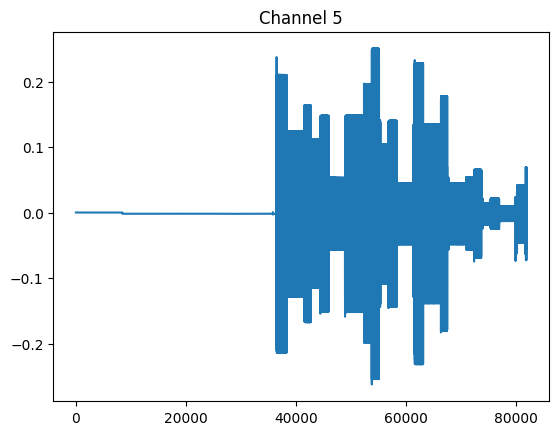

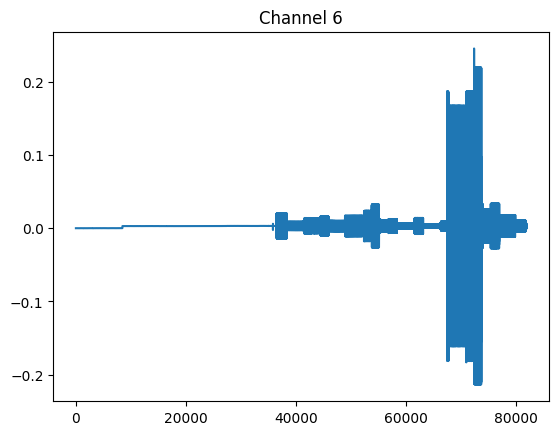

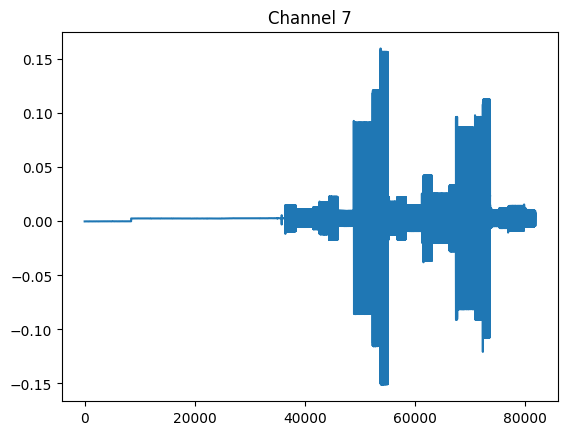

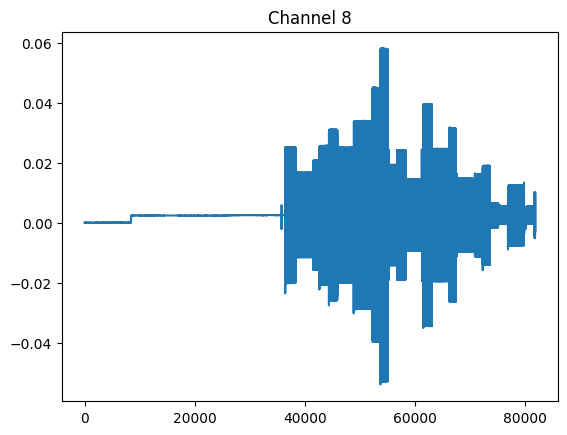

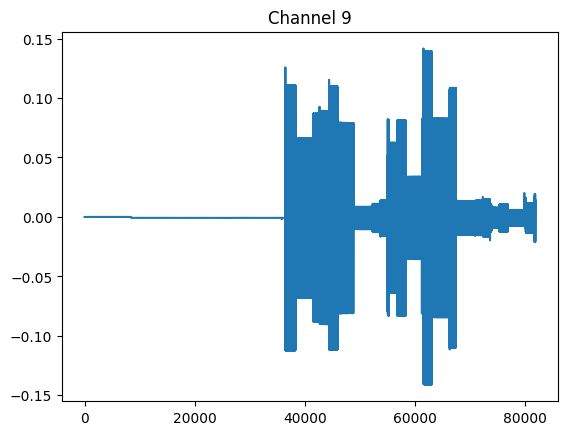

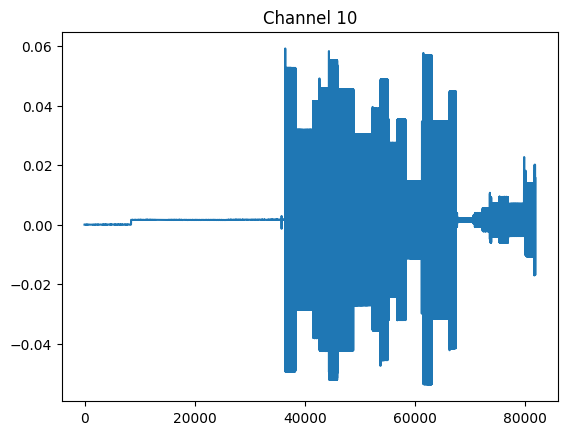

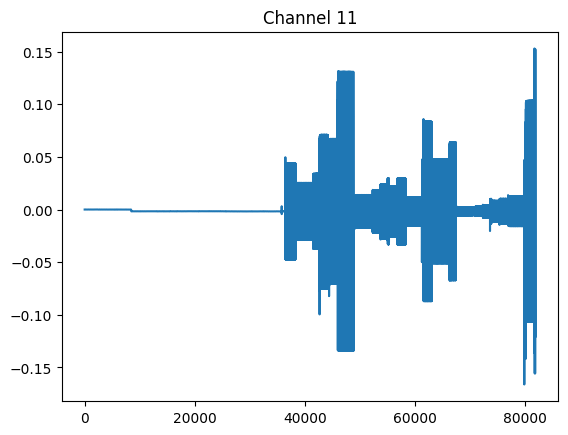

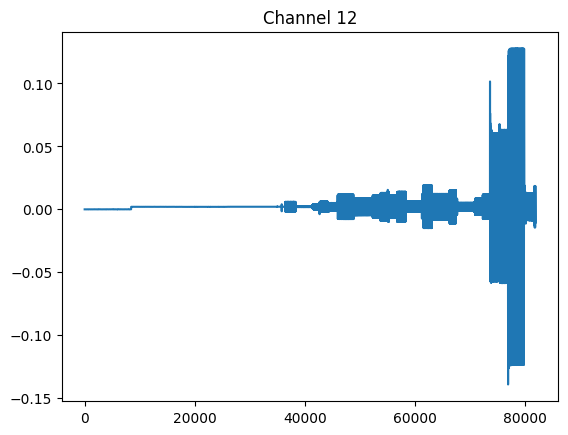

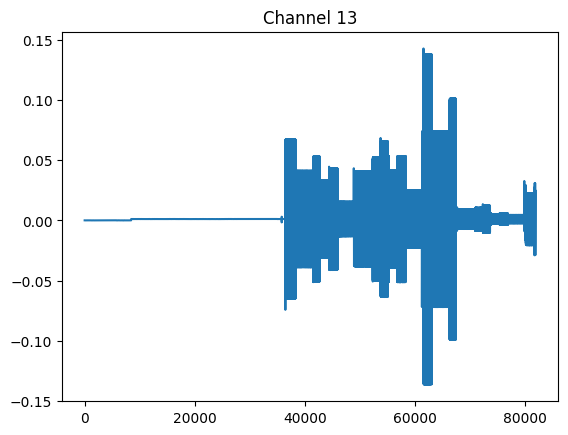

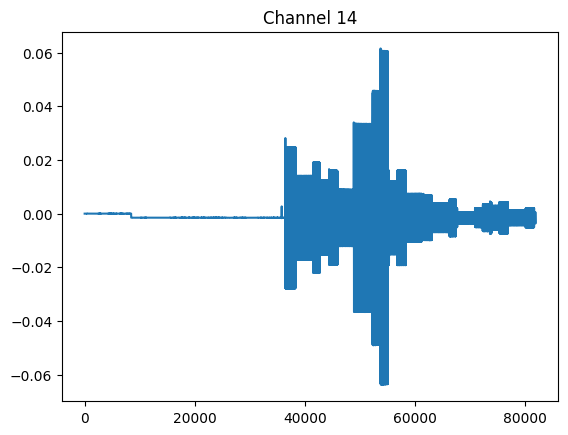

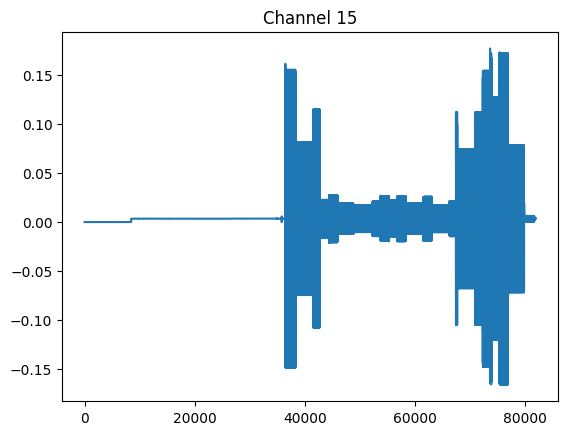

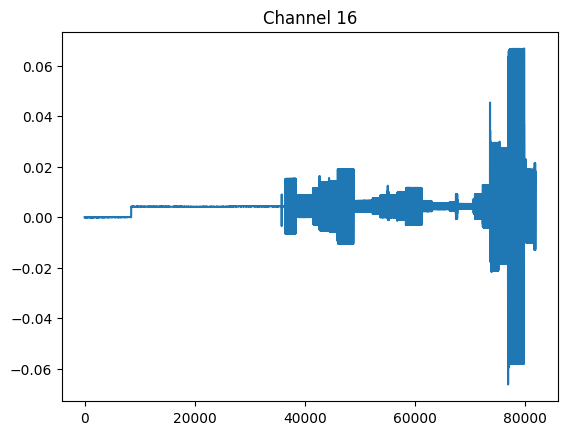

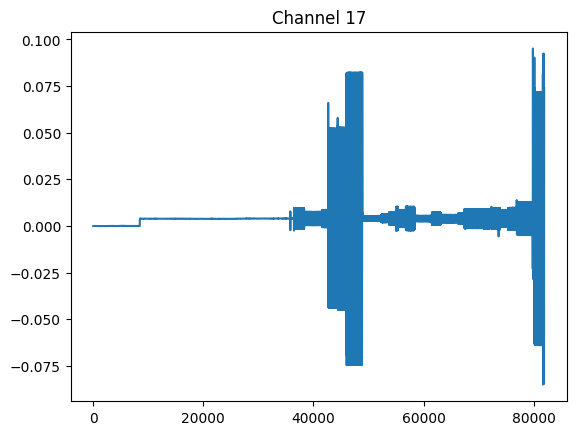

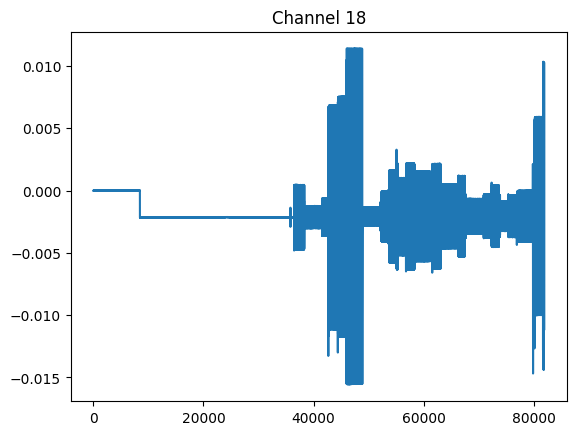

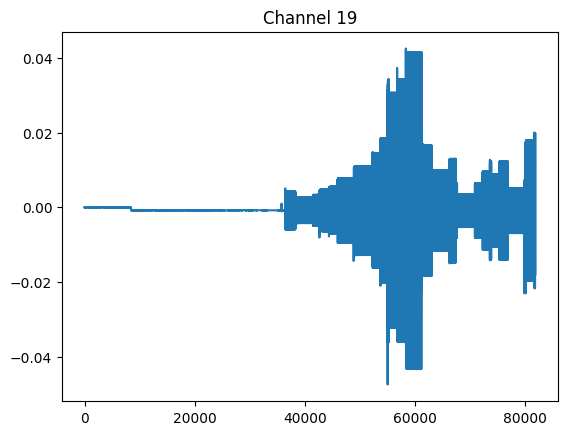

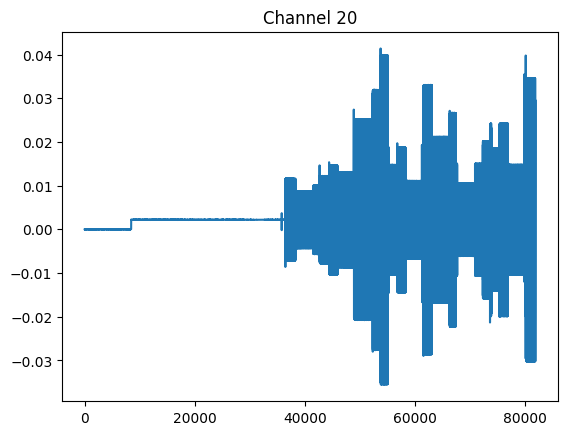

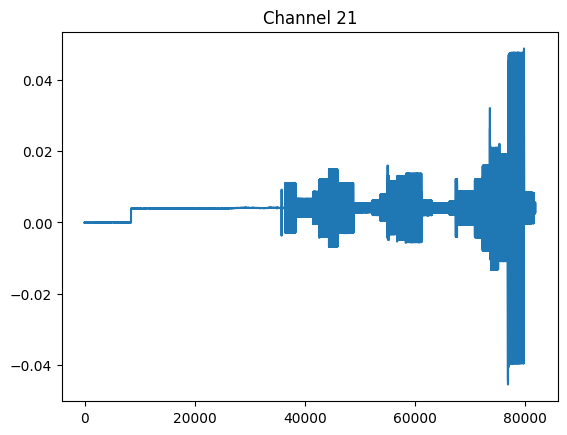

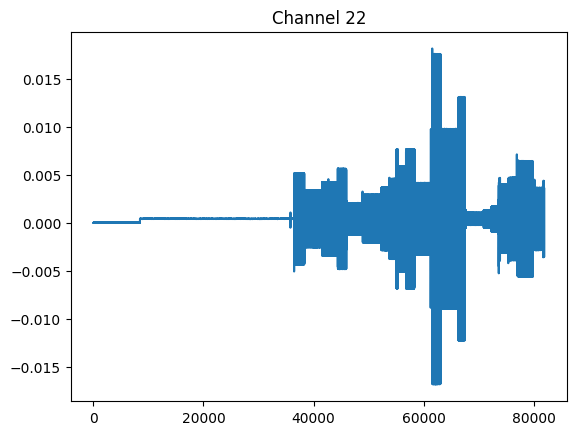

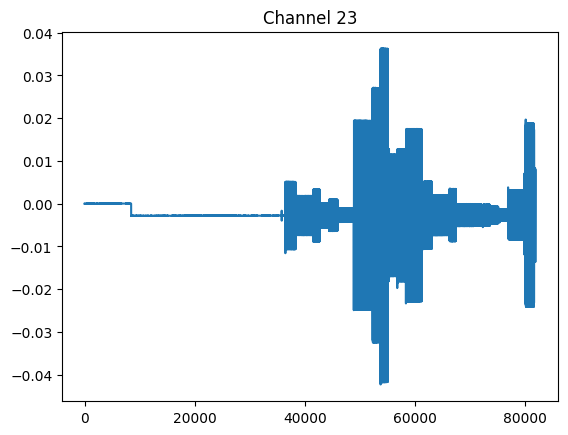

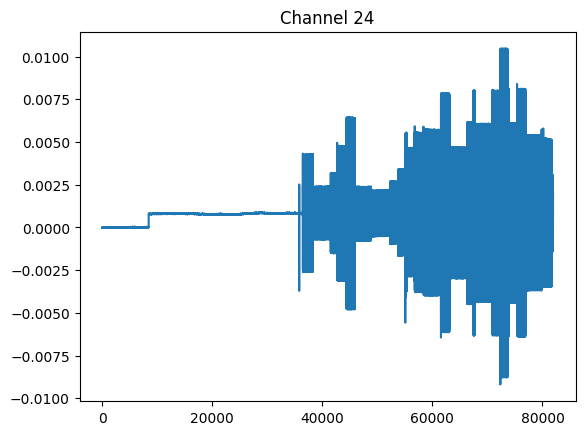

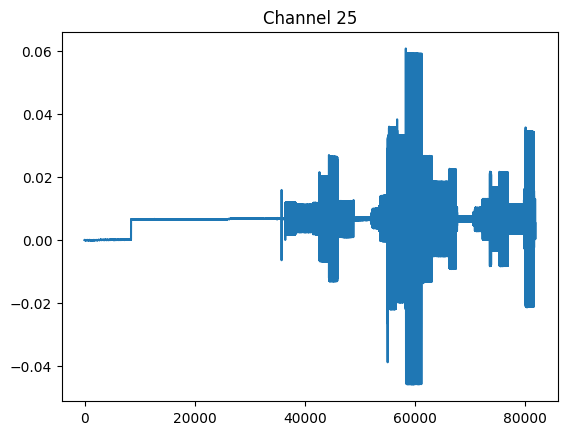

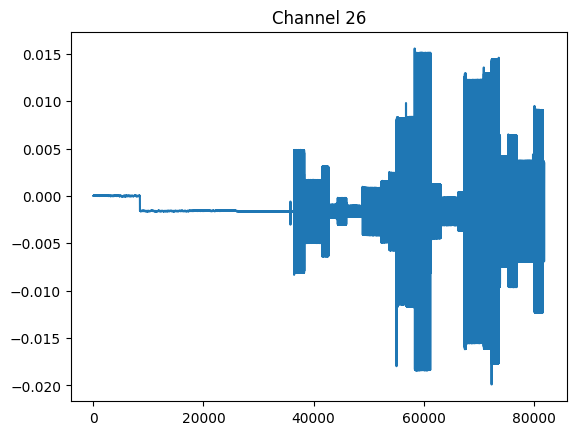

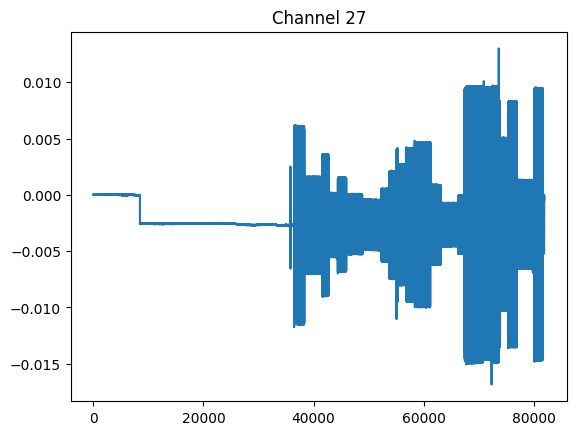

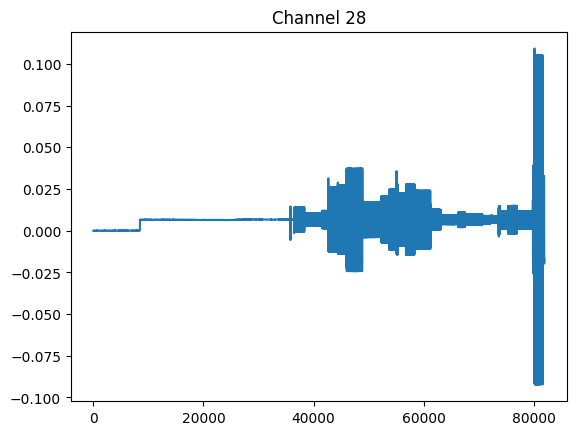

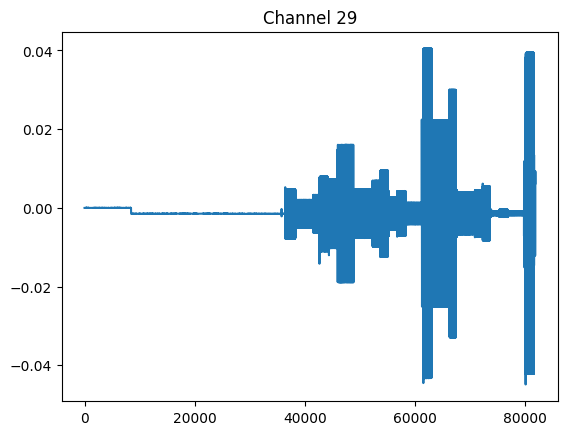

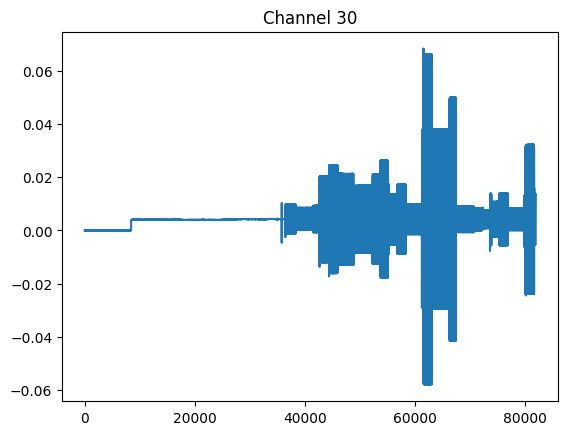

In [35]:
import matplotlib.pyplot as plt

# Plot PCA data for each channel
for i in range(pca_data.shape[1]):
    plt.plot(pca_data[0, i, :])
    plt.title(f'Channel {i+1}')
    plt.show()


# Preprocessing

Processing 0 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P2_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12238847  =      0.000 ...   747.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22491 events found on stim channel Status
Event IDs: [65284 65288 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329 65336]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2889 events found on stim channel Status
Event IDs: [65296 65297 65305 65312 65313 65328 65329]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  10%|█         | 1/10 [00:43<06:29, 43.26s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P3_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22496 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2826 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  20%|██        | 2/10 [01:25<05:40, 42.51s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P5_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12058623  =      0.000 ...   736.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2902 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  30%|███       | 3/10 [02:13<05:17, 45.33s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P10_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2752 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  40%|████      | 4/10 [02:58<04:30, 45.00s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P11_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2845 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain des

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  50%|█████     | 5/10 [03:42<03:43, 44.74s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P14_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2787 events found on stim channel Status
Event IDs: [65281 65296 65297 65312 65313 65328 65329]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-c

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  60%|██████    | 6/10 [04:32<03:05, 46.45s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P6b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2903 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  70%|███████   | 7/10 [05:18<02:18, 46.28s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P17_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12189695  =      0.000 ...   744.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2799 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed tim

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  80%|████████  | 8/10 [06:02<01:30, 45.47s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P20_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2862 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  90%|█████████ | 9/10 [06:46<00:45, 45.17s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed ti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P24_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11812863  =      0.000 ...   721.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2886 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  50%|█████     | 1/2 [00:43<00:43, 43.20s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17498111  =      0.000 ...  1068.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22476 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P1_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22488 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2825 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  10%|█         | 1/10 [00:43<06:30, 43.44s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2823 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desig

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  20%|██        | 2/10 [01:29<06:02, 45.27s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22478 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2866 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desig

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  30%|███       | 3/10 [02:13<05:11, 44.54s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P9_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13107199  =      0.000 ...   800.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [ 65281  65284  65296  65297  65301  65304  65305  65309  65311 130816]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [ 65281  65296  65297  65311 130816]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  40%|████      | 4/10 [03:00<04:33, 45.58s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 5/10 [03:47<03:49, 45.83s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11763711  =      0.000 ...   718.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2828 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  60%|██████    | 6/10 [04:32<03:02, 45.60s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P15_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22480 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2803 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  70%|███████   | 7/10 [05:15<02:14, 44.97s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P16_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65285 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  80%|████████  | 8/10 [06:00<01:29, 44.73s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2791 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
/usr/local/lib/python3.10/dist-packages/mne/viz/evoked.py:463: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(len(ch_types_used), 1, layout="constrained")
Processing 1 data:  90%|█████████ | 9/10 [06:44<00:44, 44.73s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P18_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2918 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:   0%|          | 0/4 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22497 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2932 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  25%|██▌       | 1/4 [00:46<02:20, 46.94s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2848 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 2/4 [01:30<01:29, 44.89s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2876 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
Processing 1 data:  75%|███████▌  | 3/4 [02:16<00:45, 45.59s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P26_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12206079  =      0.000 ...   745.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2864 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12042239  =      0.000 ...   735.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2844 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  10%|█         | 1/10 [00:44<06:40, 44.53s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S2a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2895 events found on stim channel Status
Event IDs: [65281 65296 65297 65305]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  20%|██        | 2/10 [01:29<05:59, 44.99s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12746751  =      0.000 ...   778.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  30%|███       | 3/10 [02:15<05:17, 45.33s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2802 events found on stim channel Status
Event IDs: [65281 65292 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  40%|████      | 4/10 [03:01<04:33, 45.60s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2857 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  50%|█████     | 5/10 [03:45<03:44, 44.87s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2800 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  60%|██████    | 6/10 [04:29<02:58, 44.61s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2874 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  70%|███████   | 7/10 [05:13<02:13, 44.49s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2875 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  80%|████████  | 8/10 [05:58<01:28, 44.49s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2831 events found on stim channel Status
Event IDs: [65281 65296 65297 65301 65304]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  90%|█████████ | 9/10 [06:41<00:44, 44.20s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11714559  =      0.000 ...   715.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2870 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65289 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2807 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  11%|█         | 1/9 [00:44<05:54, 44.32s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22473 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2868 events found on stim channel Status
Event IDs: [65281 65284 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  22%|██▏       | 2/9 [01:30<05:16, 45.16s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2883 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  33%|███▎      | 3/9 [02:14<04:29, 44.94s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2917 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  44%|████▍     | 4/9 [02:58<03:41, 44.38s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11960319  =      0.000 ...   730.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2854 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  56%|█████▌    | 5/9 [03:43<02:58, 44.52s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12419071  =      0.000 ...   758.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  67%|██████▋   | 6/9 [04:29<02:15, 45.30s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  78%|███████▊  | 7/9 [05:14<01:30, 45.23s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12795903  =      0.000 ...   781.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2885 events found on stim channel Status
Event IDs: [65281 65288 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  89%|████████▉ | 8/9 [06:00<00:45, 45.37s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data: 100%|██████████| 9/9 [06:45<00:00, 45.07s/it]


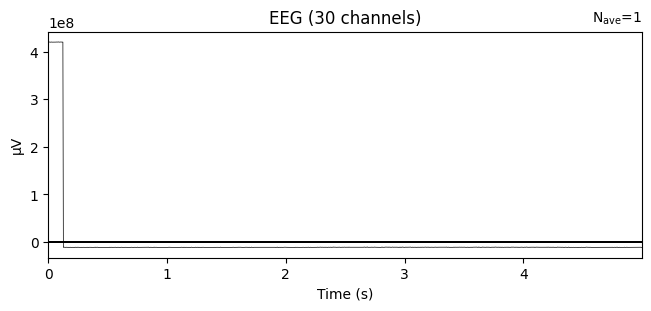

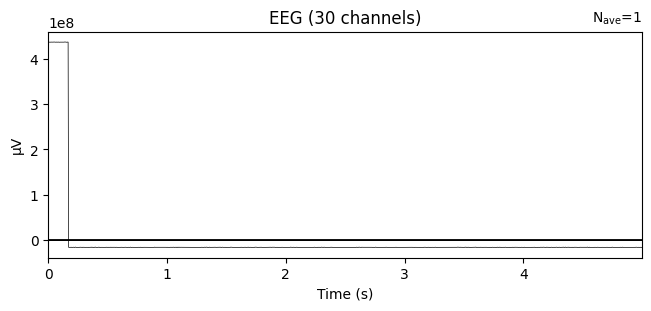

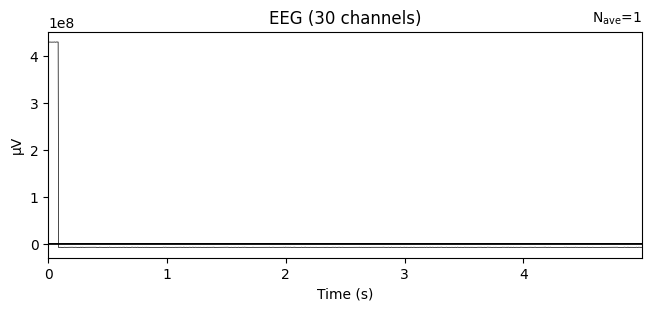

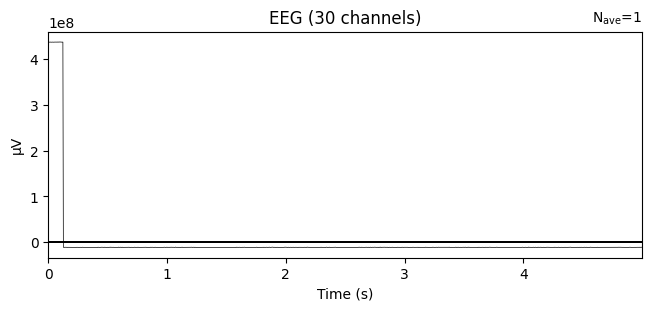

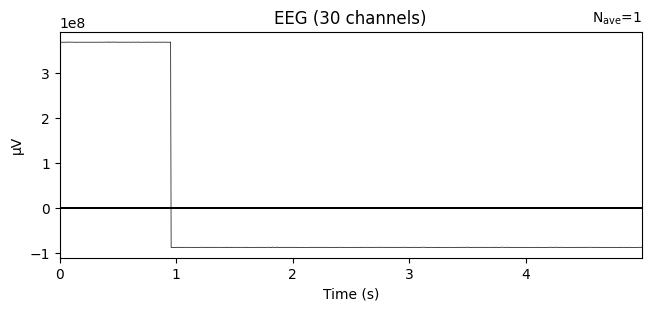

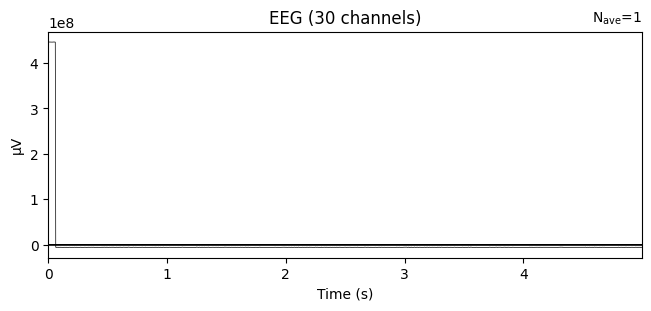

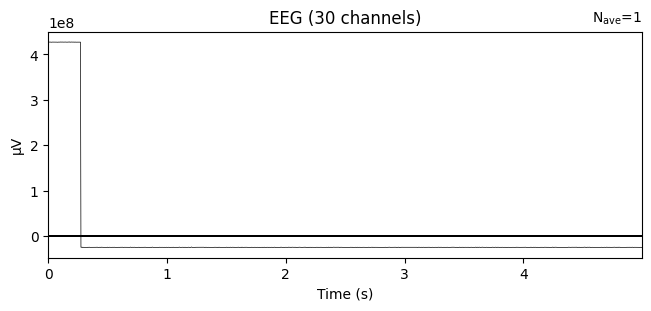

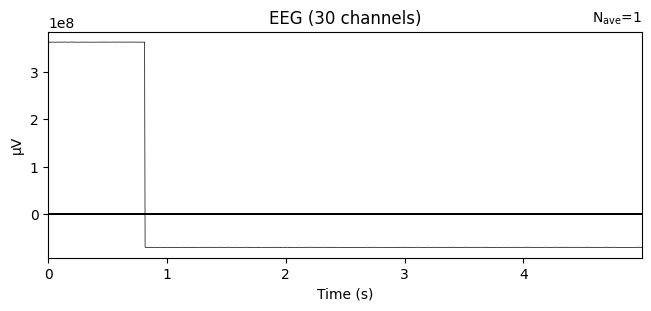

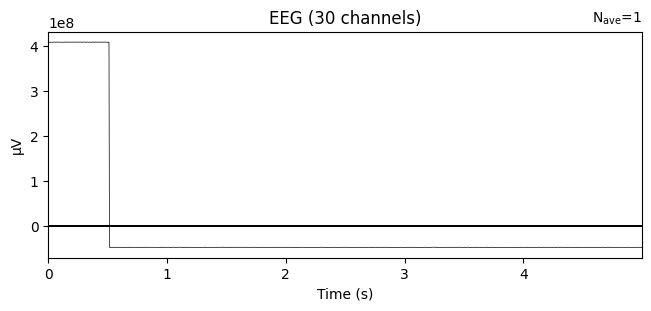

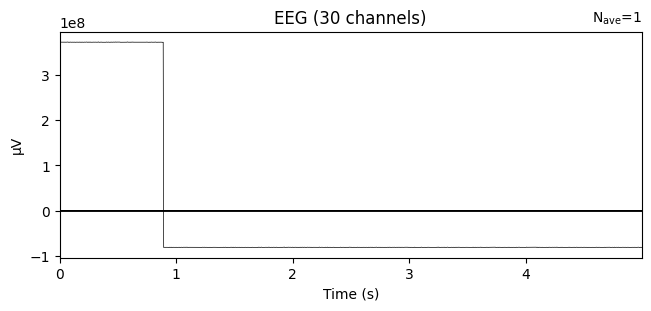

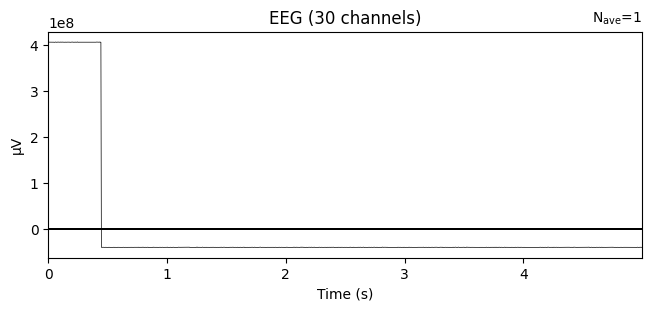

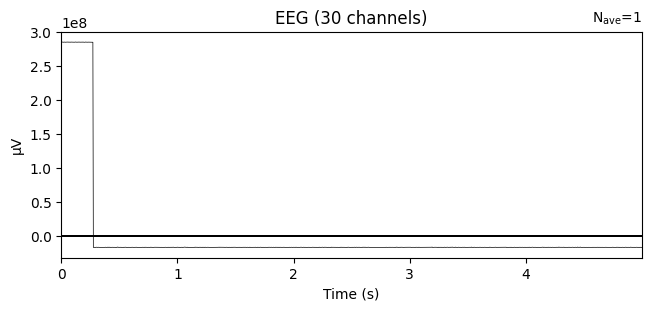

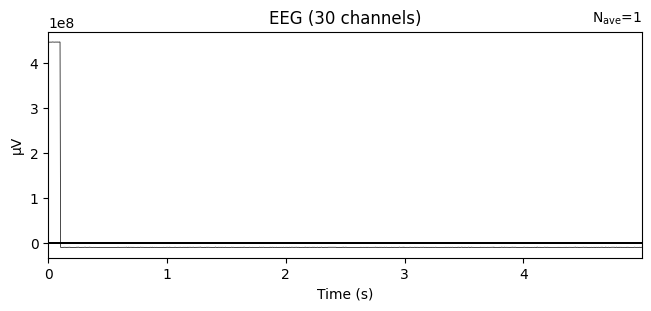

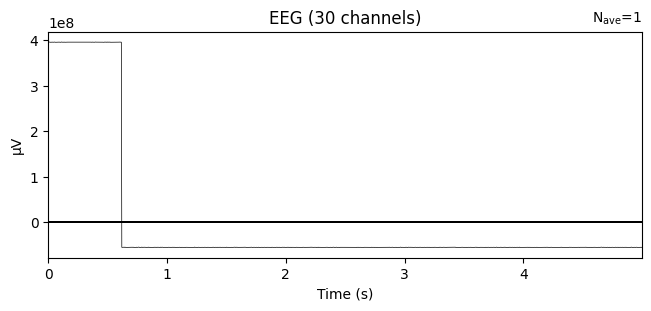

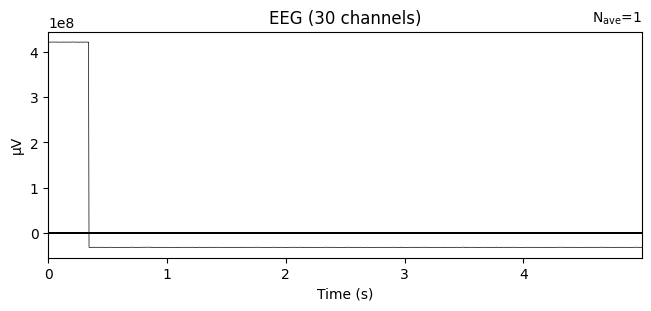

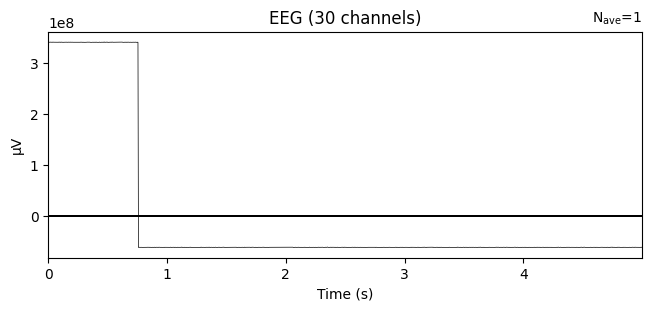

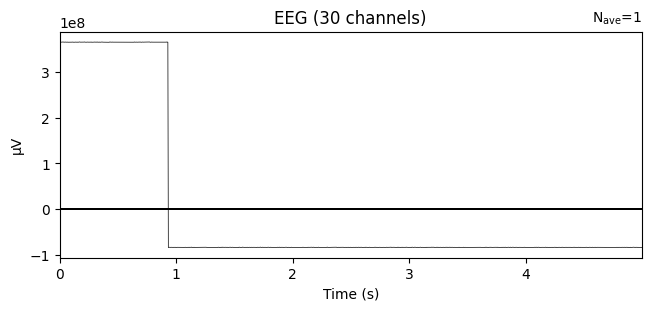

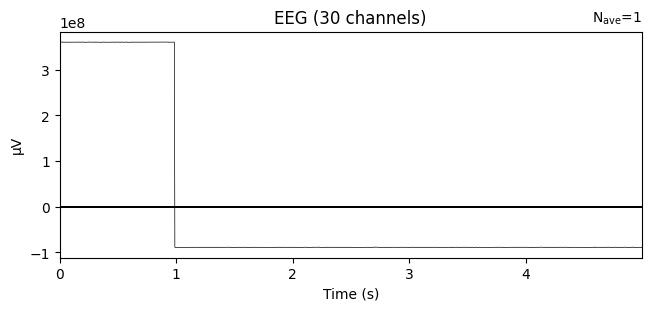

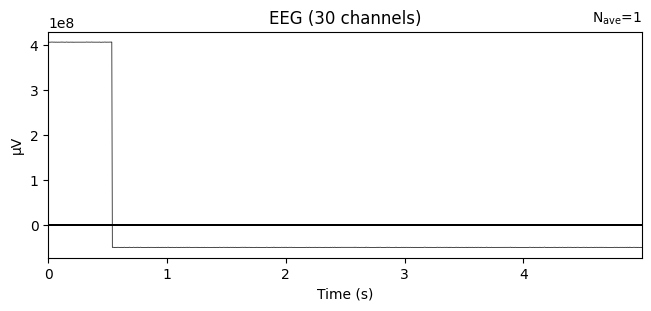

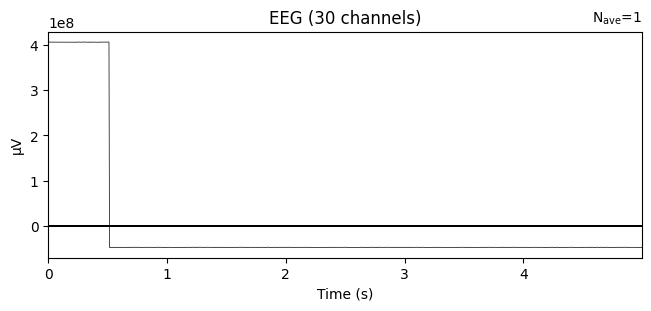

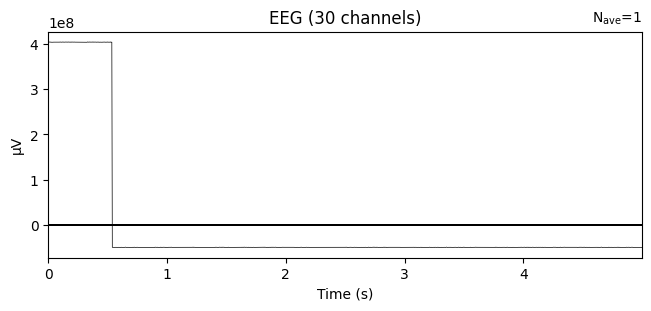

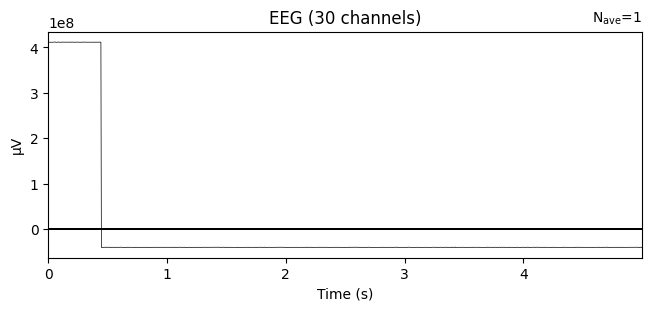

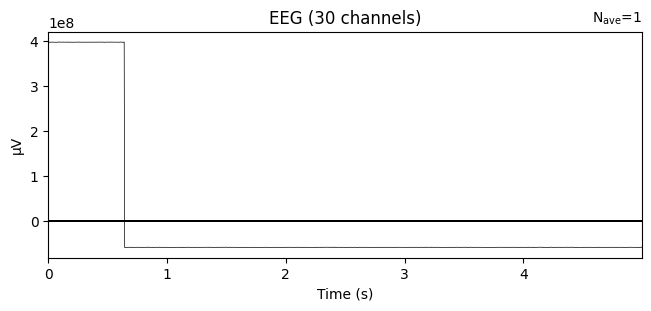

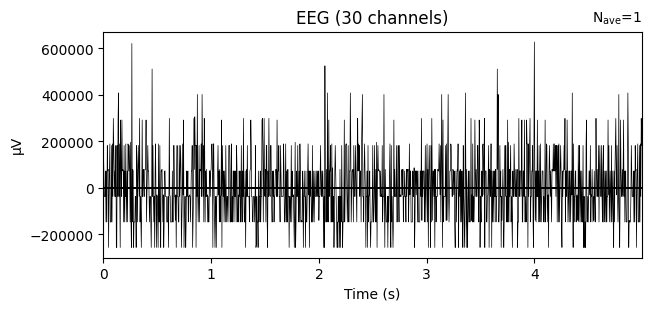

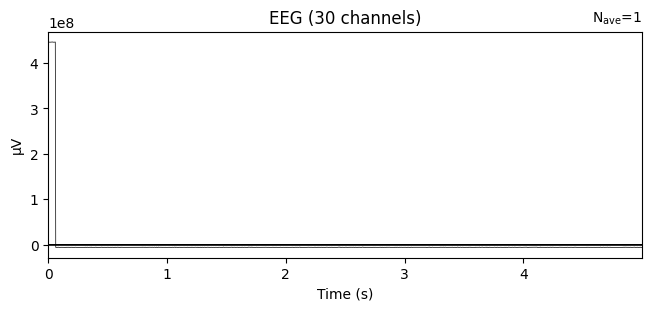

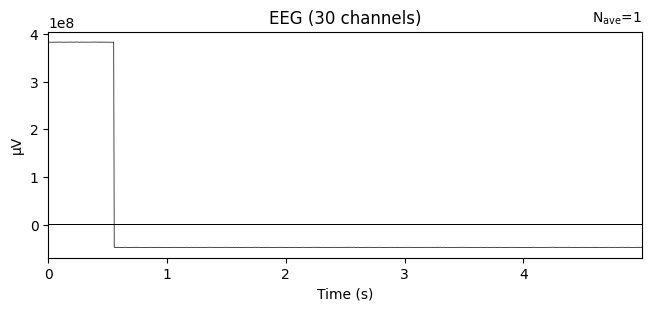

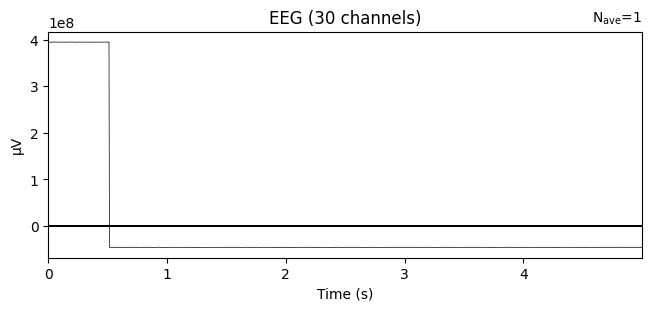

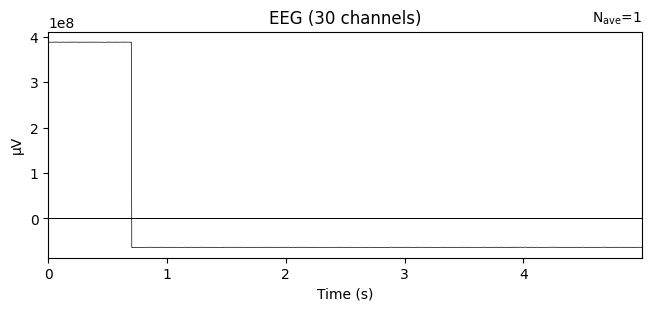

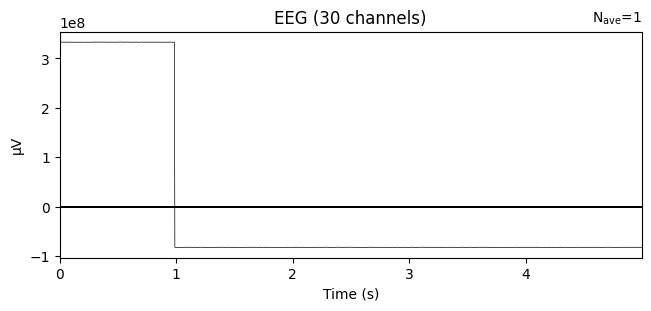

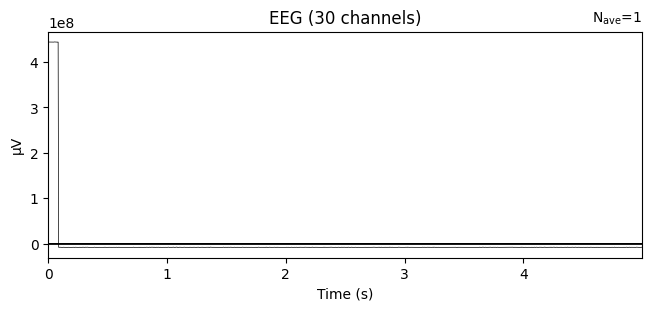

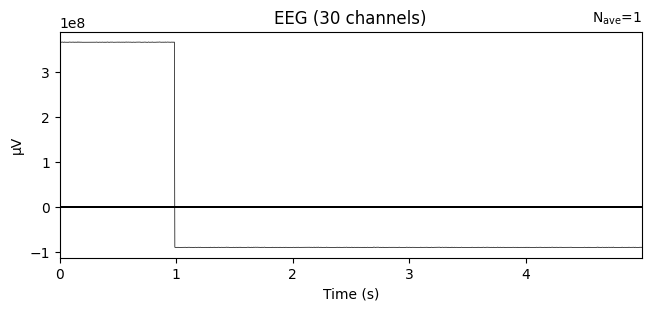

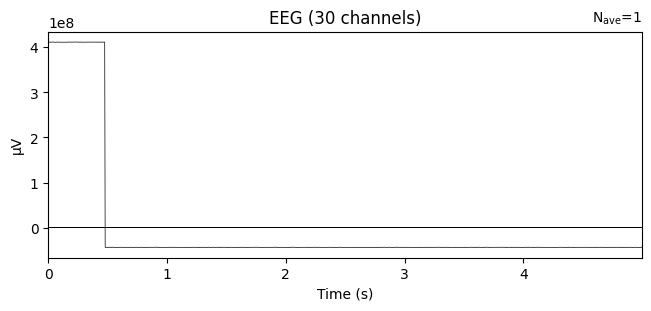

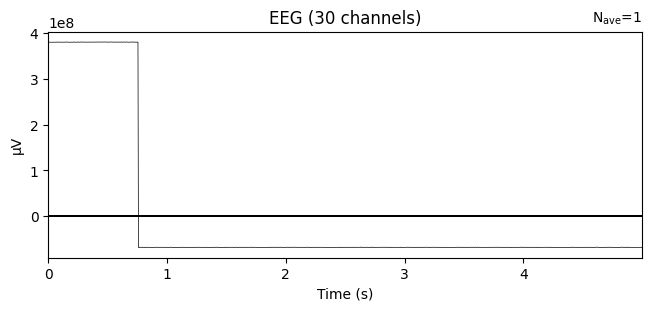

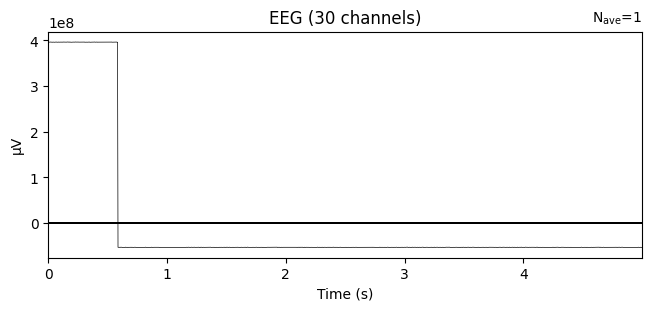

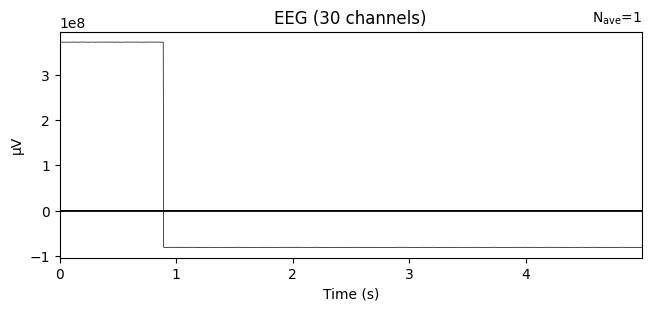

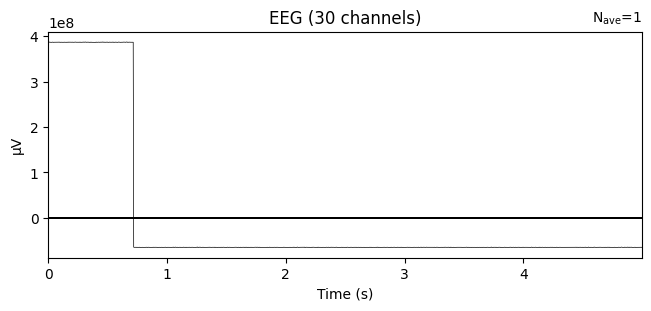

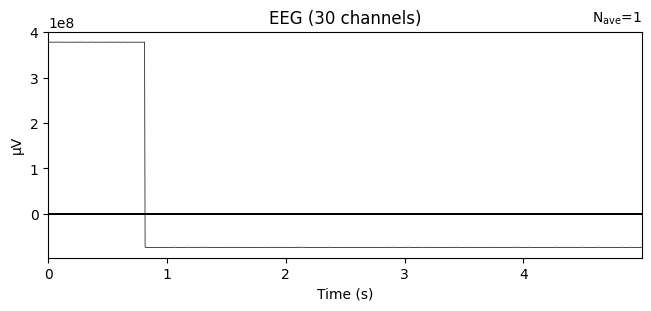

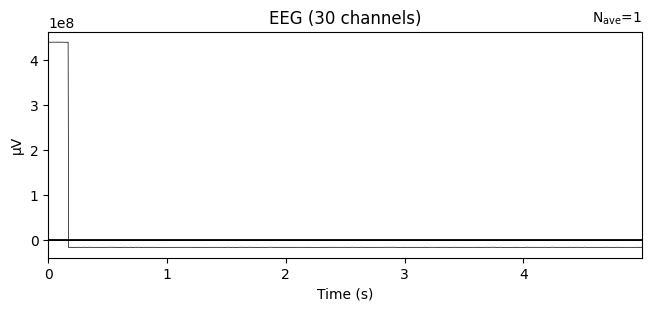

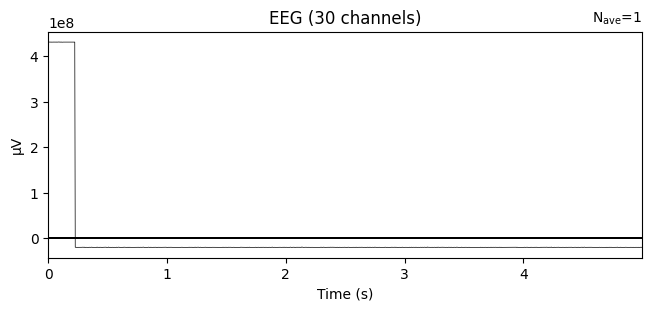

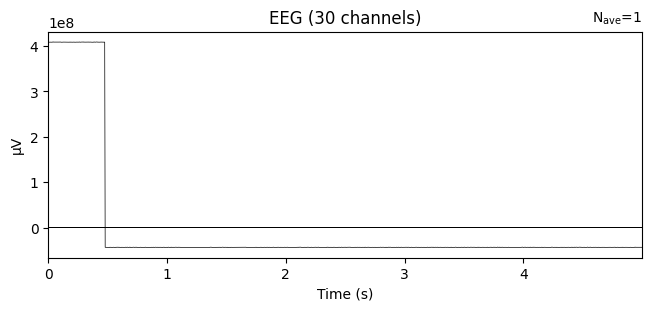

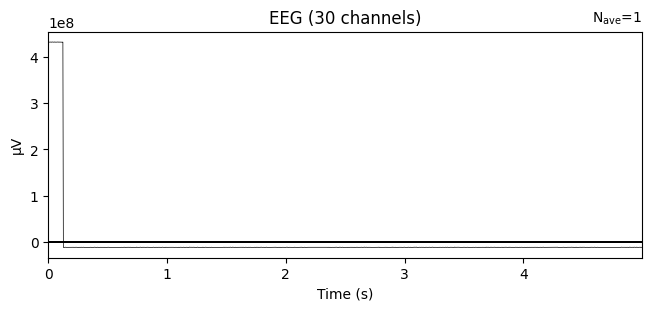

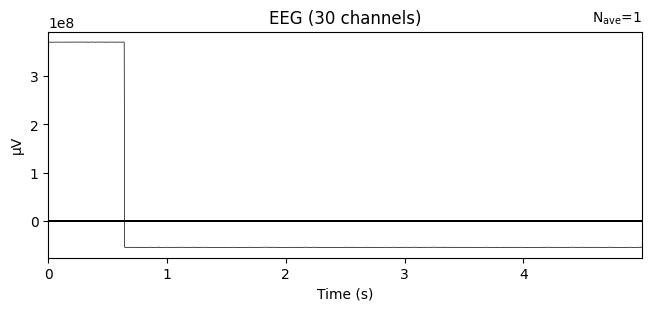

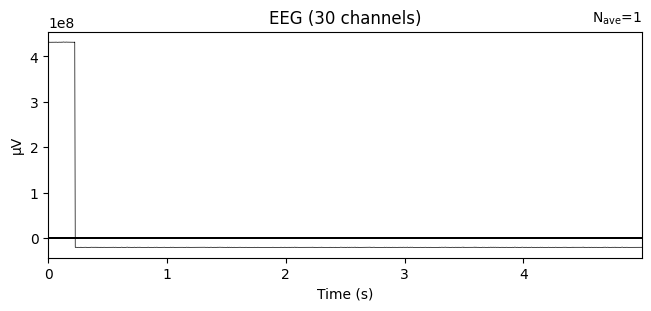

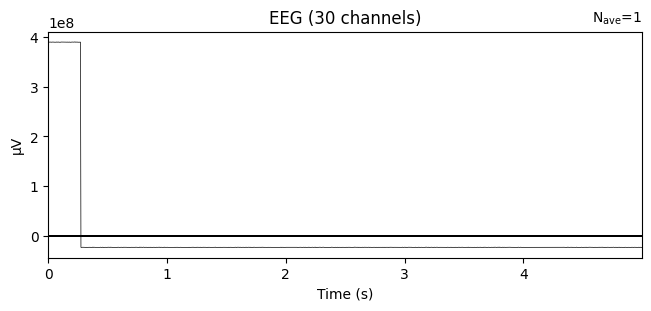

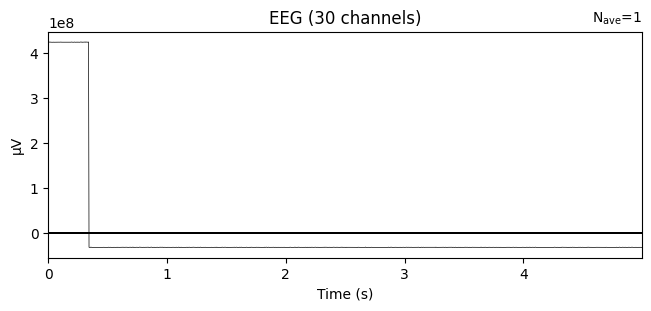

In [ ]:
from glob import glob
import mne
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mne.decoding import UnsupervisedSpatialFilter

def read_data(file_path):
    raw = mne.io.read_raw_bdf(file_path, preload=True)
    raw.set_eeg_reference()

    # Downsampling
    raw.resample(250)
    raw.filter(0.5, 25, fir_design='firwin')

    epochs = mne.make_fixed_length_epochs(raw, duration=5, overlap=0.1)

    # Apply PCA
    pca = UnsupervisedSpatialFilter(PCA(30), average=False)
    X=epochs.get_data(copy=False)

    pca_data = pca.fit_transform(X)
    ev = mne.EvokedArray(
        np.mean(pca_data, axis=0),
        mne.create_info(30, epochs.info["sfreq"], ch_types="eeg")
    )

    # Plot PCA
    ev.plot(show=False, window_title="PCA", time_unit="s")

    return pca_data

def process_data(filepaths, label):
    epochs_array = []
    epochs_label = []

    for file_path in tqdm(filepaths, desc=f"Processing {label} data"):
        array = read_data(file_path)
        epochs_array.append(array)
        epochs_label.extend([label] * len(array))

    return epochs_array, epochs_label

# Filepaths
haemorrhage_filepaths = glob('/content/drive/MyDrive/GP-Data/Haemorrhage/*.bdf')
ischaemia_filepaths = glob('/content/drive/MyDrive/GP-Data/Ischaemia/*.bdf')
subject_filepaths = glob('/content/drive/MyDrive/GP-Data/Subjects/*.bdf')

# Process data in chunks
chunk_size = 10  # Adjust the chunk size based on your memory constraints

haemorrhage_epochs_array = []
haemorrhage_epochs_label = []
for i in range(0, len(haemorrhage_filepaths), chunk_size):
    chunk_filepaths = haemorrhage_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=0)
    haemorrhage_epochs_array.extend(chunk_array)
    haemorrhage_epochs_label.extend(chunk_label)


ischaemia_epochs_array = []
ischaemia_epochs_label = []
for i in range(0, len(ischaemia_filepaths), chunk_size):
    chunk_filepaths = ischaemia_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=1)
    ischaemia_epochs_array.extend(chunk_array)
    ischaemia_epochs_label.extend(chunk_label)

subject_epochs_array = []
subject_epochs_label = []
for i in range(0, len(subject_filepaths), chunk_size):
    chunk_filepaths = subject_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=2)
    subject_epochs_array.extend(chunk_array)
    subject_epochs_label.extend(chunk_label)

In [ ]:
# Combine epoch arrays for different classes into a single list
data_list= haemorrhage_epochs_array + ischaemia_epochs_array + subject_epochs_array
# Combine corresponding labels into a single list
label_list= haemorrhage_epochs_label + ischaemia_epochs_label + subject_epochs_label


# Print the lengths of the combined data and label lists for verification
print(len(data_list),len(label_list))

45 6682


In [ ]:
# Create a list of groups, where each group corresponds to a class and has the same length as its respective data
groups_list=[[i]*len(j) for i, j in enumerate(data_list)]

In [ ]:
# Stack the data, labels, and groups into numpy arrays
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(groups_list)
# Move the axis to make the data suitable for input into a deep learning model (assuming a time series problem)
data_array=np.moveaxis(data_array,1,2)

# Print the shapes of the resulting arrays
print(data_array.shape,label_array.shape,group_array.shape)

(6682, 1250, 30) (6682,) (6682,)


In [ ]:
# save scaled data
np.save('/content/drive/MyDrive/GP-Data/data_array_pca2.npy', data_array)
np.save('/content/drive/MyDrive/GP-Data/label_array_pca2.npy', label_array)
np.save('/content/drive/MyDrive/GP-Data/group_array_pca2.npy', group_array)

## STOP HERE

Processing 0 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P2_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12238847  =      0.000 ...   747.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22491 events found on stim channel Status
Event IDs: [65284 65288 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329 65336]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2889 events found on stim channel Status
Event IDs: [65296 65297 65305 65312 65313 65328 65329]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  10%|█         | 1/10 [00:51<07:44, 51.59s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P3_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22496 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2826 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  20%|██        | 2/10 [01:40<06:42, 50.30s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P5_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12058623  =      0.000 ...   736.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2902 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  30%|███       | 3/10 [02:24<05:29, 47.13s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P10_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2752 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  40%|████      | 4/10 [03:19<05:01, 50.18s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P11_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2845 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain des

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  50%|█████     | 5/10 [04:03<04:00, 48.05s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P14_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2787 events found on stim channel Status
Event IDs: [65281 65296 65297 65312 65313 65328 65329]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-c

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  60%|██████    | 6/10 [04:51<03:11, 47.93s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P6b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2903 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  70%|███████   | 7/10 [05:33<02:18, 46.19s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P17_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12189695  =      0.000 ...   744.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2799 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed tim

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  80%|████████  | 8/10 [06:19<01:31, 45.96s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P20_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2862 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  90%|█████████ | 9/10 [07:04<00:45, 45.80s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed ti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P24_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11812863  =      0.000 ...   721.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2886 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  50%|█████     | 1/2 [00:50<00:50, 50.14s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17498111  =      0.000 ...  1068.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22476 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P1_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22488 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2825 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  10%|█         | 1/10 [00:47<07:10, 47.78s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2823 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desig

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  20%|██        | 2/10 [01:34<06:17, 47.13s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22478 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2866 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desig

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  30%|███       | 3/10 [02:19<05:23, 46.22s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P9_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13107199  =      0.000 ...   800.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [ 65281  65284  65296  65297  65301  65304  65305  65309  65311 130816]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [ 65281  65296  65297  65311 130816]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  40%|████      | 4/10 [03:08<04:43, 47.22s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 5/10 [03:52<03:50, 46.08s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11763711  =      0.000 ...   718.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2828 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  60%|██████    | 6/10 [04:39<03:05, 46.29s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P15_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22480 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2803 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  70%|███████   | 7/10 [05:24<02:18, 46.05s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P16_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65285 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  80%|████████  | 8/10 [06:16<01:35, 47.77s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2791 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
/usr/local/lib/python3.10/dist-packages/mne/viz/evoked.py:463: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(len(ch_types_used), 1, layout="constrained")
Processing 1 data:  90%|█████████ | 9/10 [07:02<00:47, 47.45s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P18_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2918 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:   0%|          | 0/4 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22497 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2932 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  25%|██▌       | 1/4 [00:46<02:18, 46.28s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2848 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 2/4 [01:35<01:35, 47.72s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2876 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  75%|███████▌  | 3/4 [02:19<00:46, 46.33s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P26_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12206079  =      0.000 ...   745.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2864 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12042239  =      0.000 ...   735.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2844 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  10%|█         | 1/10 [00:44<06:44, 44.91s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S2a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2895 events found on stim channel Status
Event IDs: [65281 65296 65297 65305]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  20%|██        | 2/10 [01:32<06:10, 46.32s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12746751  =      0.000 ...   778.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  30%|███       | 3/10 [02:19<05:27, 46.72s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2802 events found on stim channel Status
Event IDs: [65281 65292 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  40%|████      | 4/10 [03:06<04:40, 46.79s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2857 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  50%|█████     | 5/10 [03:55<03:57, 47.56s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2800 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  60%|██████    | 6/10 [04:42<03:10, 47.55s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2874 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  70%|███████   | 7/10 [05:29<02:21, 47.31s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2875 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  80%|████████  | 8/10 [06:18<01:35, 47.81s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2831 events found on stim channel Status
Event IDs: [65281 65296 65297 65301 65304]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  90%|█████████ | 9/10 [07:06<00:47, 47.95s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11714559  =      0.000 ...   715.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2870 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65289 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2807 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  11%|█         | 1/9 [00:46<06:15, 46.90s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22473 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2868 events found on stim channel Status
Event IDs: [65281 65284 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  22%|██▏       | 2/9 [01:35<05:35, 47.87s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2883 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  33%|███▎      | 3/9 [02:22<04:45, 47.58s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2917 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  44%|████▍     | 4/9 [03:10<03:57, 47.53s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11960319  =      0.000 ...   730.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2854 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  56%|█████▌    | 5/9 [03:54<03:06, 46.51s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12419071  =      0.000 ...   758.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  67%|██████▋   | 6/9 [04:42<02:20, 46.79s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  78%|███████▊  | 7/9 [05:27<01:32, 46.34s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12795903  =      0.000 ...   781.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2885 events found on stim channel Status
Event IDs: [65281 65288 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  89%|████████▉ | 8/9 [06:23<00:49, 49.41s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data: 100%|██████████| 9/9 [07:15<00:00, 48.41s/it]


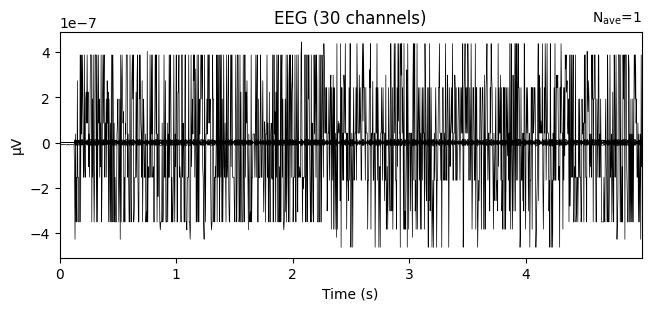

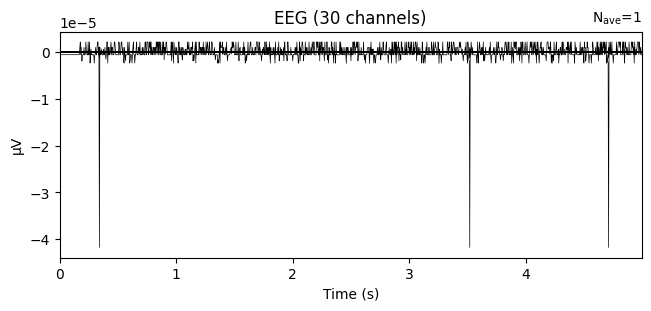

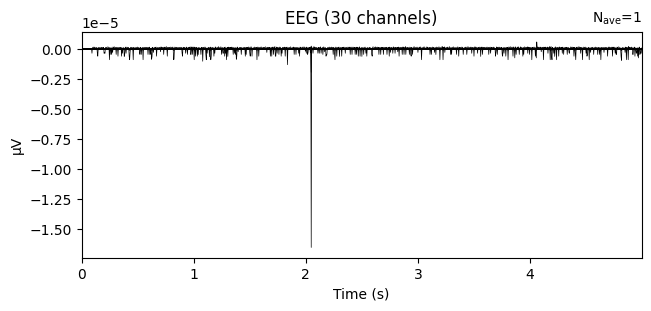

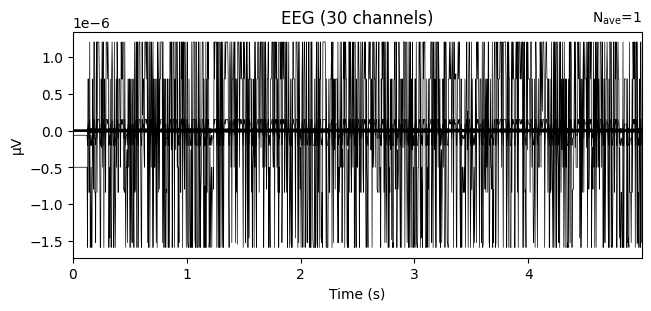

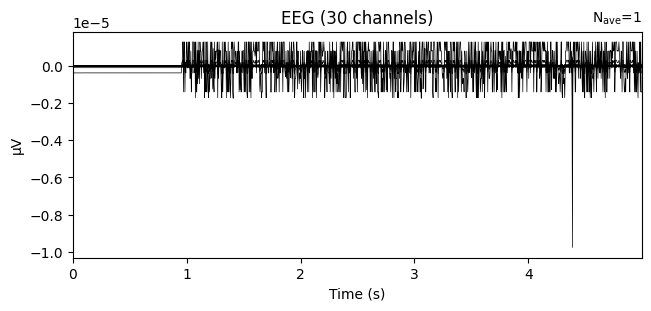

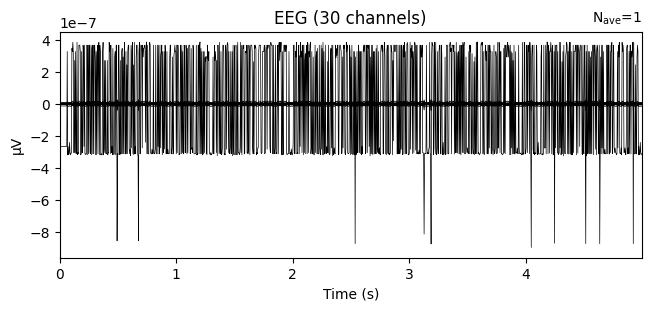

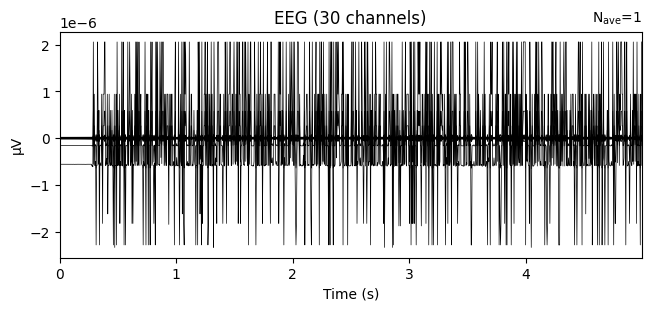

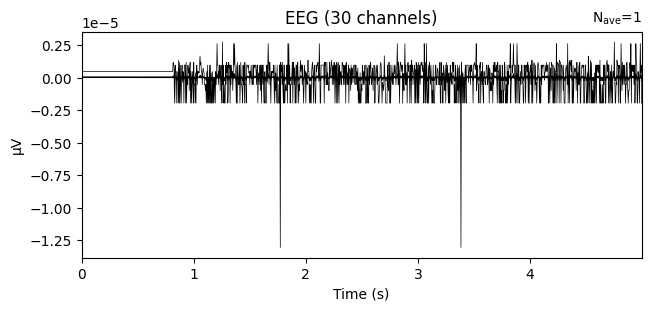

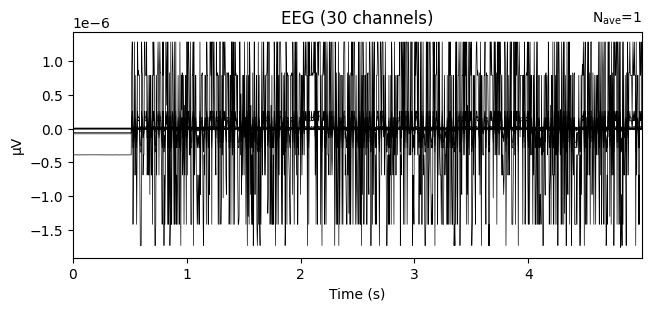

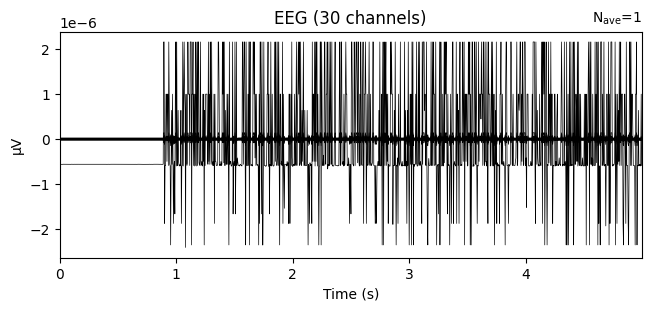

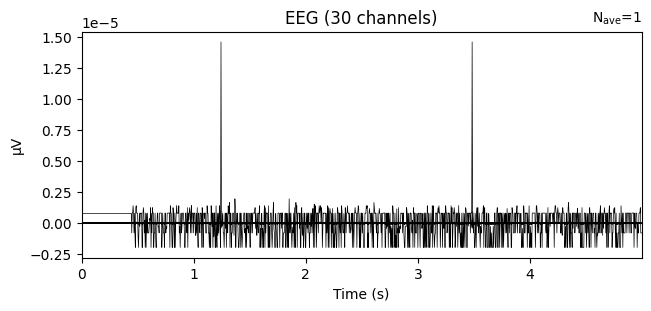

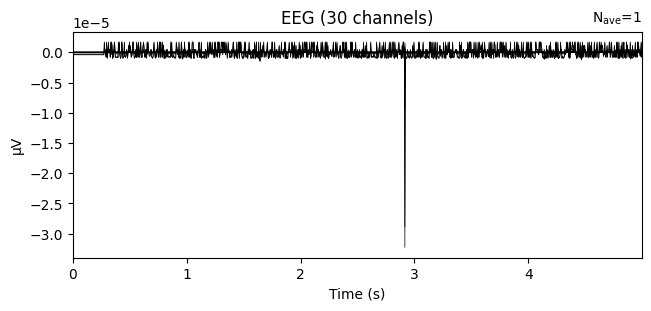

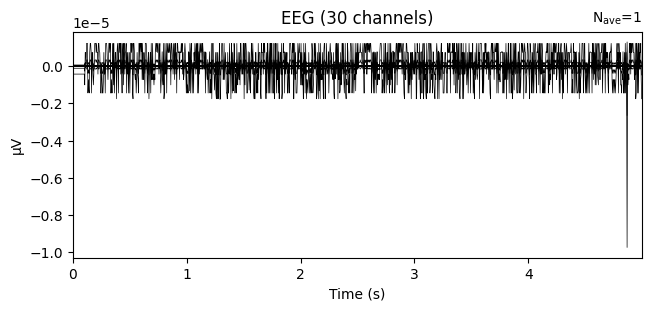

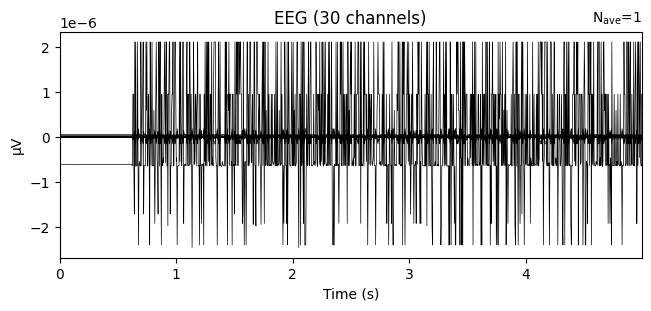

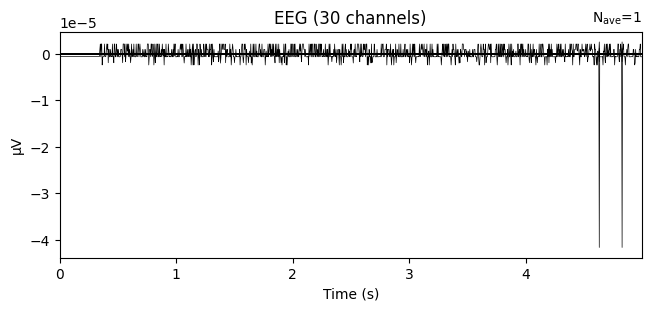

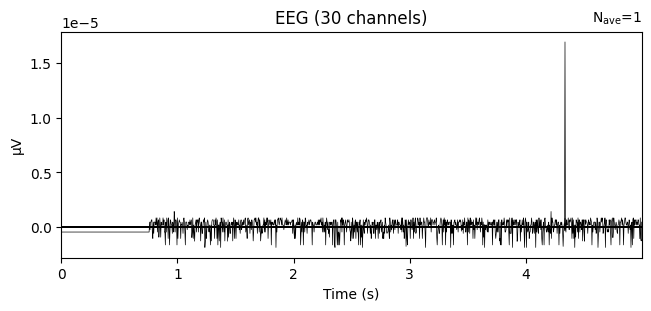

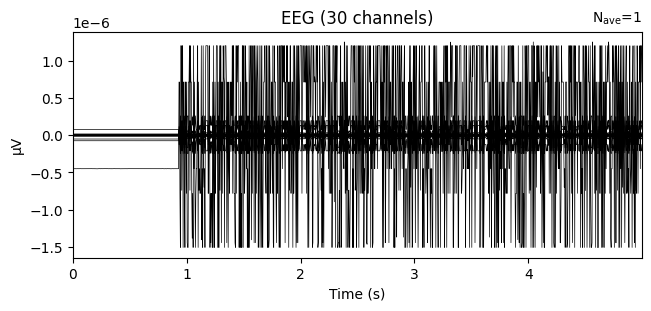

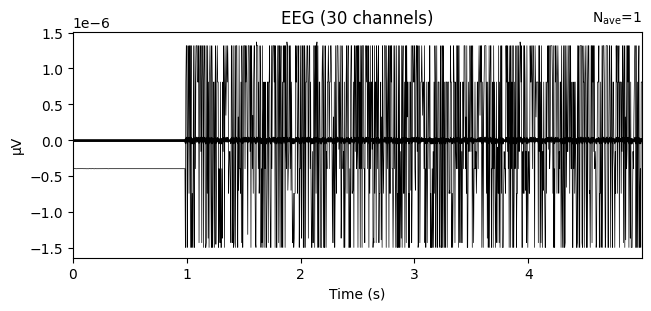

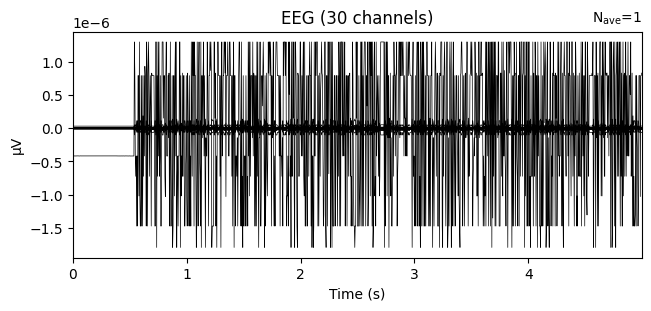

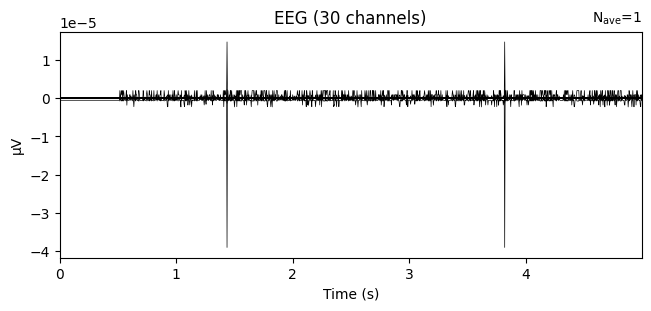

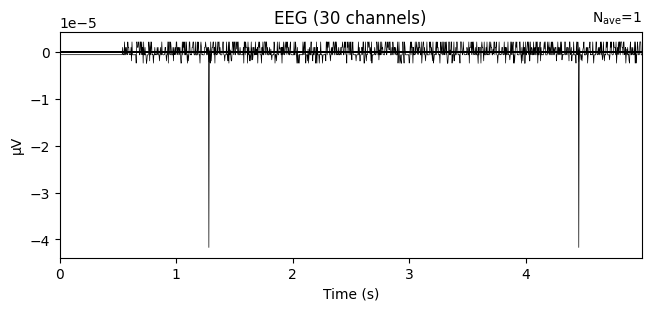

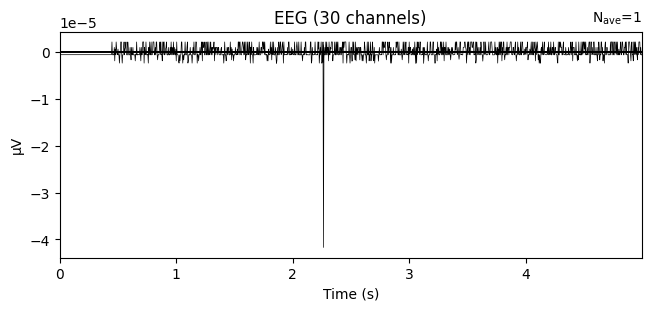

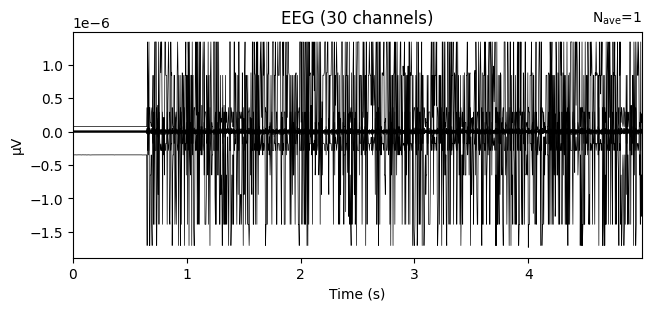

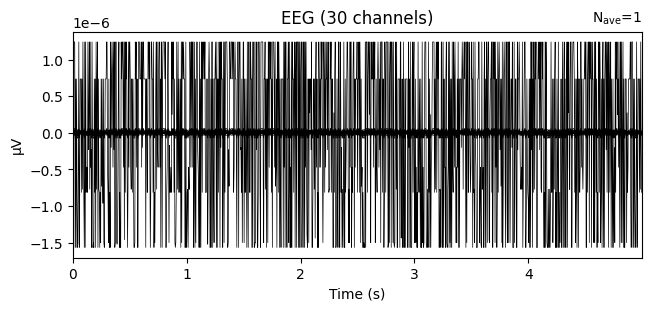

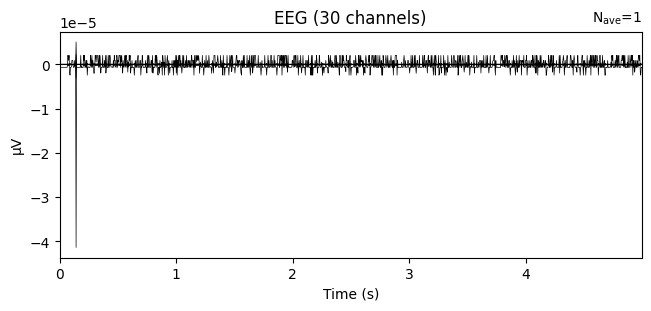

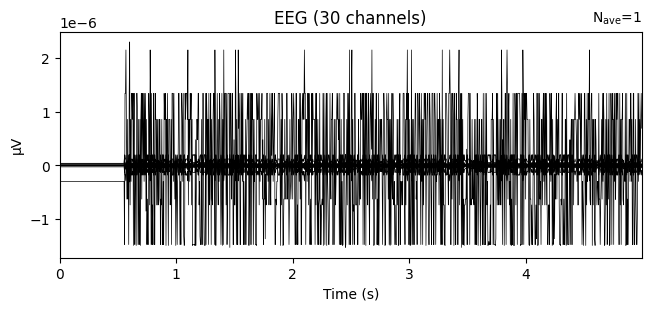

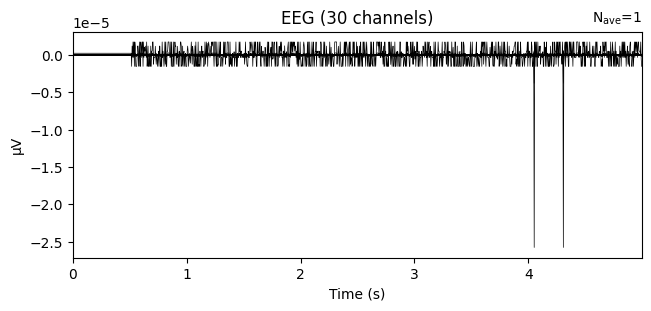

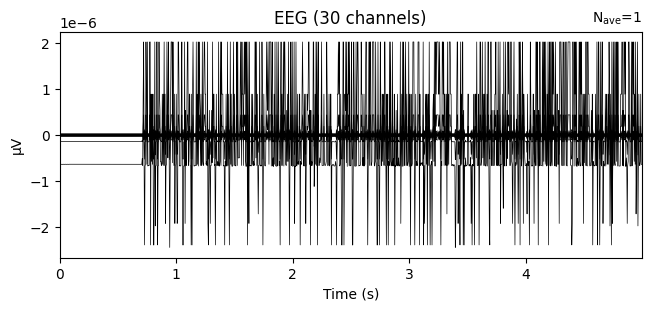

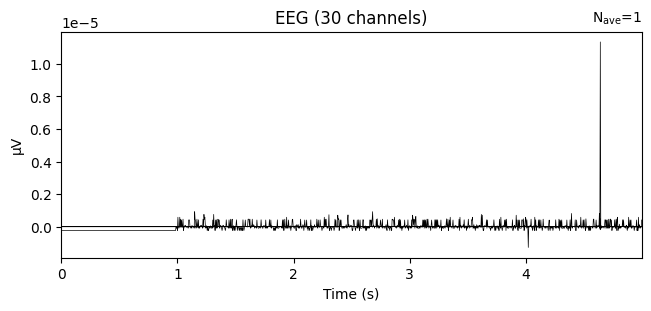

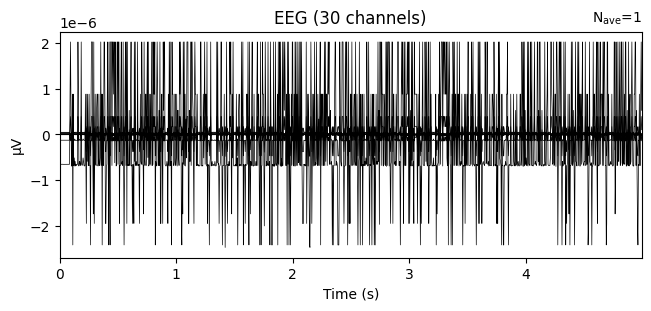

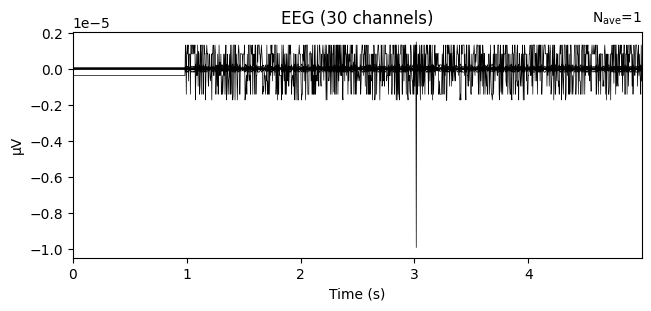

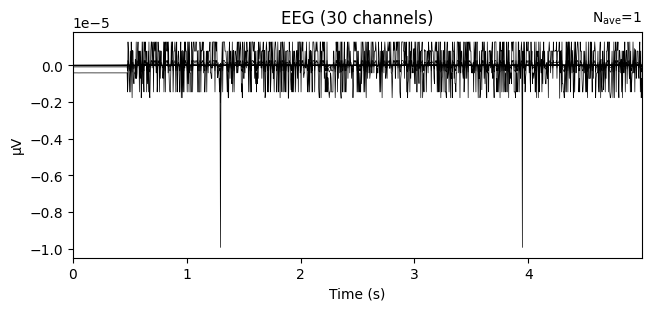

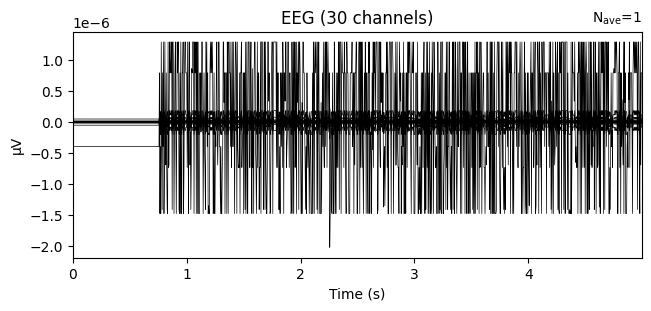

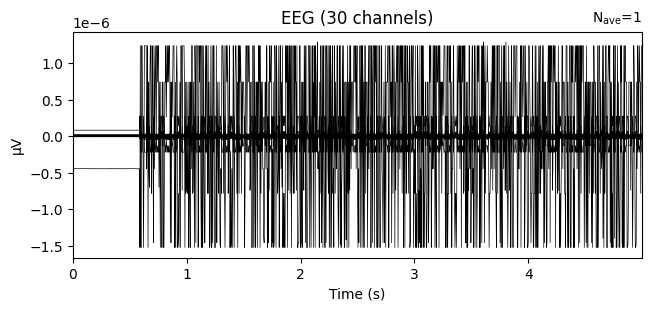

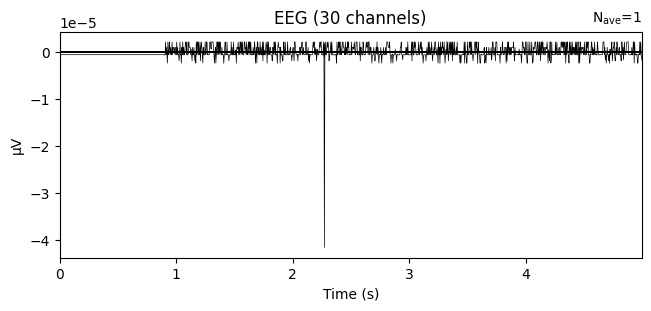

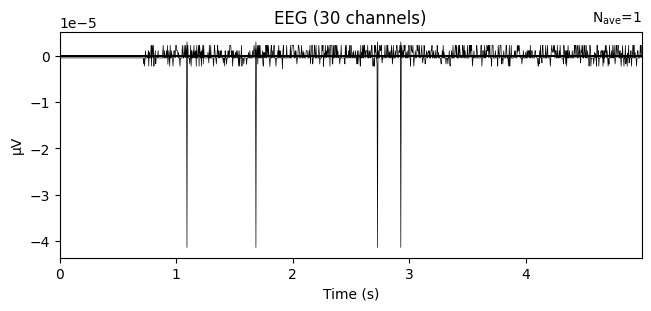

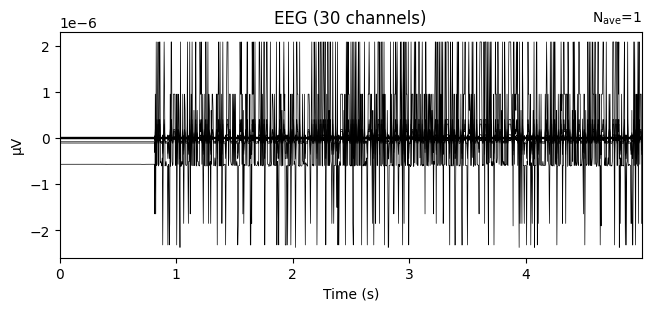

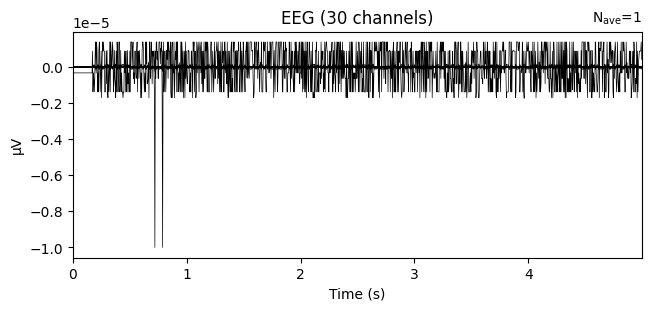

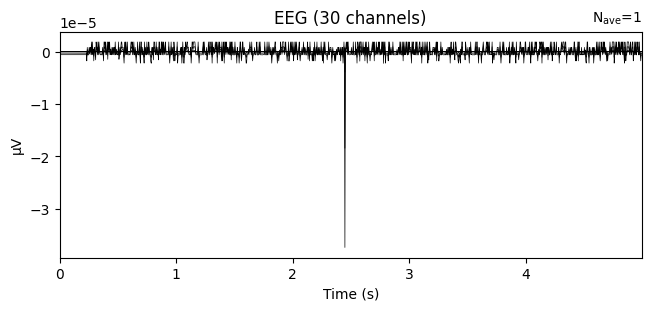

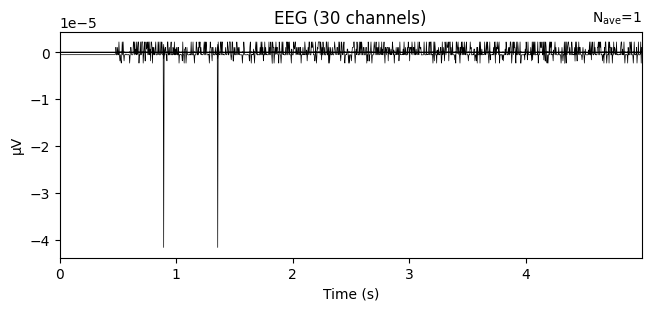

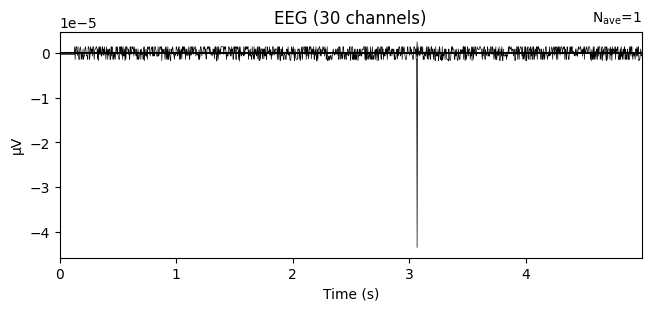

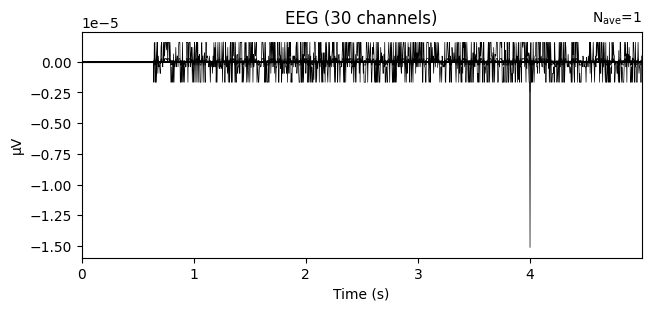

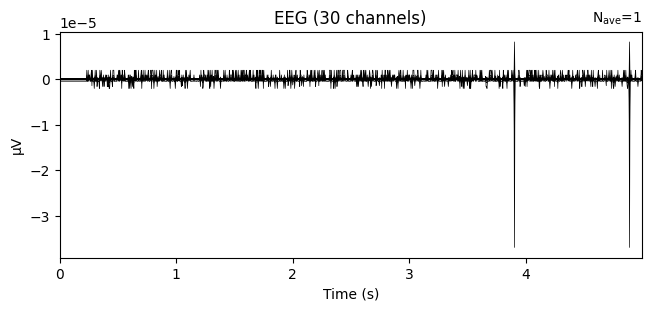

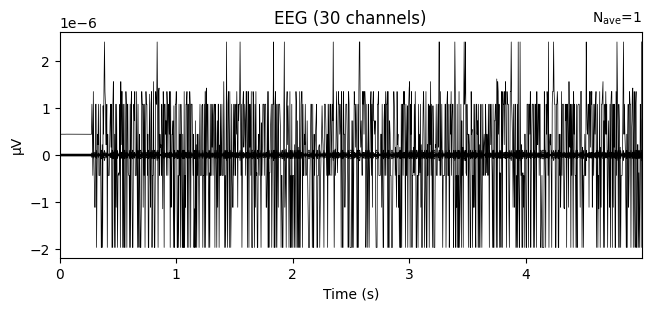

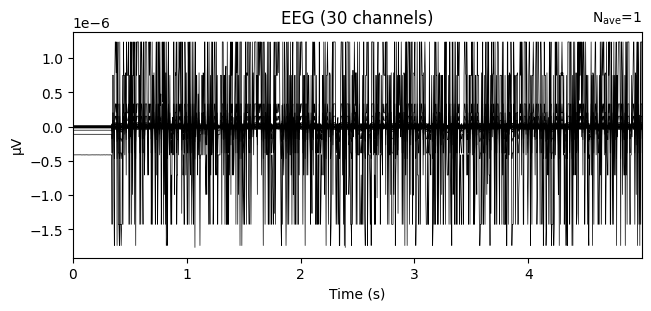

In [ ]:
from glob import glob
import mne
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mne.decoding import UnsupervisedSpatialFilter

def read_data(file_path):
    data = mne.io.read_raw_bdf(file_path, preload=True)
    data.set_eeg_reference()
    # Downsampling
    data.resample(250)
    data.filter(0.5, 25, fir_design='firwin')

    # Segmentation
    epochs = mne.make_fixed_length_epochs(data, duration=5, overlap=0.1)
    array = epochs.get_data()

    # Reshape the data for scaling
    num_samples, num_channels, num_time_points = array.shape
    array_reshaped = array.reshape(num_samples, -1)

    # Apply StandardScaler to the reshaped data
    scaler = StandardScaler()
    array_scaled = scaler.fit_transform(array_reshaped).reshape(array.shape)

    # Apply PCA
    pca = UnsupervisedSpatialFilter(PCA(30), average=False)
    pca_data = pca.fit_transform(array_scaled)
    ev = mne.EvokedArray(
        np.mean(pca_data, axis=0),
        mne.create_info(30, epochs.info["sfreq"], ch_types="eeg")
    )

    # Plot PCA
    ev.plot(show=False, window_title="PCA", time_unit="s")

    return pca_data

def process_data(filepaths, label):
    epochs_array = []
    epochs_label = []

    for file_path in tqdm(filepaths, desc=f"Processing {label} data"):
        array = read_data(file_path)
        epochs_array.append(array)
        epochs_label.extend([label] * len(array))

    return epochs_array, epochs_label

# Filepaths
haemorrhage_filepaths = glob('/content/drive/MyDrive/GP-Data/Haemorrhage/*.bdf')
ischaemia_filepaths = glob('/content/drive/MyDrive/GP-Data/Ischaemia/*.bdf')
subject_filepaths = glob('/content/drive/MyDrive/GP-Data/Subjects/*.bdf')

# Process data in chunks
chunk_size = 10  # Adjust the chunk size based on your memory constraints

haemorrhage_epochs_array = []
haemorrhage_epochs_label = []
for i in range(0, len(haemorrhage_filepaths), chunk_size):
    chunk_filepaths = haemorrhage_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=0)
    haemorrhage_epochs_array.extend(chunk_array)
    haemorrhage_epochs_label.extend(chunk_label)


ischaemia_epochs_array = []
ischaemia_epochs_label = []
for i in range(0, len(ischaemia_filepaths), chunk_size):
    chunk_filepaths = ischaemia_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=1)
    ischaemia_epochs_array.extend(chunk_array)
    ischaemia_epochs_label.extend(chunk_label)

subject_epochs_array = []
subject_epochs_label = []
for i in range(0, len(subject_filepaths), chunk_size):
    chunk_filepaths = subject_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=2)
    subject_epochs_array.extend(chunk_array)
    subject_epochs_label.extend(chunk_label)

Processing 0 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P2_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12238847  =      0.000 ...   747.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22491 events found on stim channel Status
Event IDs: [65284 65288 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329 65336]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2889 events found on stim channel Status
Event IDs: [65296 65297 65305 65312 65313 65328 65329]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband r

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  10%|█         | 1/10 [00:37<05:41, 37.97s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P3_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22496 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2826 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  20%|██        | 2/10 [01:14<04:58, 37.36s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P5_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12058623  =      0.000 ...   736.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2902 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  30%|███       | 3/10 [01:52<04:22, 37.48s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P10_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2752 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  40%|████      | 4/10 [02:29<03:44, 37.34s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P11_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2845 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 0 data:  50%|█████     | 5/10 [03:07<03:07, 37.42s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P14_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2787 events found on stim channel Status
Event IDs: [65281 65296 65297 65312 65313 65328 65329]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  60%|██████    | 6/10 [03:44<02:29, 37.46s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P6b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2903 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  70%|███████   | 7/10 [04:30<02:00, 40.27s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P17_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12189695  =      0.000 ...   744.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2799 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Low

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  80%|████████  | 8/10 [05:16<01:24, 42.07s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P20_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2862 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  90%|█████████ | 9/10 [05:59<00:42, 42.27s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P24_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11812863  =      0.000 ...   721.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2886 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  50%|█████     | 1/2 [00:42<00:42, 42.92s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17498111  =      0.000 ...  1068.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22476 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P1_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22488 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2825 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  10%|█         | 1/10 [00:42<06:20, 42.31s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2823 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  20%|██        | 2/10 [01:27<05:49, 43.73s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22478 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2866 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  30%|███       | 3/10 [02:10<05:05, 43.60s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P9_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13107199  =      0.000 ...   800.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [ 65281  65284  65296  65297  65301  65304  65305  65309  65311 130816]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [ 65281  65296  65297  65311 130816]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 1 data:  40%|████      | 4/10 [02:55<04:25, 44.25s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  50%|█████     | 5/10 [03:40<03:42, 44.51s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11763711  =      0.000 ...   718.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2828 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  60%|██████    | 6/10 [04:25<02:58, 44.62s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P15_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22480 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2803 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 1 data:  70%|███████   | 7/10 [05:09<02:13, 44.48s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P16_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65285 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  80%|████████  | 8/10 [05:55<01:29, 44.92s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2791 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


/usr/local/lib/python3.10/dist-packages/mne/viz/evoked.py:463: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(len(ch_types_used), 1, layout="constrained")
Processing 1 data:  90%|█████████ | 9/10 [06:41<00:45, 45.38s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P18_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2918 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:   0%|          | 0/4 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22497 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2932 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  25%|██▌       | 1/4 [00:43<02:10, 43.62s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2848 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  50%|█████     | 2/4 [01:28<01:28, 44.44s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2876 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  75%|███████▌  | 3/4 [02:13<00:44, 44.61s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P26_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12206079  =      0.000 ...   745.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2864 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 2 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12042239  =      0.000 ...   735.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2844 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 2 data:  10%|█         | 1/10 [00:44<06:36, 44.01s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S2a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2895 events found on stim channel Status
Event IDs: [65281 65296 65297 65305]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  20%|██        | 2/10 [01:25<05:40, 42.60s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12746751  =      0.000 ...   778.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  30%|███       | 3/10 [02:15<05:20, 45.79s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2802 events found on stim channel Status
Event IDs: [65281 65292 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  40%|████      | 4/10 [02:58<04:27, 44.61s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2857 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 2 data:  50%|█████     | 5/10 [03:44<03:46, 45.30s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2800 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  60%|██████    | 6/10 [04:26<02:56, 44.06s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2874 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  70%|███████   | 7/10 [05:09<02:11, 43.87s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2875 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  80%|████████  | 8/10 [05:53<01:27, 43.89s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2831 events found on stim channel Status
Event IDs: [65281 65296 65297 65301 65304]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  90%|█████████ | 9/10 [06:34<00:43, 43.11s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11714559  =      0.000 ...   715.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2870 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 2 data:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65289 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2807 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  11%|█         | 1/9 [00:45<06:00, 45.03s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22473 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2868 events found on stim channel Status
Event IDs: [65281 65284 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  22%|██▏       | 2/9 [01:28<05:07, 43.94s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2883 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  33%|███▎      | 3/9 [02:11<04:20, 43.49s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2917 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  44%|████▍     | 4/9 [02:54<03:36, 43.39s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11960319  =      0.000 ...   730.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2854 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 2 data:  56%|█████▌    | 5/9 [03:42<02:59, 44.91s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12419071  =      0.000 ...   758.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edg

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  67%|██████▋   | 6/9 [04:25<02:13, 44.57s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  78%|███████▊  | 7/9 [05:10<01:29, 44.51s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12795903  =      0.000 ...   781.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2885 events found on stim channel Status
Event IDs: [65281 65288 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  89%|████████▉ | 8/9 [05:54<00:44, 44.29s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data: 100%|██████████| 9/9 [06:39<00:00, 44.36s/it]


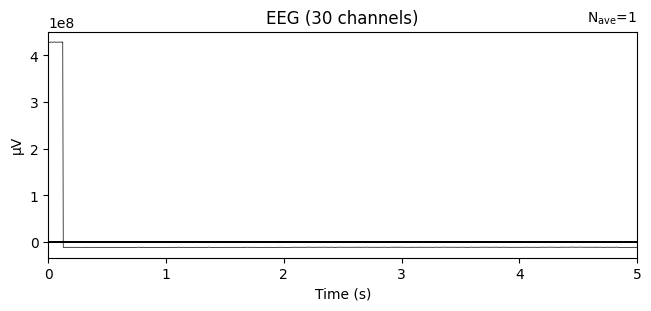

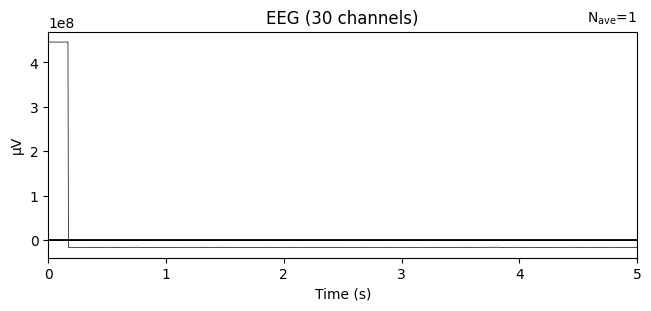

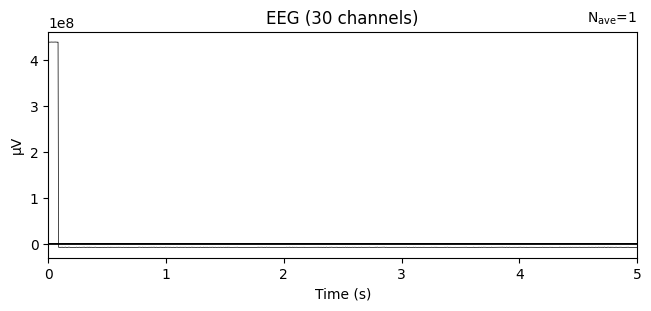

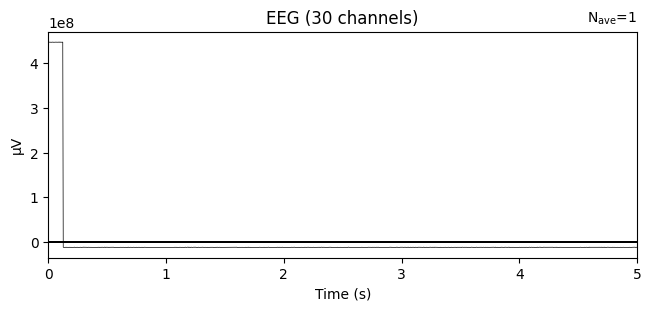

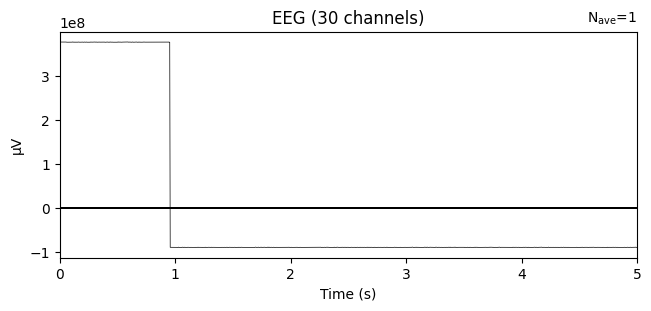

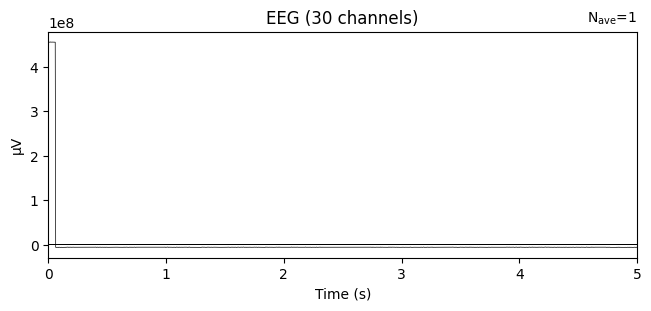

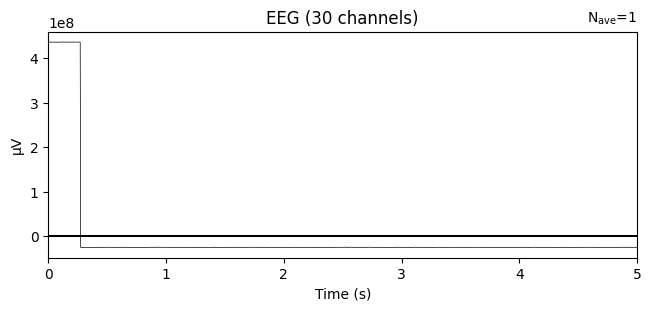

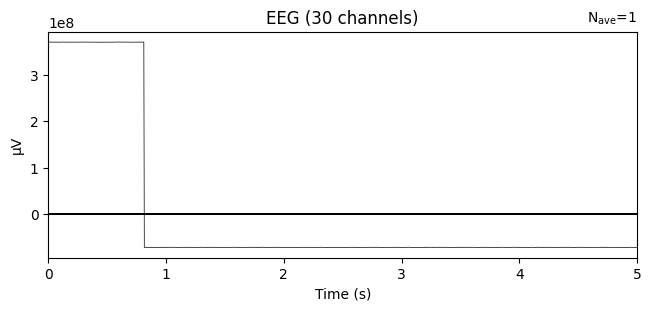

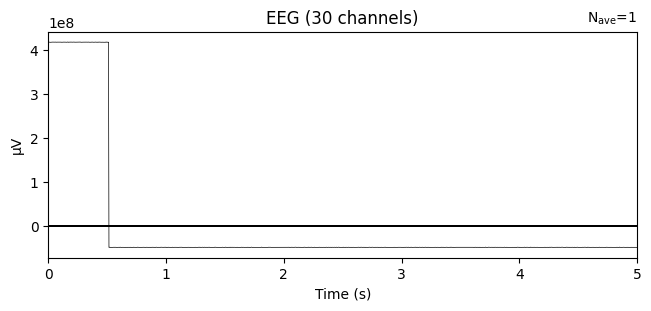

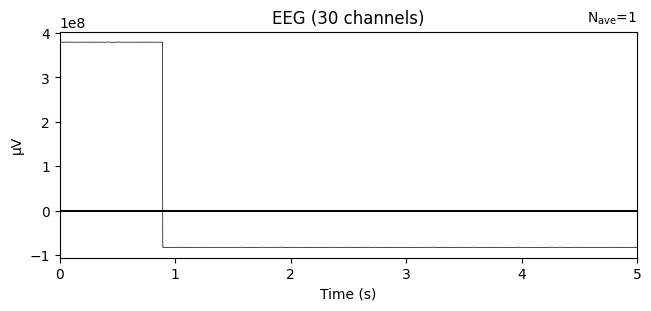

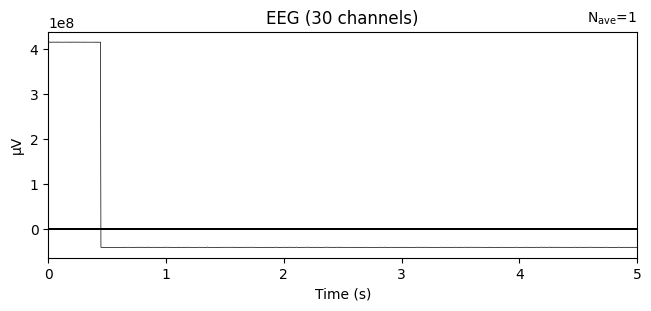

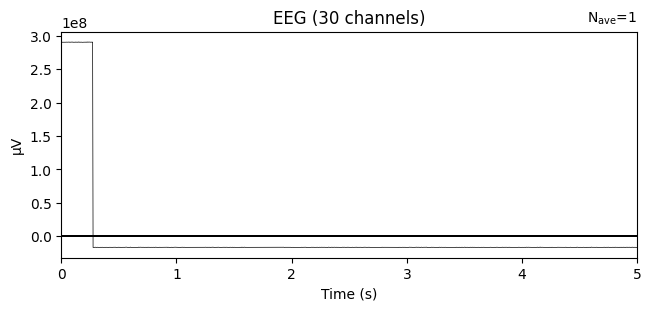

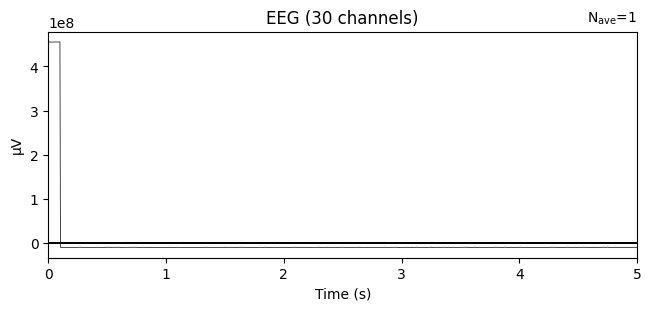

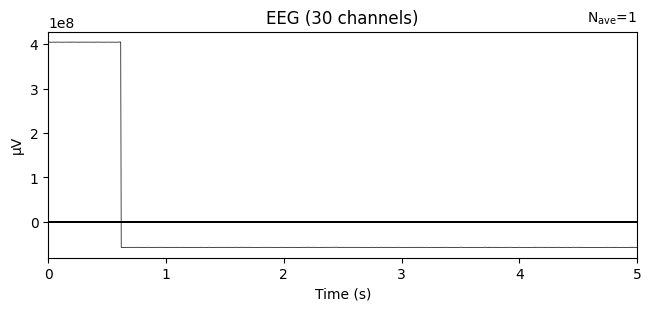

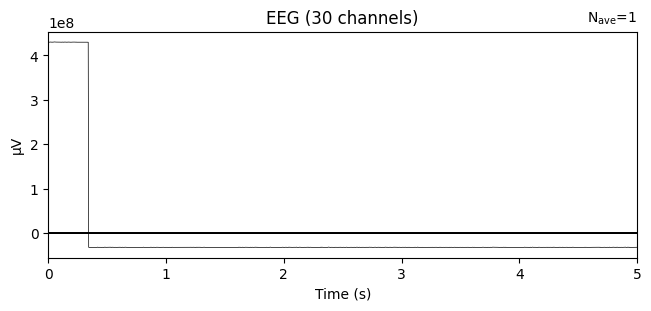

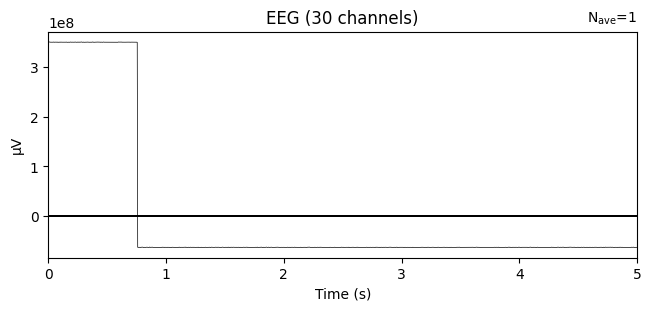

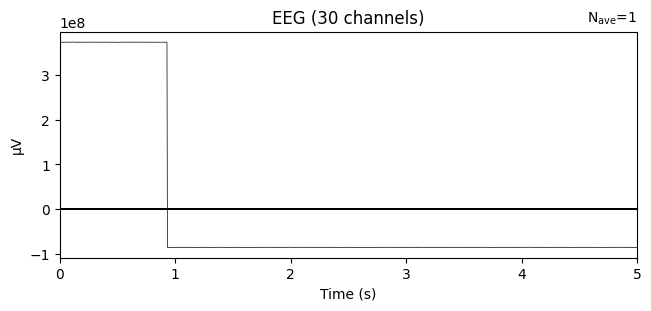

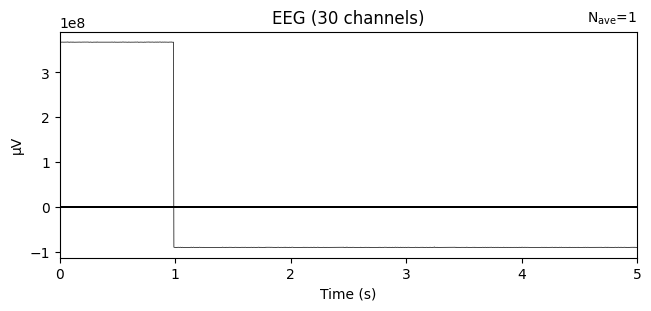

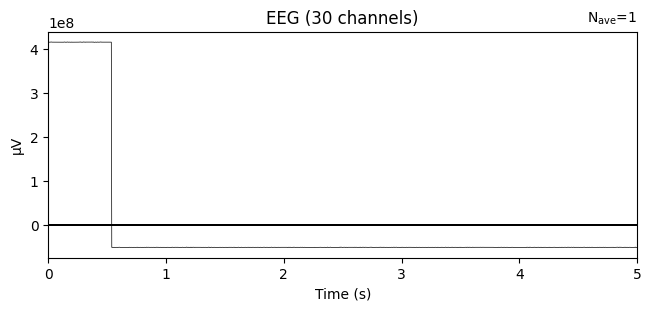

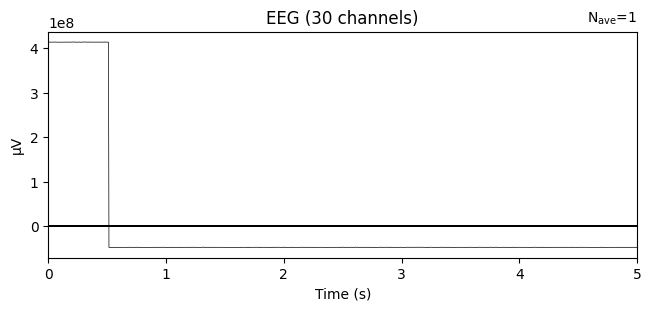

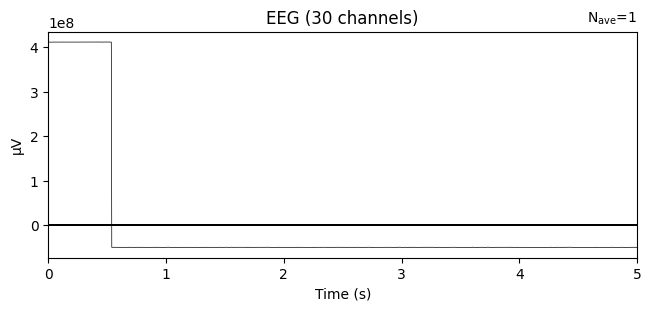

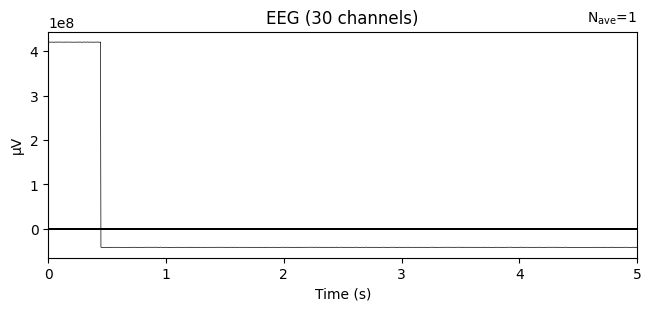

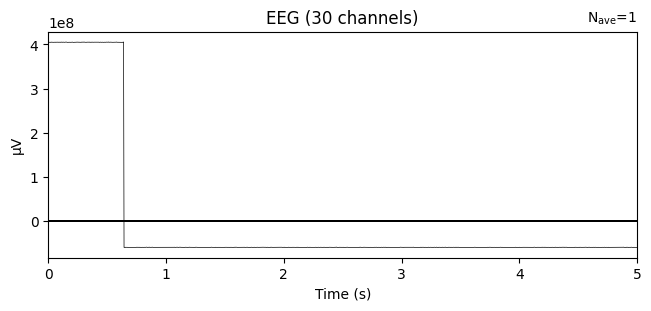

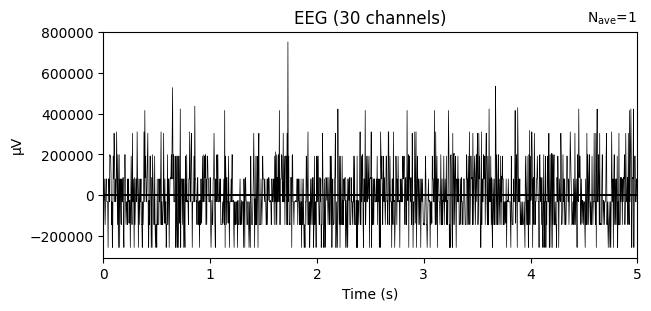

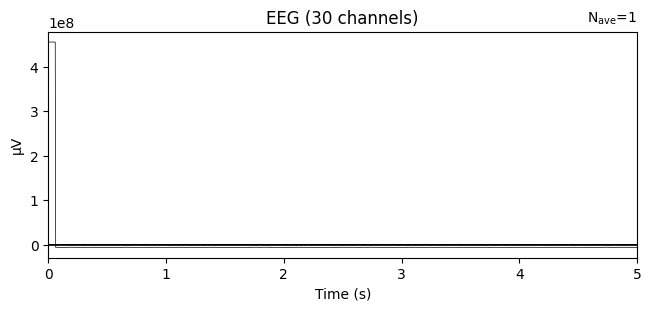

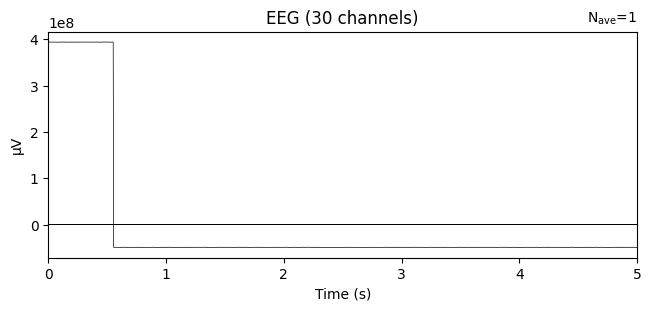

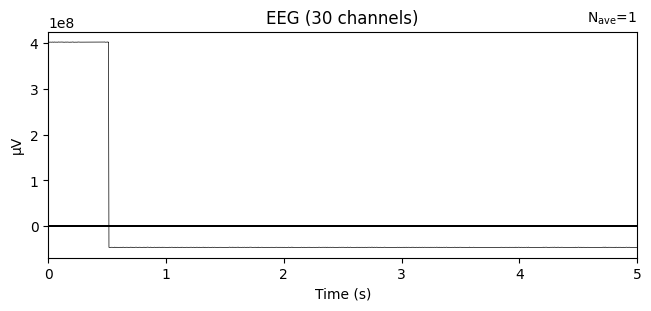

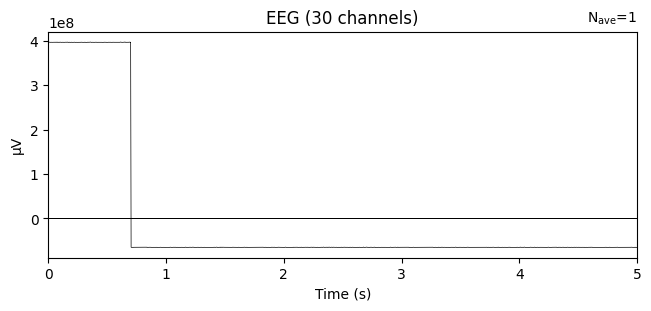

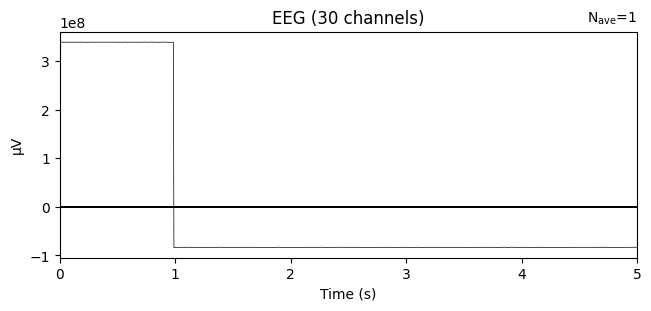

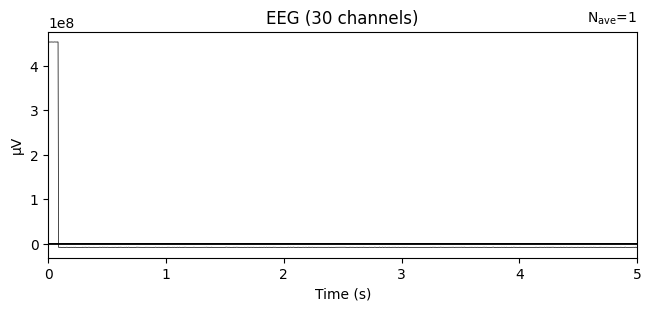

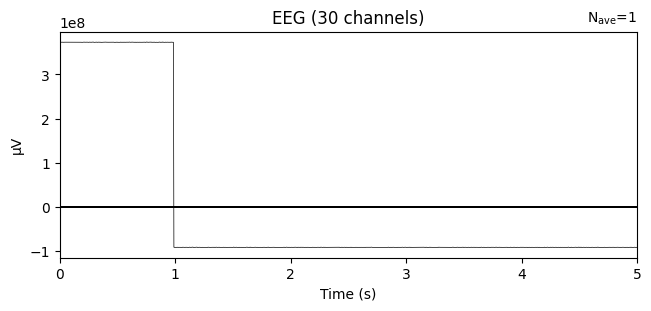

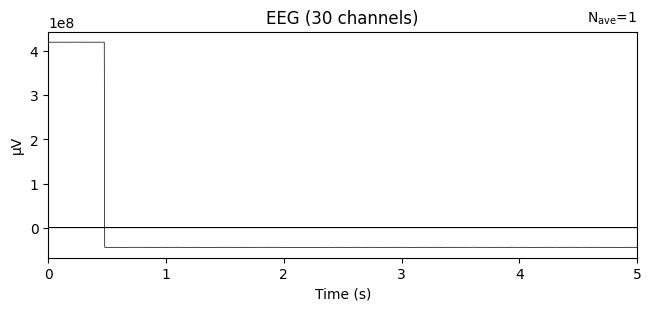

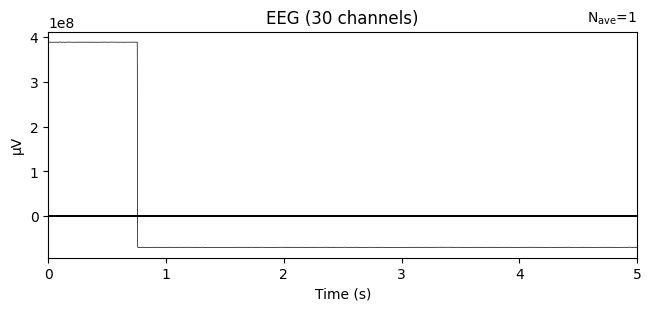

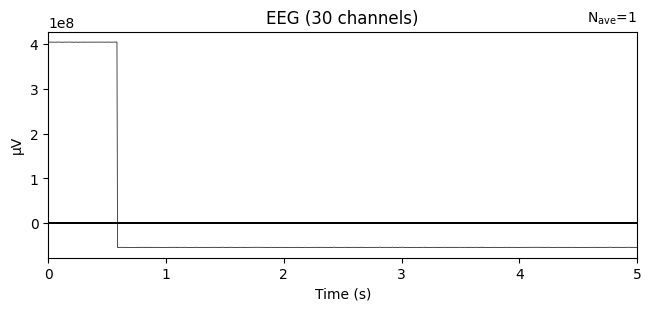

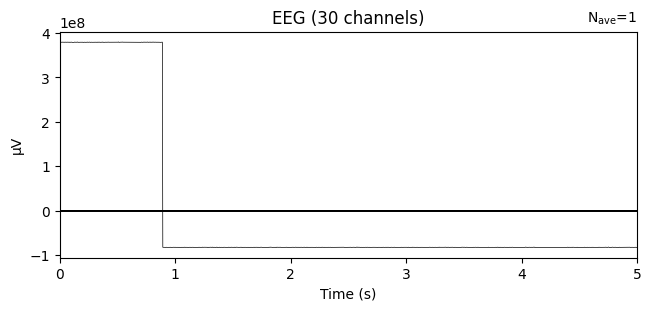

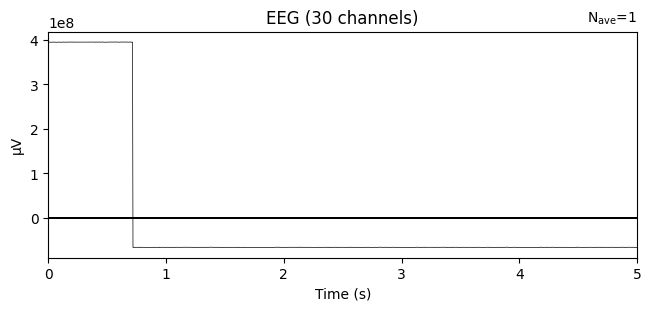

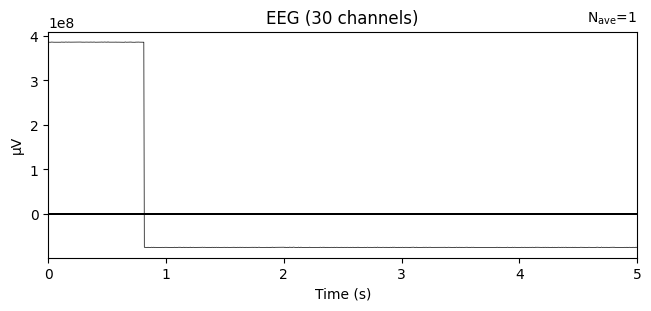

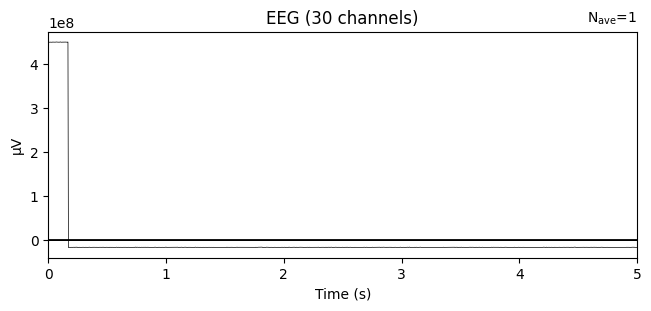

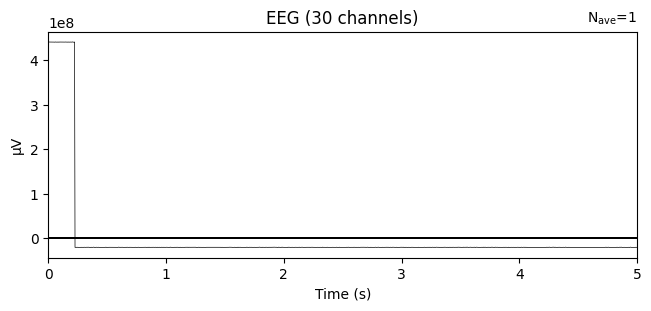

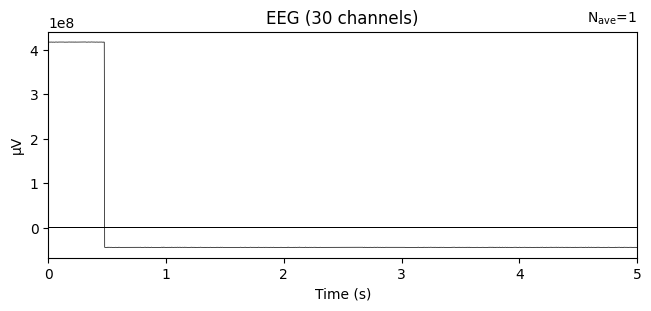

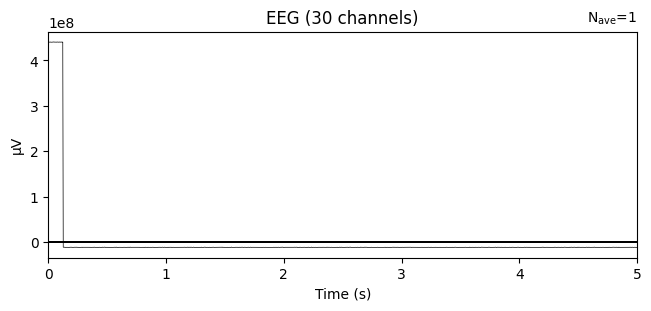

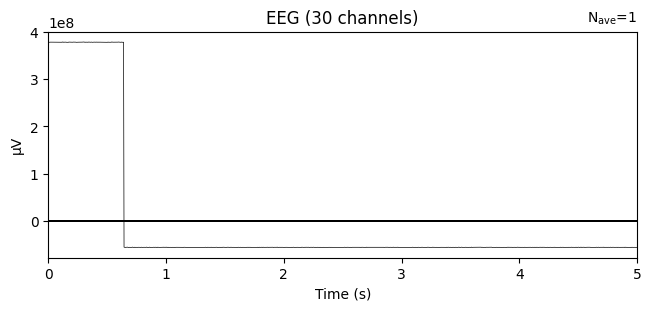

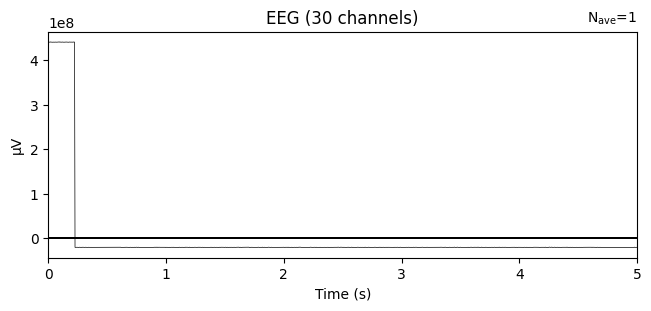

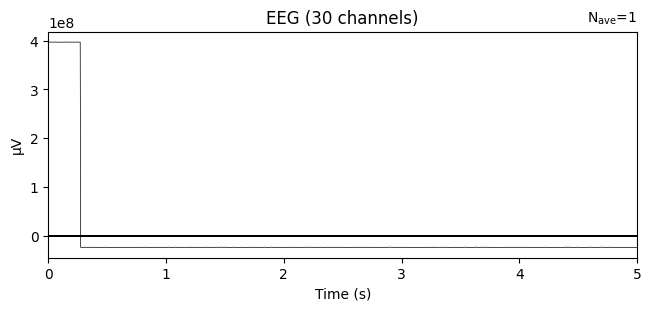

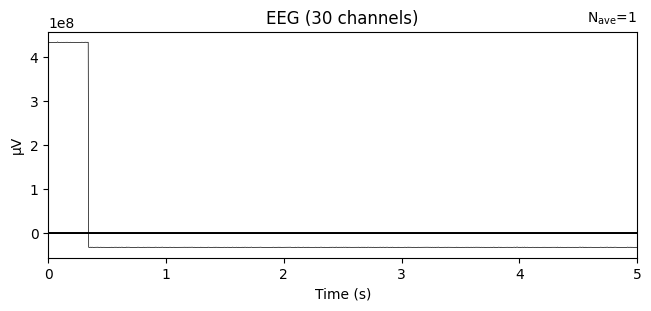

In [ ]:
from glob import glob
import mne
import numpy as np
from tqdm import tqdm
from sklearn.decomposition import PCA
from mne.decoding import UnsupervisedSpatialFilter

def read_data(file_path):
  raw = mne.io.read_raw_bdf(file_path, preload=True)

  # Apply PCA
  pca = UnsupervisedSpatialFilter(PCA(30), average=False)
  raw.resample(250)
  raw.filter(5, 25, fir_design="firwin")

  events = mne.make_fixed_length_events(raw, duration=5)
  epochs = mne.Epochs(raw, events, tmin=0, tmax=5, baseline=None, detrend=1, preload=True)

  X = epochs.get_data(copy=False)

  pca_data = pca.fit_transform(X)

  ev = mne.EvokedArray(
      np.mean(pca_data, axis=0),
      mne.create_info(30, epochs.info["sfreq"], ch_types="eeg"),
      tmin=0
  )

  # Plot PCA
  ev.plot(show=False, window_title="PCA", time_unit="s")


  # Extract features (you may need to customize this step based on your specific needs)
  #features=pca.get_components()
  return pca_data

def process_data(filepaths, label):
    epochs_array = []
    epochs_label = []

    for file_path in tqdm(filepaths, desc=f"Processing {label} data"):
        array = read_data(file_path)
        epochs_array.append(array)
        epochs_label.extend([label] * len(array))

    return epochs_array, epochs_label

# Filepaths
haemorrhage_filepaths = glob('/content/drive/MyDrive/GP-Data/Haemorrhage/*.bdf')
ischaemia_filepaths = glob('/content/drive/MyDrive/GP-Data/Ischaemia/*.bdf')
subject_filepaths = glob('/content/drive/MyDrive/GP-Data/Subjects/*.bdf')

# Process data in chunks
chunk_size = 10  # Adjust the chunk size based on your memory constraints

haemorrhage_epochs_array = []
haemorrhage_epochs_label = []
for i in range(0, len(haemorrhage_filepaths), chunk_size):
    chunk_filepaths = haemorrhage_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=0)
    haemorrhage_epochs_array.extend(chunk_array)
    haemorrhage_epochs_label.extend(chunk_label)


ischaemia_epochs_array = []
ischaemia_epochs_label = []
for i in range(0, len(ischaemia_filepaths), chunk_size):
    chunk_filepaths = ischaemia_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=1)
    ischaemia_epochs_array.extend(chunk_array)
    ischaemia_epochs_label.extend(chunk_label)

subject_epochs_array = []
subject_epochs_label = []
for i in range(0, len(subject_filepaths), chunk_size):
    chunk_filepaths = subject_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=2)
    subject_epochs_array.extend(chunk_array)
    subject_epochs_label.extend(chunk_label)

Processing 0 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P2_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12238847  =      0.000 ...   747.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22491 events found on stim channel Status
Event IDs: [65284 65288 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329 65336]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2889 events found on stim channel Status
Event IDs: [65296 65297 65305 65312 65313 65328 65329]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  10%|█         | 1/10 [00:41<06:17, 41.89s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P3_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22496 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2826 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  20%|██        | 2/10 [01:22<05:30, 41.33s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P5_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12058623  =      0.000 ...   736.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2902 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  30%|███       | 3/10 [02:05<04:52, 41.83s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P10_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2752 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  40%|████      | 4/10 [02:47<04:10, 41.83s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P11_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2845 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 0 data:  50%|█████     | 5/10 [03:57<04:20, 52.11s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P14_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2787 events found on stim channel Status
Event IDs: [65281 65296 65297 65312 65313 65328 65329]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  60%|██████    | 6/10 [04:39<03:14, 48.55s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P6b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2903 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  70%|███████   | 7/10 [05:22<02:20, 46.74s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P17_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12189695  =      0.000 ...   744.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2799 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- L

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  80%|████████  | 8/10 [06:04<01:30, 45.36s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P20_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2862 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  90%|█████████ | 9/10 [06:44<00:43, 43.65s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P24_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11812863  =      0.000 ...   721.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2886 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  50%|█████     | 1/2 [00:39<00:39, 39.19s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17498111  =      0.000 ...  1068.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22476 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P1_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22488 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2825 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  10%|█         | 1/10 [00:39<05:53, 39.32s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2823 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  20%|██        | 2/10 [01:18<05:15, 39.45s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22478 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2866 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  30%|███       | 3/10 [02:02<04:48, 41.23s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P9_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13107199  =      0.000 ...   800.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [ 65281  65284  65296  65297  65301  65304  65305  65309  65311 130816]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [ 65281  65296  65297  65311 130816]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 1 data:  40%|████      | 4/10 [02:44<04:10, 41.74s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  50%|█████     | 5/10 [03:27<03:29, 41.94s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11763711  =      0.000 ...   718.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2828 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  60%|██████    | 6/10 [04:12<02:52, 43.08s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P15_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22480 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2803 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 1 data:  70%|███████   | 7/10 [04:58<02:11, 43.97s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P16_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65285 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Low

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  80%|████████  | 8/10 [05:41<01:27, 43.77s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2791 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


/usr/local/lib/python3.10/dist-packages/mne/viz/evoked.py:463: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(len(ch_types_used), 1, layout="constrained")
Processing 1 data:  90%|█████████ | 9/10 [06:24<00:43, 43.39s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P18_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2918 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:   0%|          | 0/4 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22497 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2932 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  25%|██▌       | 1/4 [01:05<03:17, 65.69s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2848 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  50%|█████     | 2/4 [01:46<01:42, 51.21s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2876 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:  75%|███████▌  | 3/4 [02:25<00:45, 45.69s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P26_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12206079  =      0.000 ...   745.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2864 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Low

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 2 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12042239  =      0.000 ...   735.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2844 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 2 data:  10%|█         | 1/10 [00:42<06:22, 42.50s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S2a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2895 events found on stim channel Status
Event IDs: [65281 65296 65297 65305]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  20%|██        | 2/10 [01:23<05:32, 41.54s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12746751  =      0.000 ...   778.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  30%|███       | 3/10 [02:07<04:58, 42.71s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2802 events found on stim channel Status
Event IDs: [65281 65292 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  40%|████      | 4/10 [02:47<04:09, 41.58s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2857 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 2 data:  50%|█████     | 5/10 [03:30<03:30, 42.04s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2800 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  60%|██████    | 6/10 [04:10<02:45, 41.29s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2874 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  70%|███████   | 7/10 [04:50<02:02, 40.95s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2875 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  80%|████████  | 8/10 [05:33<01:23, 41.77s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2831 events found on stim channel Status
Event IDs: [65281 65296 65297 65301 65304]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  90%|█████████ | 9/10 [06:14<00:41, 41.58s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11714559  =      0.000 ...   715.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2870 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 2 data:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65289 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2807 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  11%|█         | 1/9 [00:42<05:42, 42.82s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22473 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2868 events found on stim channel Status
Event IDs: [65281 65284 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  22%|██▏       | 2/9 [01:22<04:44, 40.70s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2883 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  33%|███▎      | 3/9 [02:01<04:01, 40.20s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2917 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  44%|████▍     | 4/9 [02:42<03:22, 40.46s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11960319  =      0.000 ...   730.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2854 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1 bad epochs dropped


Processing 2 data:  56%|█████▌    | 5/9 [03:25<02:45, 41.36s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12419071  =      0.000 ...   758.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  67%|██████▋   | 6/9 [04:07<02:05, 41.68s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  78%|███████▊  | 7/9 [04:50<01:24, 42.02s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12795903  =      0.000 ...   781.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2885 events found on stim channel Status
Event IDs: [65281 65288 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  89%|████████▉ | 8/9 [05:34<00:42, 42.61s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data: 100%|██████████| 9/9 [06:17<00:00, 41.92s/it]


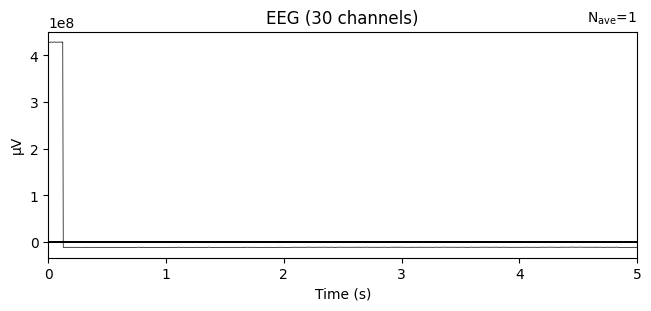

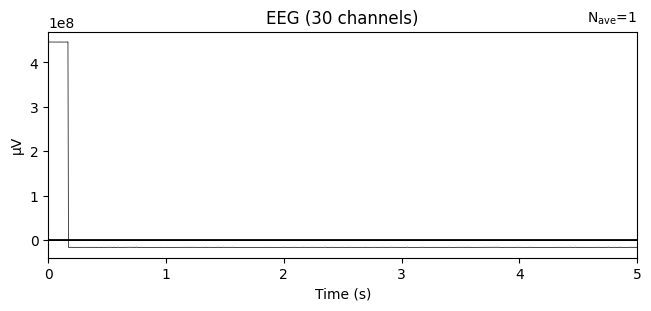

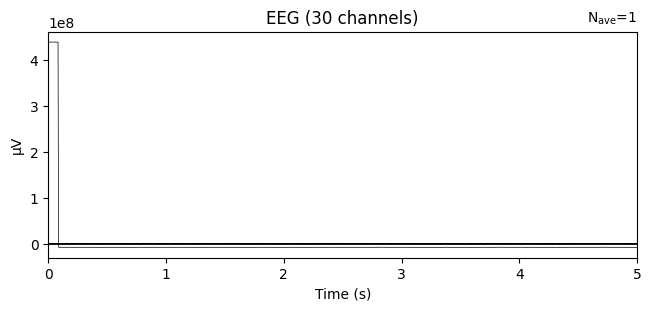

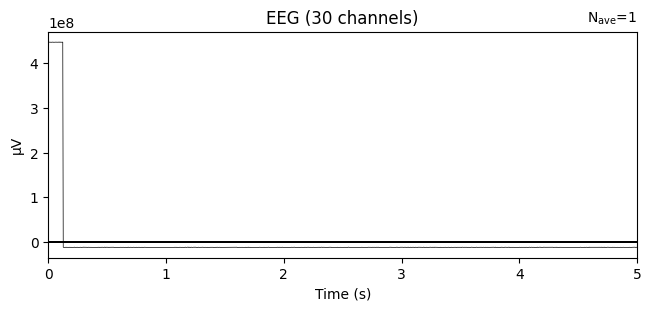

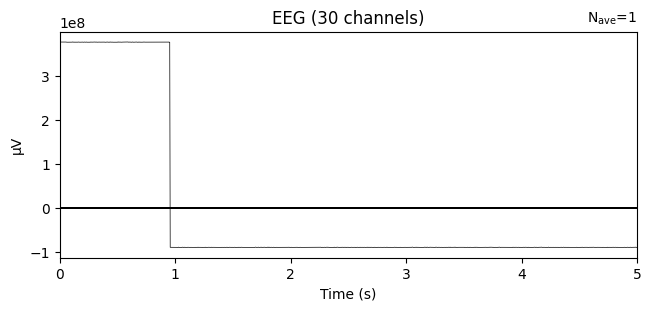

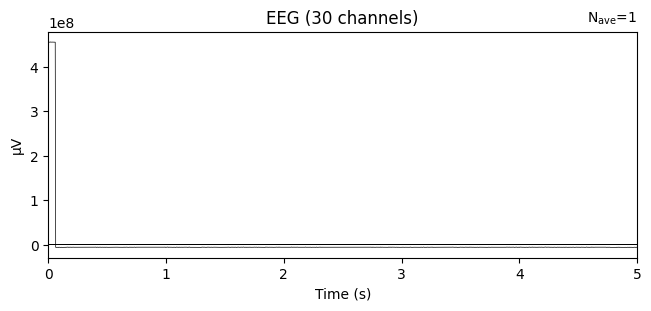

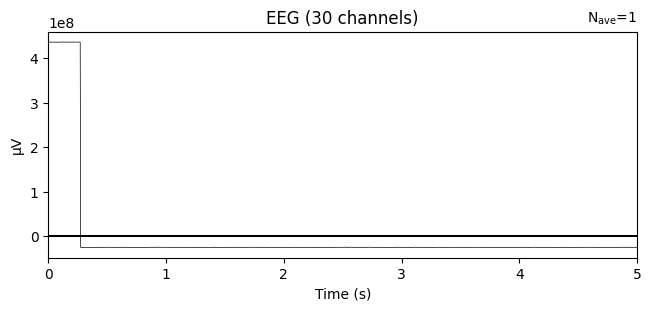

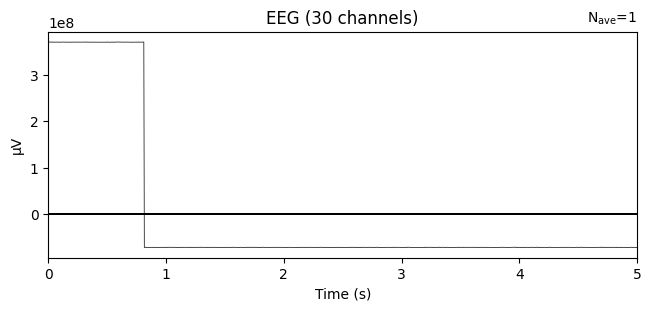

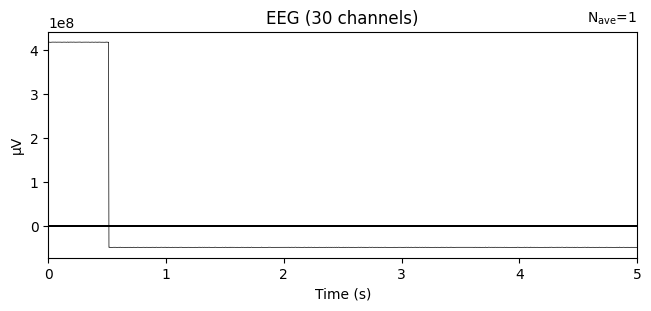

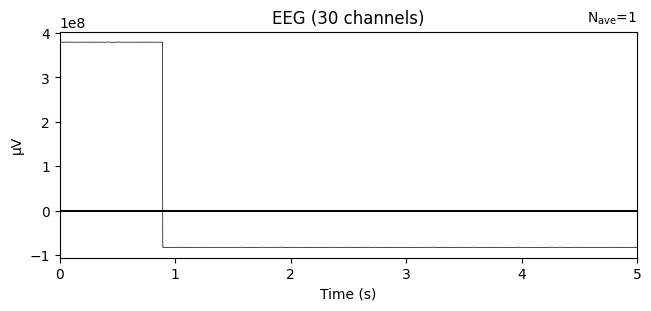

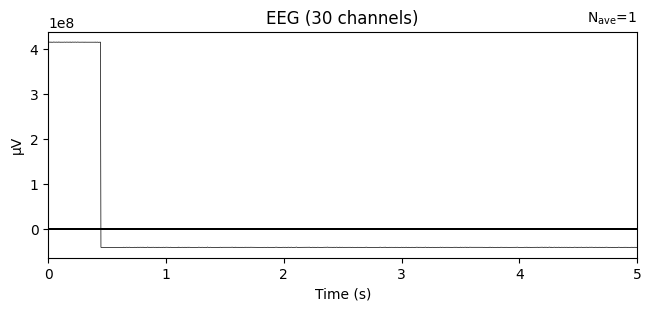

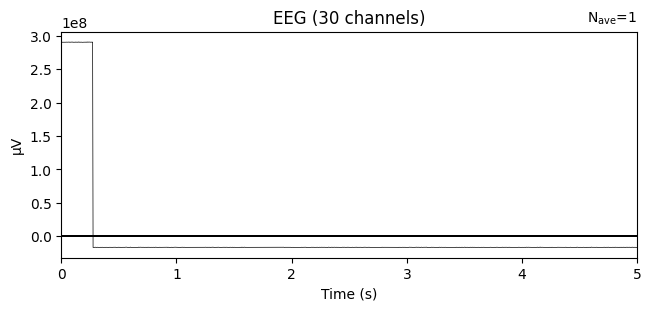

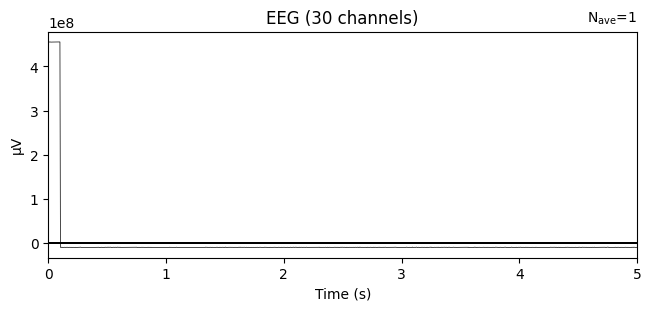

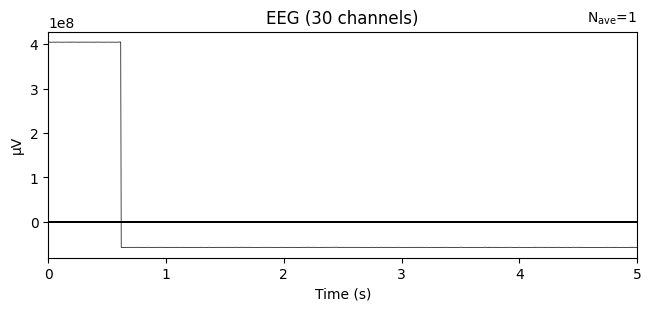

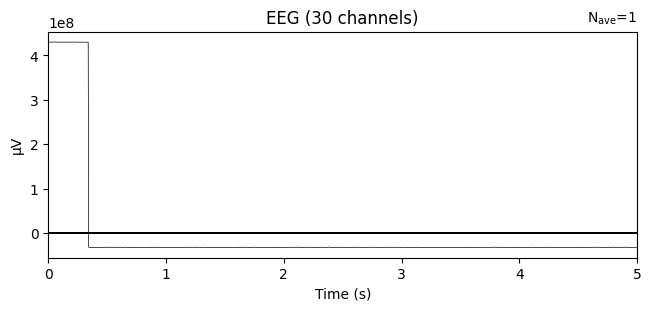

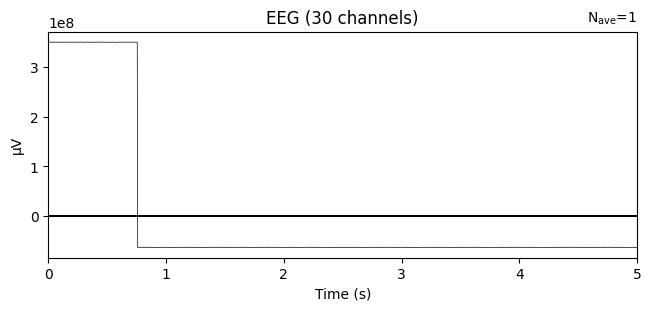

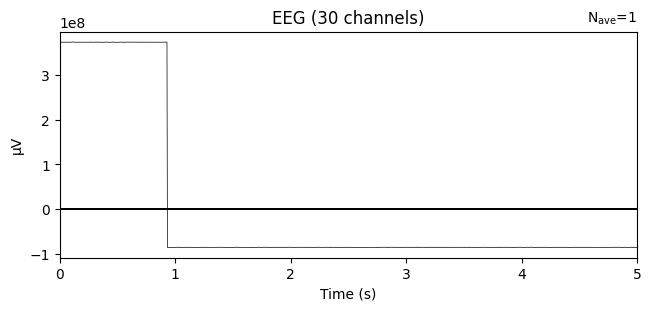

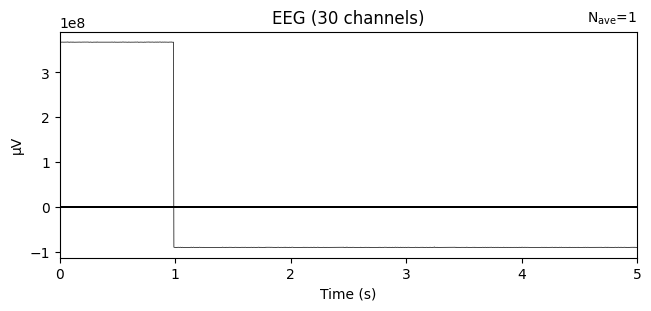

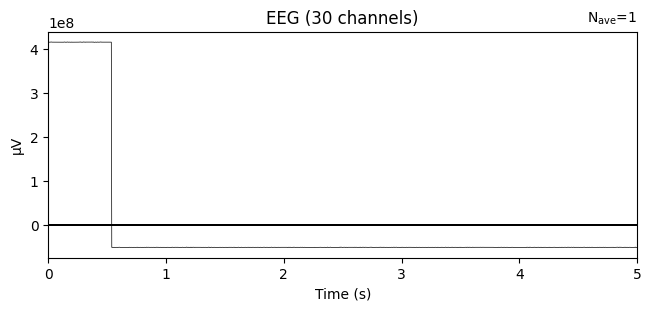

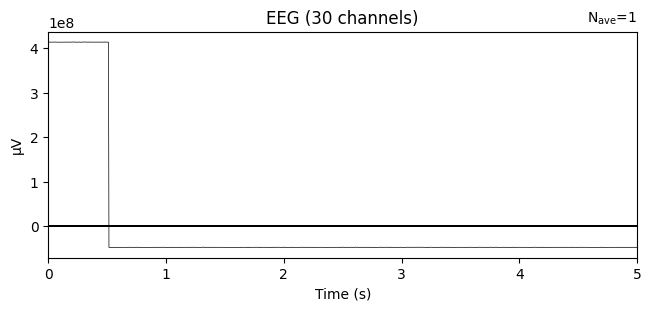

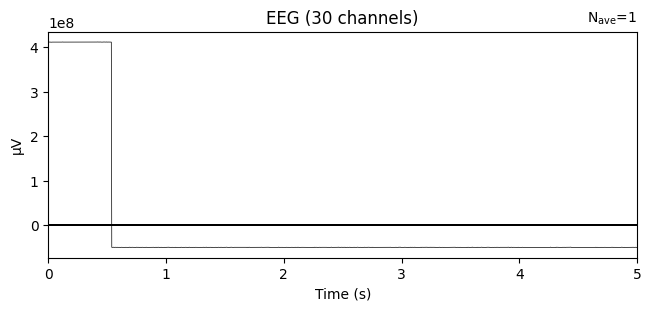

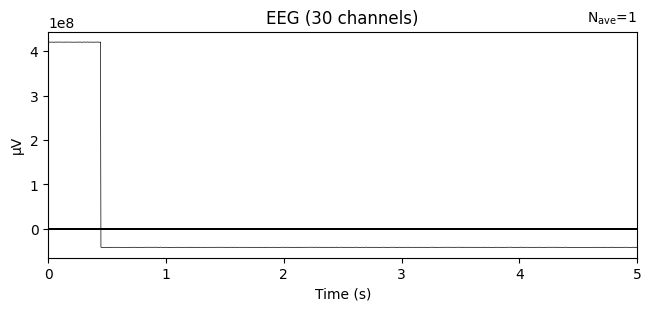

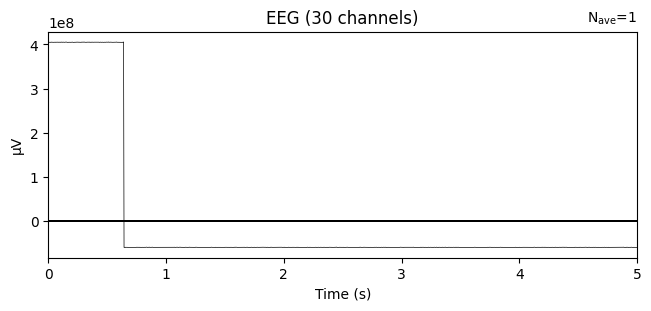

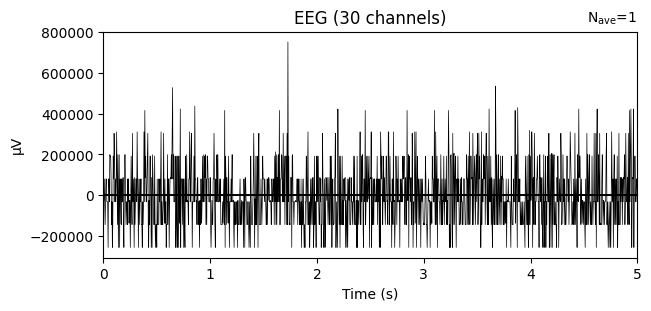

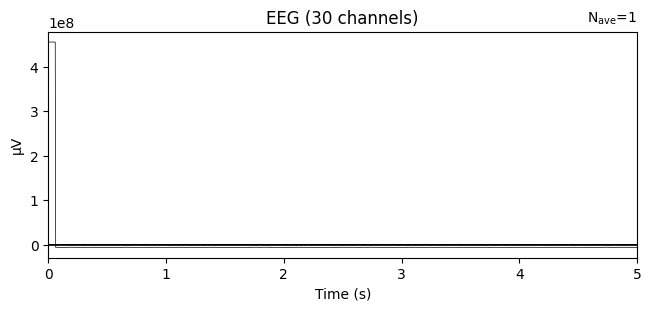

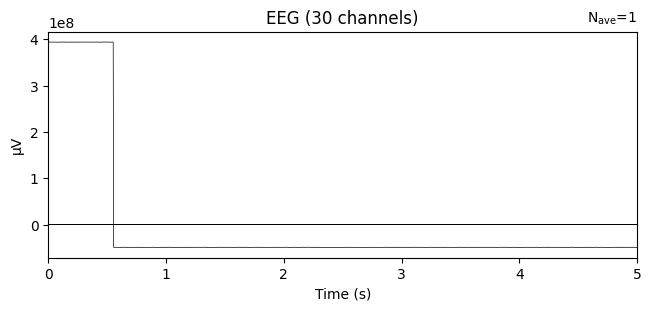

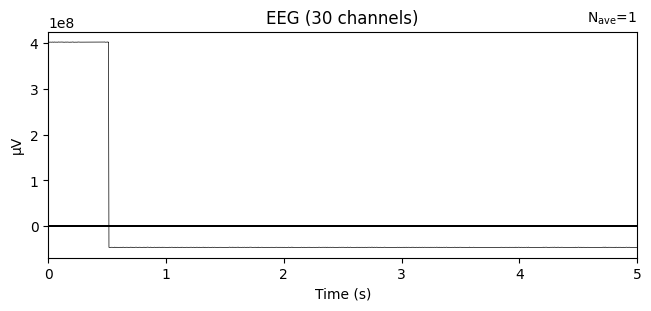

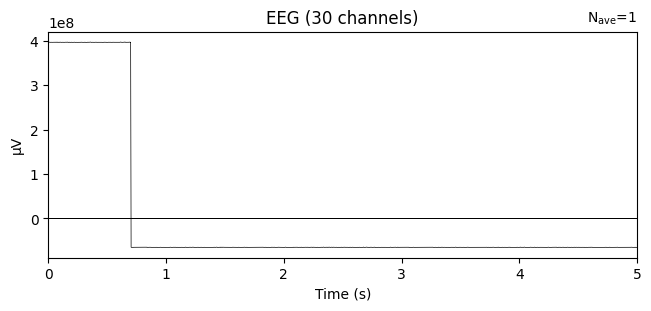

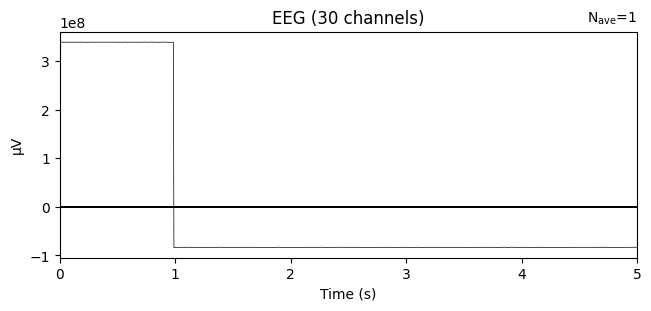

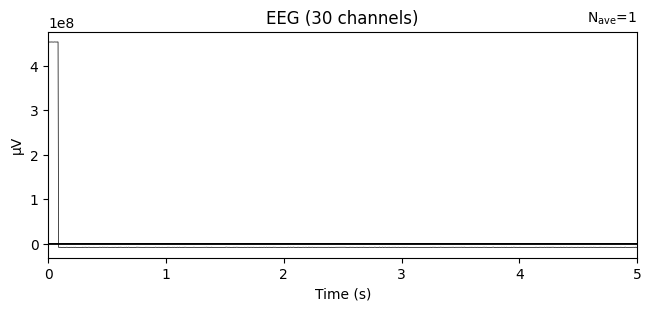

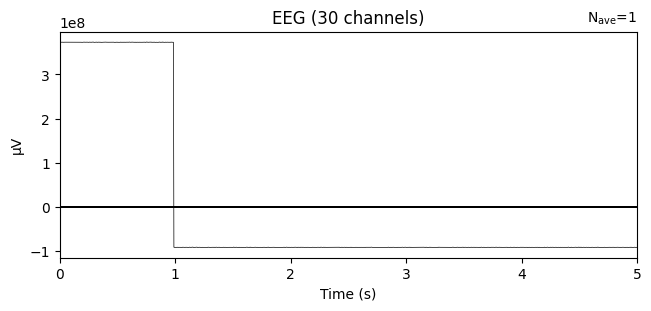

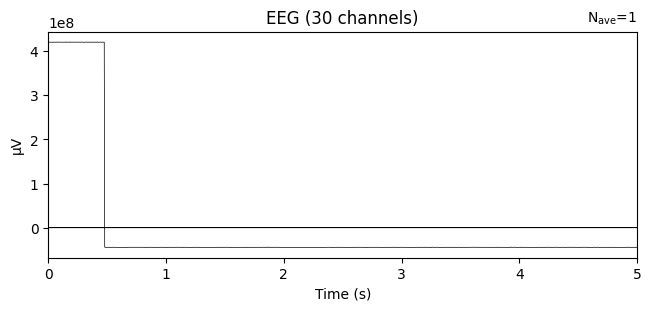

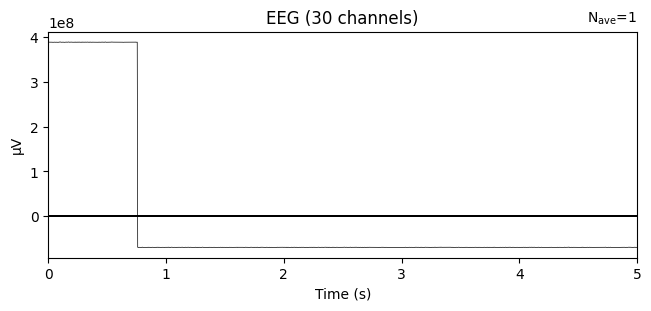

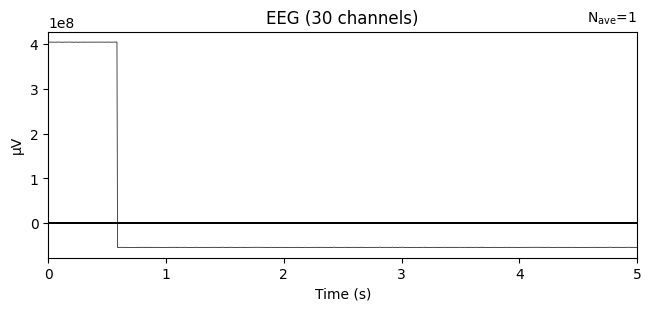

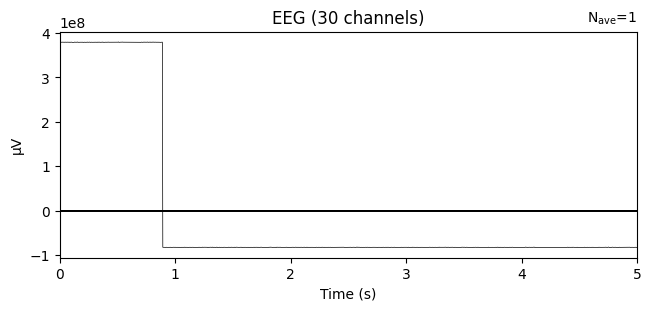

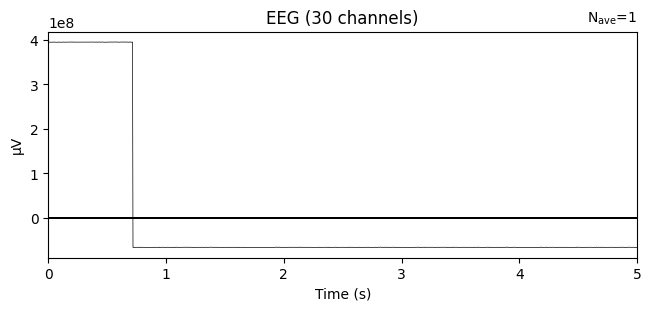

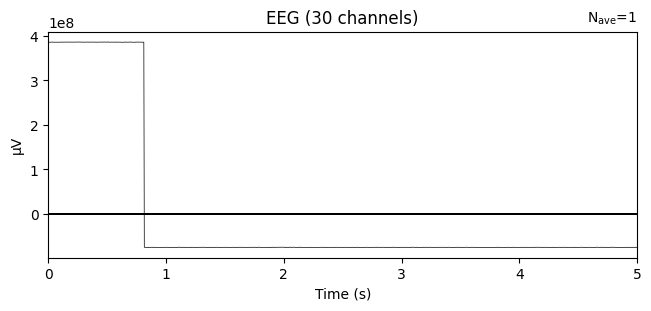

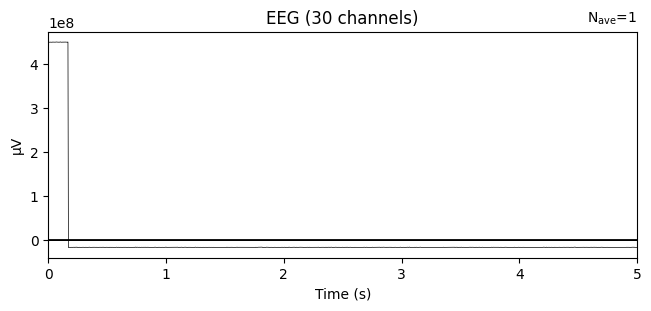

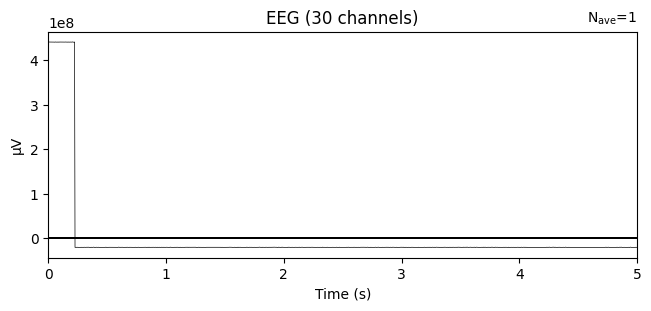

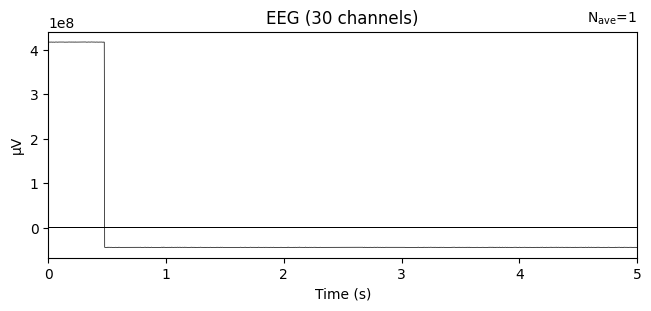

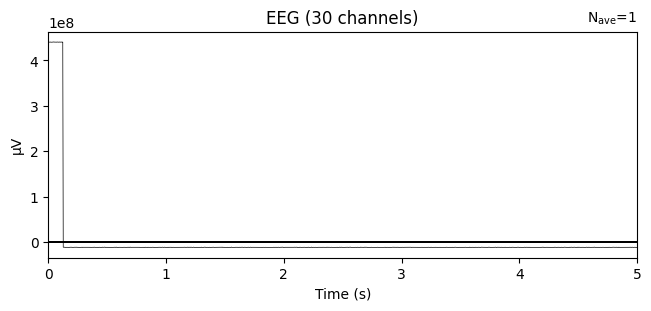

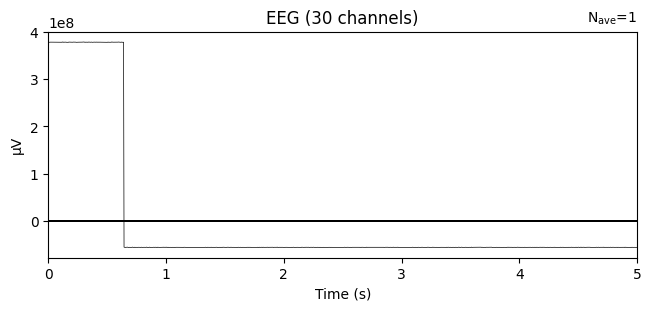

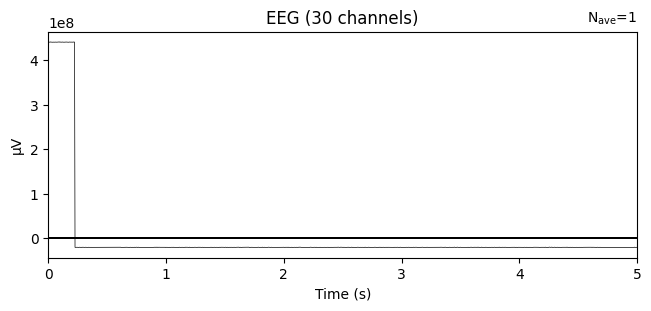

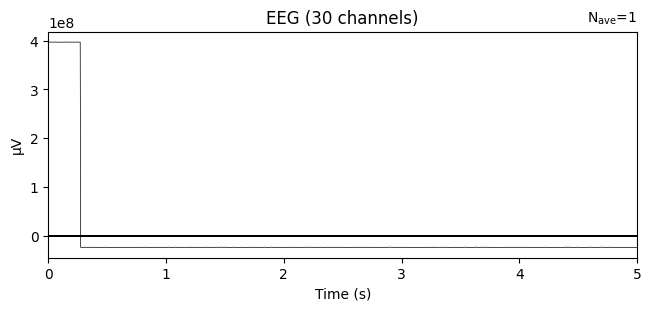

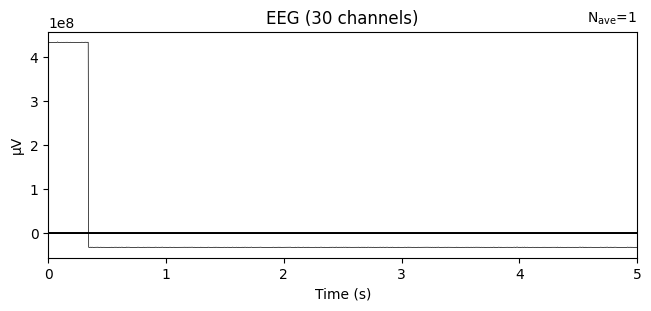

In [ ]:
from glob import glob
import mne
import numpy as np
from tqdm import tqdm
from sklearn.decomposition import PCA
from mne.decoding import UnsupervisedSpatialFilter

def read_data(file_path):
  raw = mne.io.read_raw_bdf(file_path, preload=True)

  # Apply PCA
  pca = UnsupervisedSpatialFilter(PCA(30), average=False)
  raw.resample(250)
  raw.filter(0.5, 25, fir_design="firwin")

  events = mne.make_fixed_length_events(raw, duration=5)
  epochs = mne.Epochs(raw, events, tmin=0, tmax=5, baseline=None, detrend=1, preload=True)

  X = epochs.get_data(copy=False)

  pca_data = pca.fit_transform(X)

  ev = mne.EvokedArray(
      np.mean(pca_data, axis=0),
      mne.create_info(30, epochs.info["sfreq"], ch_types="eeg"),
      tmin=0
  )

  # Plot PCA
  ev.plot(show=False, window_title="PCA", time_unit="s")


  # Extract features (you may need to customize this step based on your specific needs)
  #features=pca.get_components()
  return pca_data

def process_data(filepaths, label):
    epochs_array = []
    epochs_label = []

    for file_path in tqdm(filepaths, desc=f"Processing {label} data"):
        array = read_data(file_path)
        epochs_array.append(array)
        epochs_label.extend([label] * len(array))

    return epochs_array, epochs_label

# Filepaths
haemorrhage_filepaths = glob('/content/drive/MyDrive/GP-Data/Haemorrhage/*.bdf')
ischaemia_filepaths = glob('/content/drive/MyDrive/GP-Data/Ischaemia/*.bdf')
subject_filepaths = glob('/content/drive/MyDrive/GP-Data/Subjects/*.bdf')

# Process data in chunks
chunk_size = 10  # Adjust the chunk size based on your memory constraints

haemorrhage_epochs_array = []
haemorrhage_epochs_label = []
for i in range(0, len(haemorrhage_filepaths), chunk_size):
    chunk_filepaths = haemorrhage_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=0)
    haemorrhage_epochs_array.extend(chunk_array)
    haemorrhage_epochs_label.extend(chunk_label)


ischaemia_epochs_array = []
ischaemia_epochs_label = []
for i in range(0, len(ischaemia_filepaths), chunk_size):
    chunk_filepaths = ischaemia_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=1)
    ischaemia_epochs_array.extend(chunk_array)
    ischaemia_epochs_label.extend(chunk_label)

subject_epochs_array = []
subject_epochs_label = []
for i in range(0, len(subject_filepaths), chunk_size):
    chunk_filepaths = subject_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=2)
    subject_epochs_array.extend(chunk_array)
    subject_epochs_label.extend(chunk_label)

Processing 0 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P2_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12238847  =      0.000 ...   747.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22491 events found on stim channel Status
Event IDs: [65284 65288 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329 65336]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2889 events found on stim channel Status
Event IDs: [65296 65297 65305 65312 65313 65328 65329]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  10%|█         | 1/10 [00:40<06:08, 40.89s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P3_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22496 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2826 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  20%|██        | 2/10 [01:30<06:08, 46.04s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P5_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12058623  =      0.000 ...   736.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2902 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  30%|███       | 3/10 [02:13<05:13, 44.74s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P10_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2752 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  40%|████      | 4/10 [02:54<04:20, 43.35s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P11_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2845 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  50%|█████     | 5/10 [03:41<03:43, 44.65s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P14_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2787 events found on stim channel Status
Event IDs: [65281 65296 65297 65312 65313 65328 65329]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  60%|██████    | 6/10 [04:28<03:00, 45.20s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P6b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2903 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  70%|███████   | 7/10 [05:10<02:12, 44.12s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P17_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12189695  =      0.000 ...   744.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2799 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- L

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  80%|████████  | 8/10 [05:51<01:26, 43.27s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P20_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2862 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  90%|█████████ | 9/10 [06:31<00:42, 42.33s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P24_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11812863  =      0.000 ...   721.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2886 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  50%|█████     | 1/2 [00:40<00:40, 40.70s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17498111  =      0.000 ...  1068.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22476 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P1_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22488 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2825 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  10%|█         | 1/10 [00:42<06:19, 42.19s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2823 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  20%|██        | 2/10 [01:26<05:46, 43.29s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22478 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2866 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  30%|███       | 3/10 [02:06<04:54, 42.10s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P9_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13107199  =      0.000 ...   800.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [ 65281  65284  65296  65297  65301  65304  65305  65309  65311 130816]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [ 65281  65296  65297  65311 130816]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  40%|████      | 4/10 [02:49<04:13, 42.19s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 5/10 [03:32<03:32, 42.56s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11763711  =      0.000 ...   718.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2828 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  60%|██████    | 6/10 [04:13<02:48, 42.19s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P15_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22480 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2803 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  70%|███████   | 7/10 [04:55<02:06, 42.04s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P16_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65285 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Low

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  80%|████████  | 8/10 [05:37<01:23, 41.93s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2791 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
/usr/local/lib/python3.10/dist-packages/mne/viz/evoked.py:463: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(len(ch_types_used), 1, layout="constrained")
Processing 1 data:  90%|█████████ | 9/10 [06:17<00:41, 41.29s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P18_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2918 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:   0%|          | 0/4 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22497 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2932 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  25%|██▌       | 1/4 [00:38<01:56, 38.92s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2848 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 2/4 [01:19<01:19, 39.88s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2876 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  75%|███████▌  | 3/4 [02:00<00:40, 40.40s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P26_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12206079  =      0.000 ...   745.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2864 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Low

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12042239  =      0.000 ...   735.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2844 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  10%|█         | 1/10 [00:41<06:09, 41.10s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S2a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2895 events found on stim channel Status
Event IDs: [65281 65296 65297 65305]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  20%|██        | 2/10 [01:19<05:16, 39.61s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12746751  =      0.000 ...   778.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  30%|███       | 3/10 [02:04<04:52, 41.78s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2802 events found on stim channel Status
Event IDs: [65281 65292 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  40%|████      | 4/10 [02:49<04:18, 43.07s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2857 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  50%|█████     | 5/10 [03:28<03:27, 41.60s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2800 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  60%|██████    | 6/10 [04:09<02:45, 41.37s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2874 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  70%|███████   | 7/10 [04:52<02:05, 41.98s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2875 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  80%|████████  | 8/10 [05:32<01:22, 41.28s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2831 events found on stim channel Status
Event IDs: [65281 65296 65297 65301 65304]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  90%|█████████ | 9/10 [06:11<00:40, 40.70s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11714559  =      0.000 ...   715.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2870 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65289 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2807 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  11%|█         | 1/9 [00:40<05:24, 40.58s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22473 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2868 events found on stim channel Status
Event IDs: [65281 65284 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  22%|██▏       | 2/9 [01:20<04:42, 40.38s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2883 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  33%|███▎      | 3/9 [02:00<03:59, 39.89s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2917 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  44%|████▍     | 4/9 [02:39<03:17, 39.51s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11960319  =      0.000 ...   730.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2854 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  56%|█████▌    | 5/9 [03:18<02:37, 39.35s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12419071  =      0.000 ...   758.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  67%|██████▋   | 6/9 [04:00<02:01, 40.41s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  78%|███████▊  | 7/9 [04:40<01:20, 40.29s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12795903  =      0.000 ...   781.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2885 events found on stim channel Status
Event IDs: [65281 65288 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  89%|████████▉ | 8/9 [05:21<00:40, 40.53s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data: 100%|██████████| 9/9 [06:01<00:00, 40.19s/it]


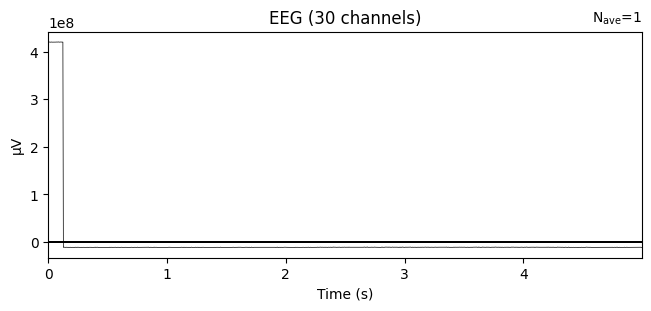

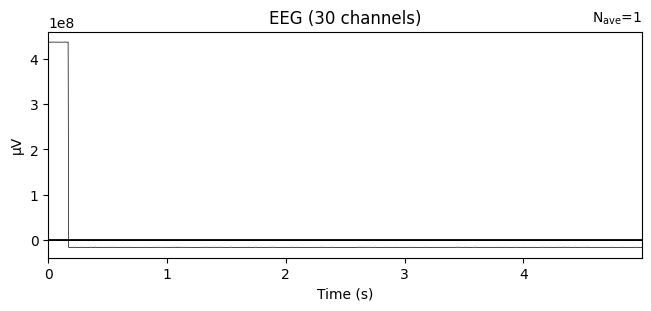

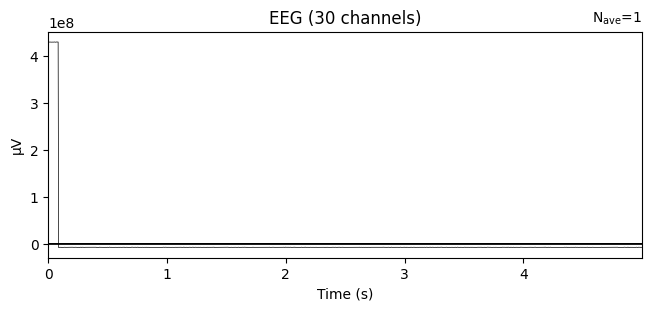

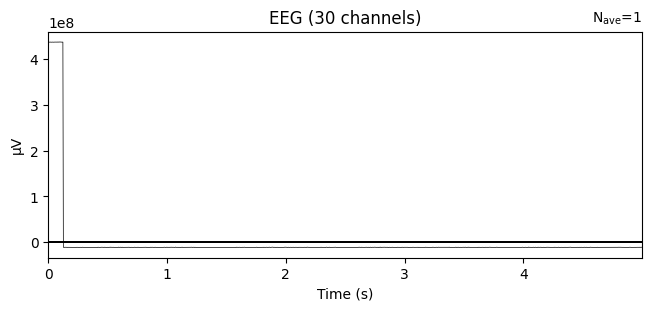

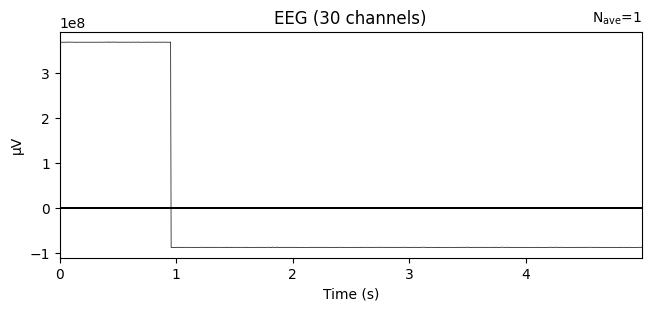

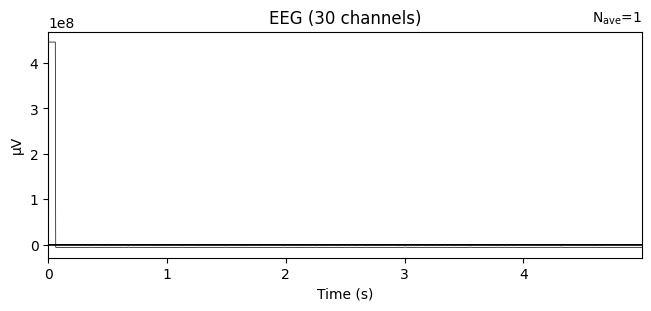

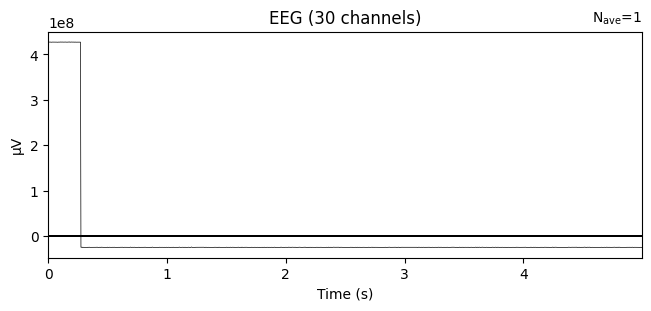

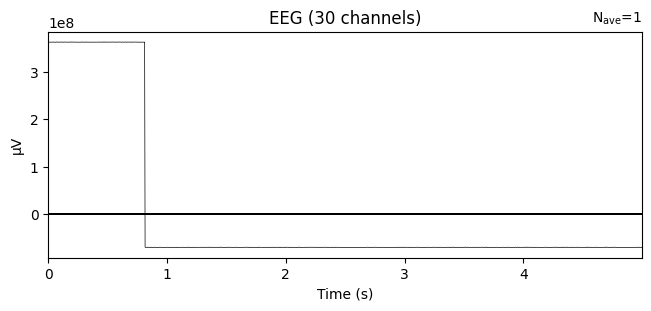

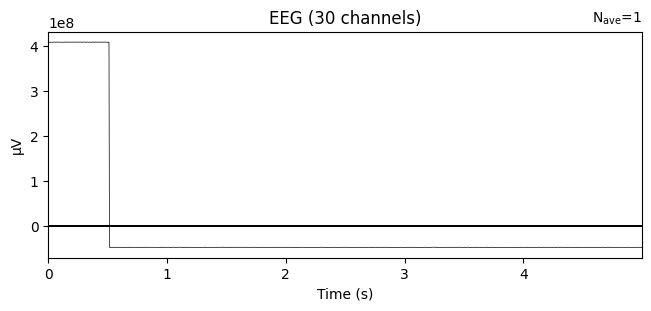

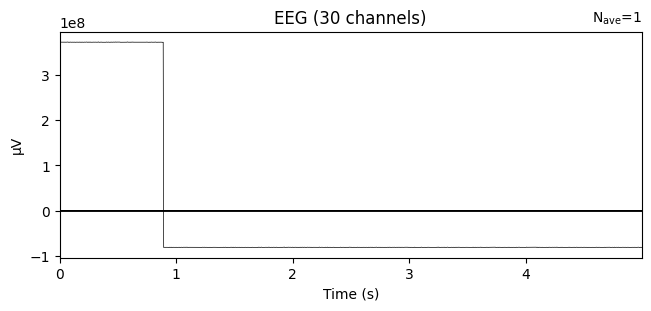

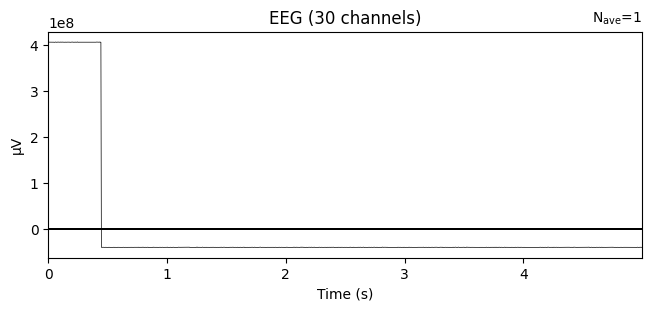

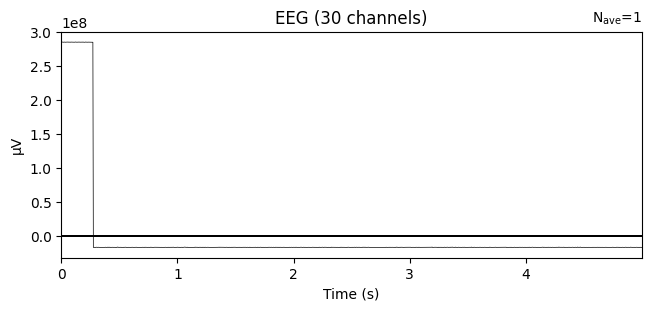

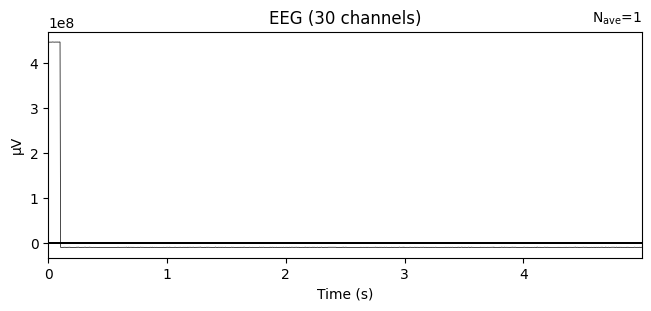

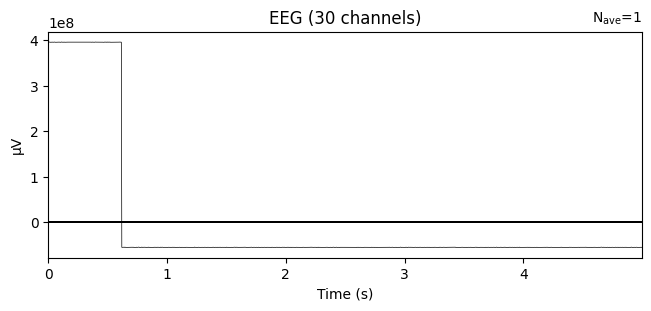

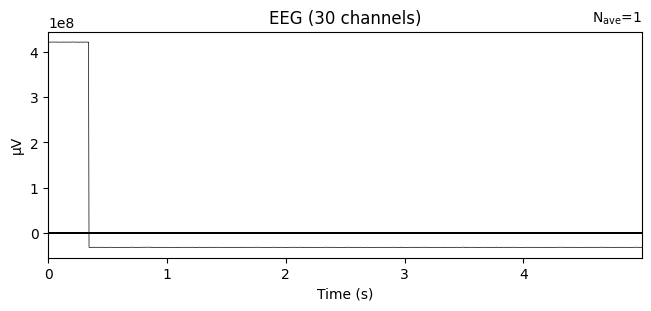

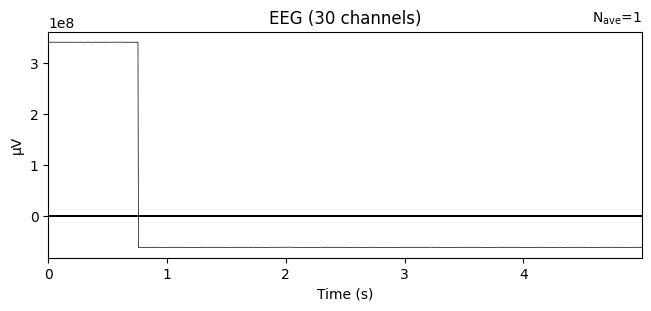

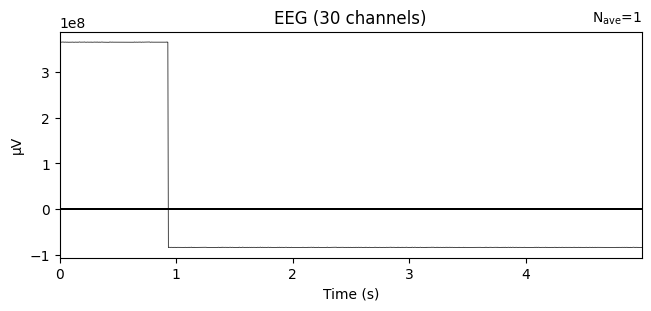

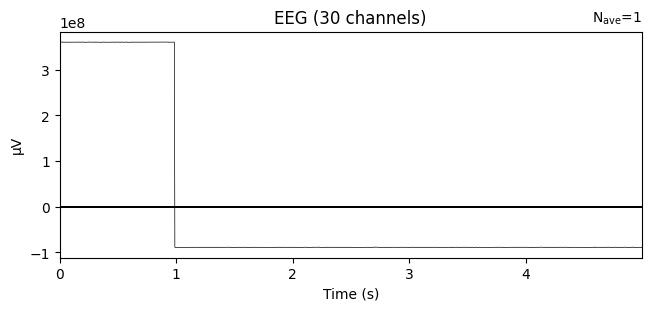

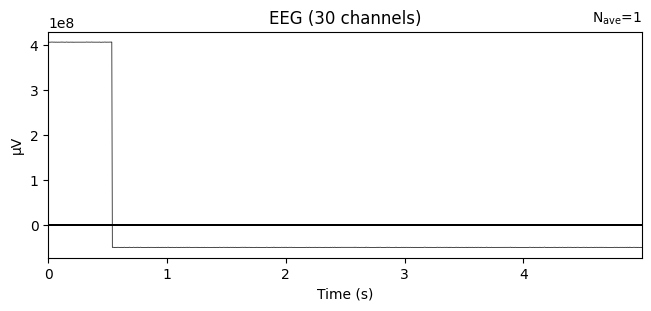

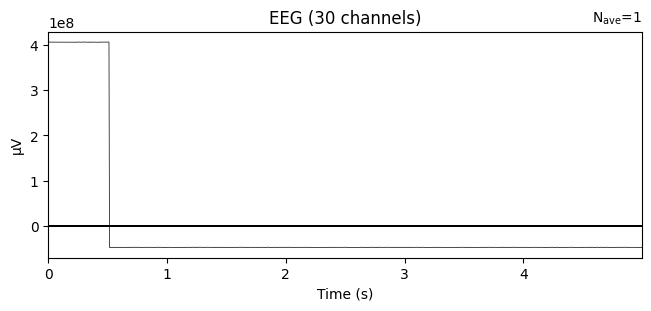

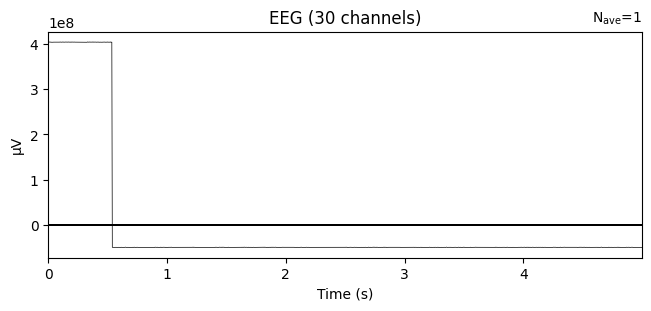

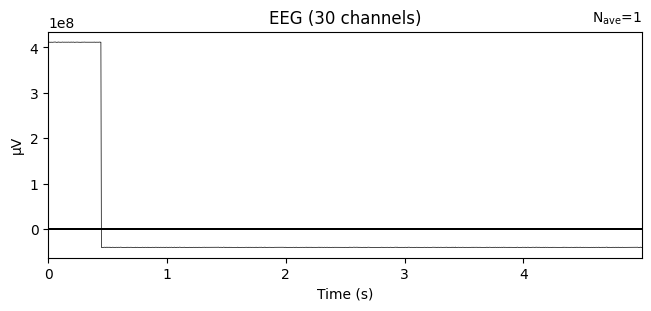

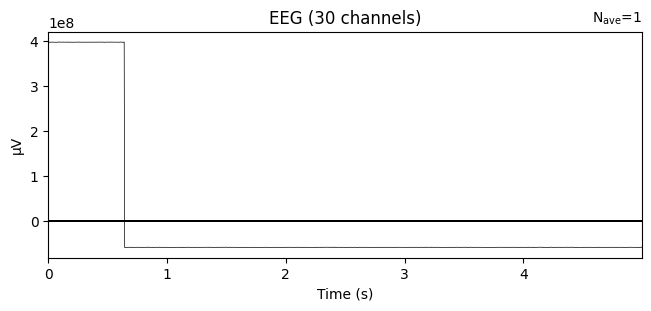

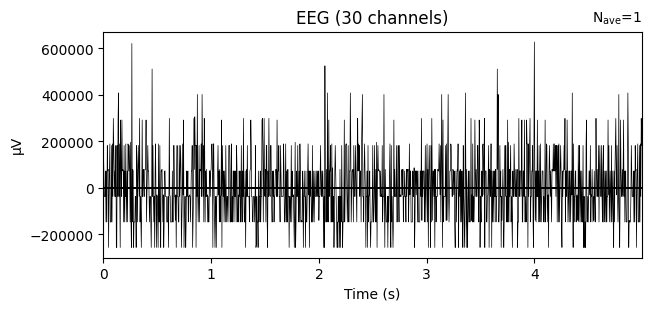

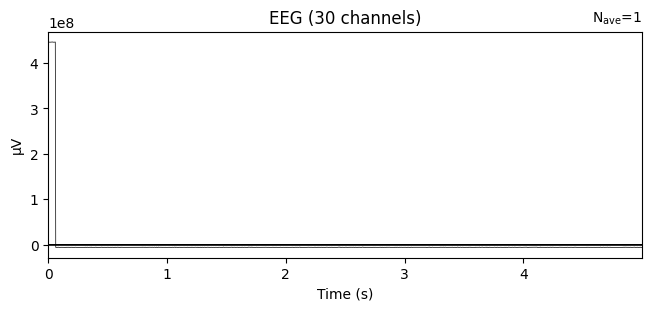

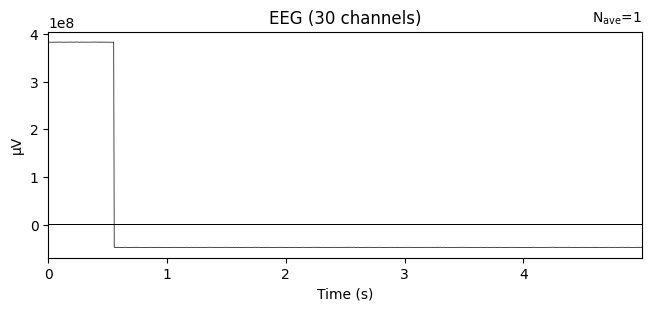

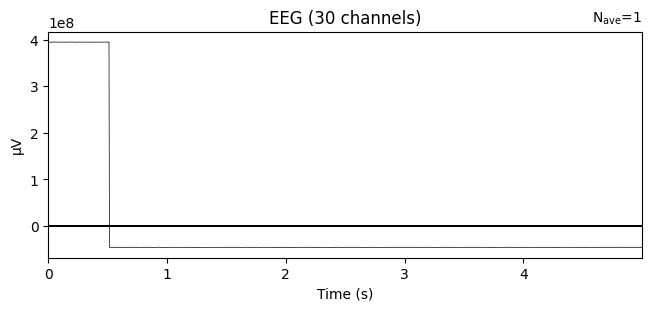

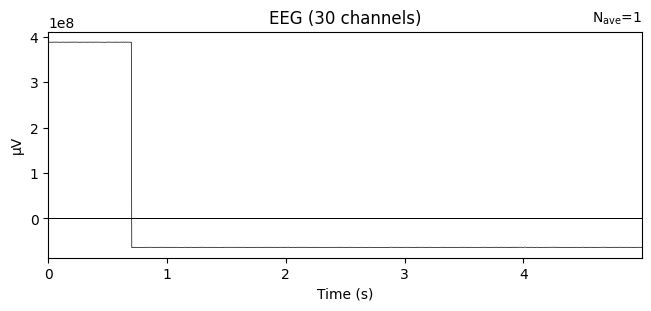

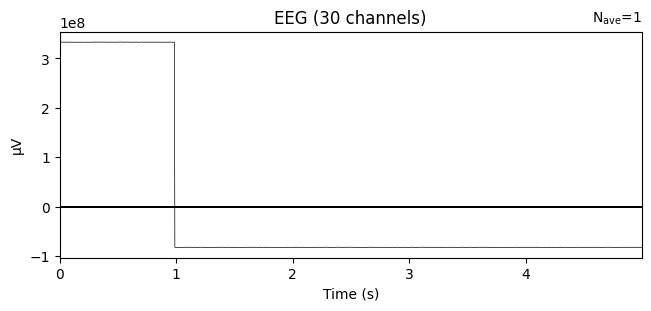

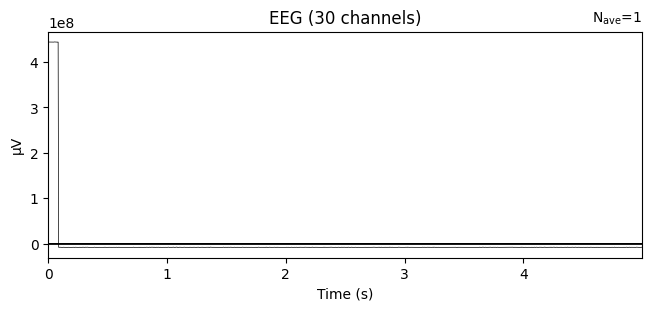

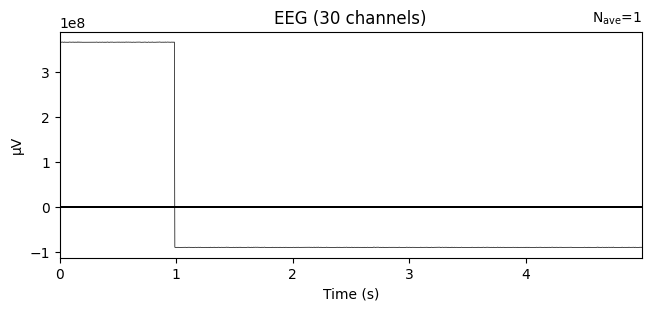

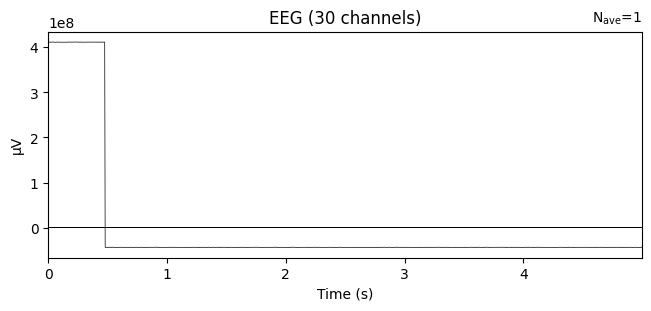

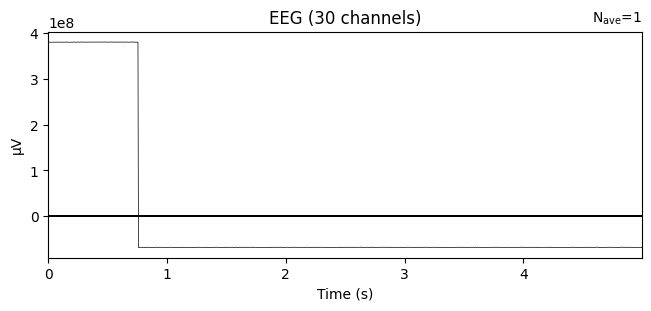

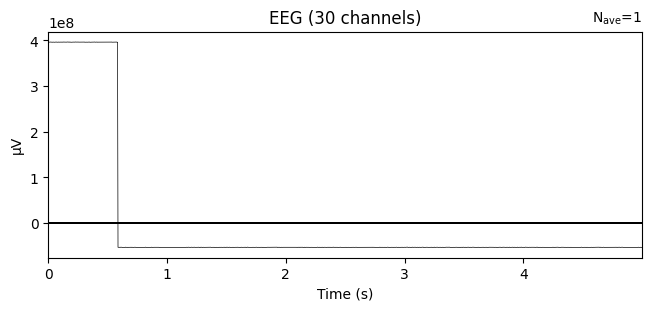

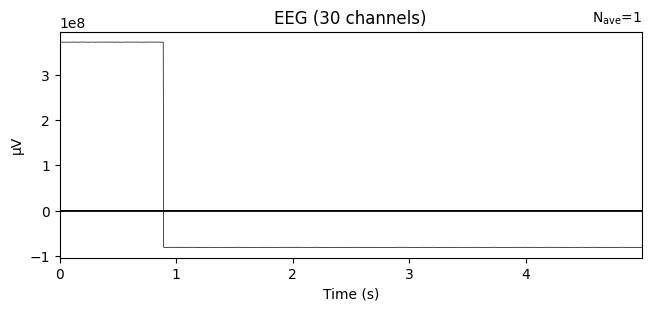

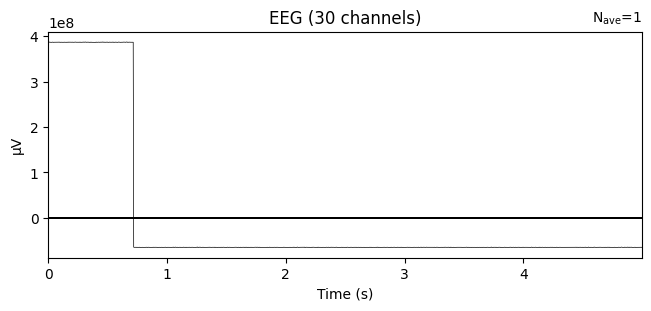

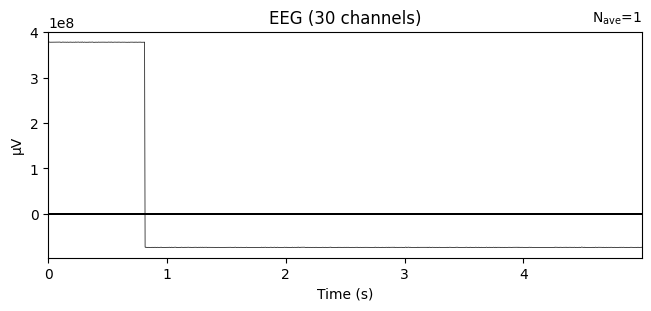

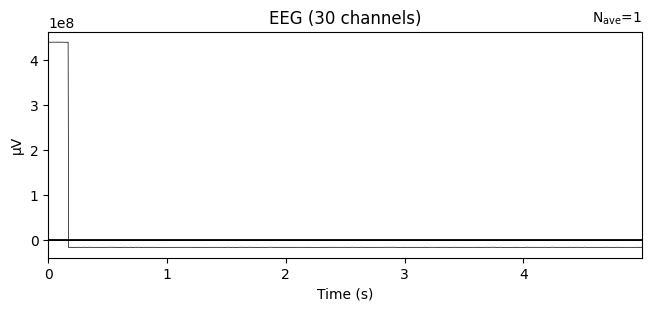

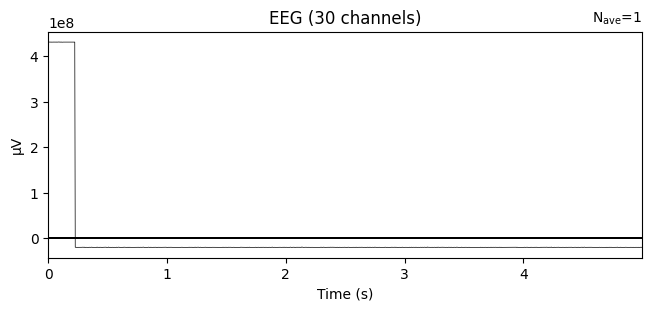

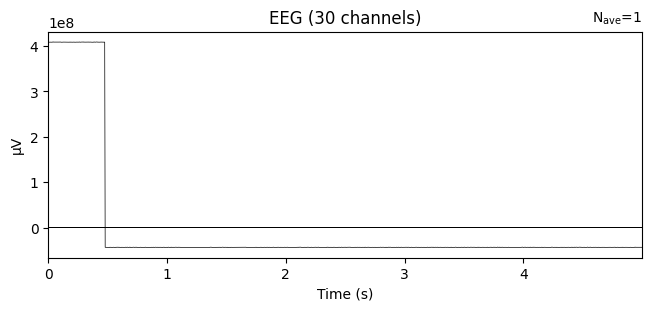

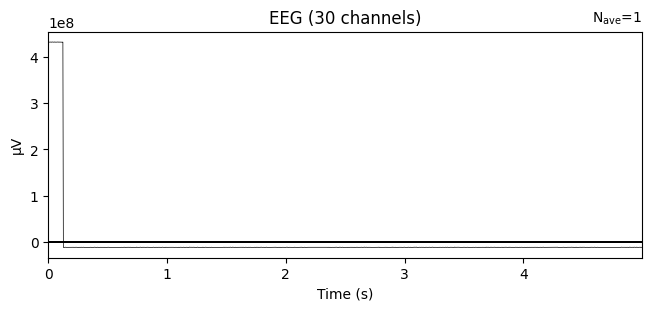

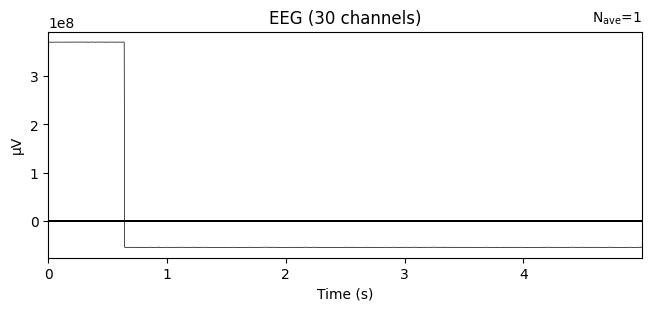

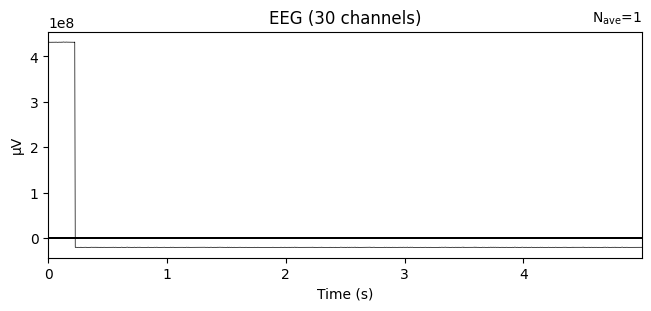

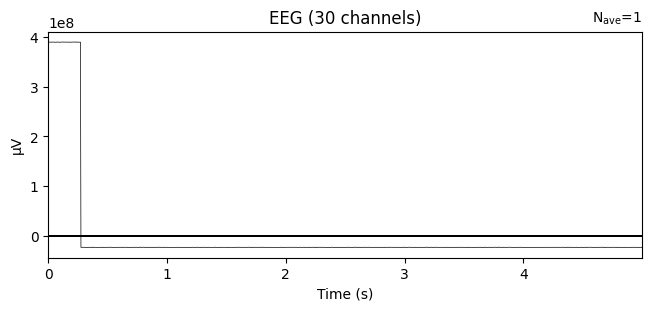

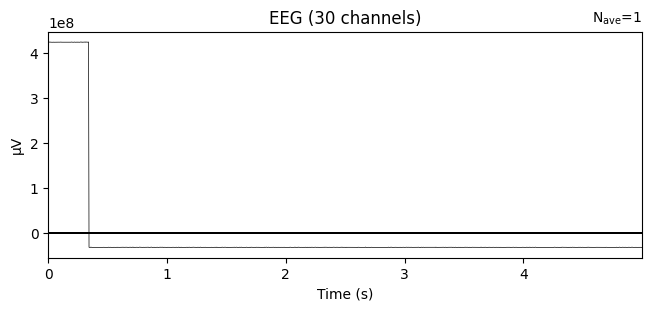

In [ ]:
from glob import glob
import mne
import numpy as np
from tqdm import tqdm
from sklearn.decomposition import PCA
from mne.decoding import UnsupervisedSpatialFilter

def read_data(file_path):
  raw = mne.io.read_raw_bdf(file_path, preload=True)

  # Apply PCA
  pca = UnsupervisedSpatialFilter(PCA(30), average=False)
  raw.resample(250)
  raw.filter(0.5, 25, fir_design="firwin")

  epochs = mne.make_fixed_length_epochs(raw, duration=5, overlap=0.1)

  X = epochs.get_data(copy=False)

  pca_data = pca.fit_transform(X)

  ev = mne.EvokedArray(
      np.mean(pca_data, axis=0),
      mne.create_info(30, epochs.info["sfreq"], ch_types="eeg"),
      tmin=0
  )

  # Plot PCA
  ev.plot(show=False, window_title="PCA", time_unit="s")


  # Extract features (you may need to customize this step based on your specific needs)
  #features=pca.get_components()
  return pca_data

def process_data(filepaths, label):
    epochs_array = []
    epochs_label = []

    for file_path in tqdm(filepaths, desc=f"Processing {label} data"):
        array = read_data(file_path)
        epochs_array.append(array)
        epochs_label.extend([label] * len(array))

    return epochs_array, epochs_label

# Filepaths
haemorrhage_filepaths = glob('/content/drive/MyDrive/GP-Data/Haemorrhage/*.bdf')
ischaemia_filepaths = glob('/content/drive/MyDrive/GP-Data/Ischaemia/*.bdf')
subject_filepaths = glob('/content/drive/MyDrive/GP-Data/Subjects/*.bdf')

# Process data in chunks
chunk_size = 10  # Adjust the chunk size based on your memory constraints

haemorrhage_epochs_array = []
haemorrhage_epochs_label = []
for i in range(0, len(haemorrhage_filepaths), chunk_size):
    chunk_filepaths = haemorrhage_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=0)
    haemorrhage_epochs_array.extend(chunk_array)
    haemorrhage_epochs_label.extend(chunk_label)


ischaemia_epochs_array = []
ischaemia_epochs_label = []
for i in range(0, len(ischaemia_filepaths), chunk_size):
    chunk_filepaths = ischaemia_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=1)
    ischaemia_epochs_array.extend(chunk_array)
    ischaemia_epochs_label.extend(chunk_label)

subject_epochs_array = []
subject_epochs_label = []
for i in range(0, len(subject_filepaths), chunk_size):
    chunk_filepaths = subject_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=2)
    subject_epochs_array.extend(chunk_array)
    subject_epochs_label.extend(chunk_label)

In [ ]:
#Stop HERE

In [ ]:
from glob import glob
import mne
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

def read_data(file_path):
    data = mne.io.read_raw_bdf(file_path, preload=True)
    data.set_eeg_reference()
    # Downsampling
    data.resample(250)
    data.filter(0.5, 25, fir_design='firwin')
    # Segmentation
    epochs = mne.make_fixed_length_epochs(data, duration=5, overlap=0.1)
    array = epochs.get_data()

    return array

def process_data(filepaths, label):
    epochs_array = []
    epochs_label = []

    for file_path in tqdm(filepaths, desc=f"Processing {label} data"):
        array = read_data(file_path)
        epochs_array.append(array)
        epochs_label.extend([label] * len(array))

    return epochs_array, epochs_label

# Filepaths
haemorrhage_filepaths = glob('/content/drive/MyDrive/GP-Data/Haemorrhage/*.bdf')
ischaemia_filepaths = glob('/content/drive/MyDrive/GP-Data/Ischaemia/*.bdf')
subject_filepaths = glob('/content/drive/MyDrive/GP-Data/Subjects/*.bdf')

# Process data in chunks
chunk_size = 10  # Adjust the chunk size based on your memory constraints

haemorrhage_epochs_array = []
haemorrhage_epochs_label = []
for i in range(0, len(haemorrhage_filepaths), chunk_size):
    chunk_filepaths = haemorrhage_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=0)
    haemorrhage_epochs_array.extend(chunk_array)
    haemorrhage_epochs_label.extend(chunk_label)


ischaemia_epochs_array = []
ischaemia_epochs_label = []
for i in range(0, len(ischaemia_filepaths), chunk_size):
    chunk_filepaths = ischaemia_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=1)
    ischaemia_epochs_array.extend(chunk_array)
    ischaemia_epochs_label.extend(chunk_label)

subject_epochs_array = []
subject_epochs_label = []
for i in range(0, len(subject_filepaths), chunk_size):
    chunk_filepaths = subject_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=2)
    subject_epochs_array.extend(chunk_array)
    subject_epochs_label.extend(chunk_label)

# Combine data and labels for training
all_epochs_array = np.vstack(haemorrhage_epochs_array + ischaemia_epochs_array + subject_epochs_array)
all_epochs_label = np.hstack(haemorrhage_epochs_label + ischaemia_epochs_label + subject_epochs_label)

# Reshape data for scaling
num_samples, num_channels, num_time_points = all_epochs_array.shape
all_epochs_reshaped = all_epochs_array.reshape(num_samples, -1)

# Apply StandardScaler to the reshaped data
scaler = StandardScaler()
all_epochs_scaled = scaler.fit_transform(all_epochs_reshaped).reshape(all_epochs_array.shape)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(all_epochs_scaled, all_epochs_label, test_size=0.2, random_state=42)

Processing 0 data:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P3_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22496 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2826 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  11%|█         | 1/9 [00:42<05:41, 42.75s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P5_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12058623  =      0.000 ...   736.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2902 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  22%|██▏       | 2/9 [01:27<05:08, 44.01s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P11_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2845 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain des

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  33%|███▎      | 3/9 [02:10<04:21, 43.54s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P6b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2903 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  44%|████▍     | 4/9 [02:53<03:37, 43.41s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P17_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12189695  =      0.000 ...   744.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2799 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed tim

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  56%|█████▌    | 5/9 [03:37<02:53, 43.46s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P20_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2862 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  67%|██████▋   | 6/9 [04:20<02:09, 43.21s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed ti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  78%|███████▊  | 7/9 [05:04<01:27, 43.73s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P24_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11812863  =      0.000 ...   721.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2886 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  89%|████████▉ | 8/9 [05:47<00:43, 43.42s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17498111  =      0.000 ...  1068.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22476 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P1_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22488 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2825 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  10%|█         | 1/10 [00:42<06:19, 42.12s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2823 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desig

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  20%|██        | 2/10 [01:24<05:39, 42.46s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22478 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2866 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desig

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  30%|███       | 3/10 [02:07<04:56, 42.42s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P9_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13107199  =      0.000 ...   800.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [ 65281  65284  65296  65297  65301  65304  65305  65309  65311 130816]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [ 65281  65296  65297  65311 130816]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  40%|████      | 4/10 [03:05<04:51, 48.65s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 5/10 [03:48<03:52, 46.58s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11763711  =      0.000 ...   718.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2828 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  60%|██████    | 6/10 [04:31<03:01, 45.27s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P15_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22480 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2803 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  70%|███████   | 7/10 [05:13<02:13, 44.46s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P16_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65285 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  80%|████████  | 8/10 [05:56<01:28, 44.04s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2791 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  90%|█████████ | 9/10 [06:39<00:43, 43.66s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P18_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2918 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:   0%|          | 0/4 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22497 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2932 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  25%|██▌       | 1/4 [00:42<02:06, 42.32s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2848 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 2/4 [01:24<01:24, 42.23s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2876 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  75%|███████▌  | 3/4 [02:06<00:42, 42.11s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P26_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12206079  =      0.000 ...   745.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2864 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12042239  =      0.000 ...   735.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2844 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  10%|█         | 1/10 [00:42<06:26, 42.95s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S2a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2895 events found on stim channel Status
Event IDs: [65281 65296 65297 65305]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  20%|██        | 2/10 [01:25<05:41, 42.64s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12746751  =      0.000 ...   778.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  30%|███       | 3/10 [02:09<05:04, 43.52s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2802 events found on stim channel Status
Event IDs: [65281 65292 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  40%|████      | 4/10 [02:53<04:20, 43.40s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2857 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  50%|█████     | 5/10 [03:35<03:35, 43.06s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2800 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  60%|██████    | 6/10 [04:23<02:59, 44.86s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2874 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  70%|███████   | 7/10 [05:06<02:12, 44.09s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2875 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  80%|████████  | 8/10 [05:49<01:27, 43.82s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2831 events found on stim channel Status
Event IDs: [65281 65296 65297 65301 65304]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  90%|█████████ | 9/10 [06:32<00:43, 43.47s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11714559  =      0.000 ...   715.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2870 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65289 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2807 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  11%|█         | 1/9 [00:42<05:37, 42.24s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22473 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2868 events found on stim channel Status
Event IDs: [65281 65284 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  22%|██▏       | 2/9 [01:24<04:56, 42.42s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2883 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  33%|███▎      | 3/9 [02:07<04:16, 42.72s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2917 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  44%|████▍     | 4/9 [02:50<03:32, 42.49s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11960319  =      0.000 ...   730.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2854 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  56%|█████▌    | 5/9 [03:32<02:49, 42.46s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12419071  =      0.000 ...   758.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  67%|██████▋   | 6/9 [04:19<02:12, 44.18s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  78%|███████▊  | 7/9 [05:02<01:27, 43.53s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12795903  =      0.000 ...   781.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2885 events found on stim channel Status
Event IDs: [65281 65288 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  89%|████████▉ | 8/9 [05:46<00:43, 43.67s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data: 100%|██████████| 9/9 [06:28<00:00, 43.17s/it]


In [ ]:
from keras import models, layers

# Build the autoencoder
model = models.Sequential([
    layers.Input(shape=(num_channels, num_time_points)),
    layers.Reshape((num_channels * num_time_points, 1)),
    layers.Conv1D(64, 3, activation='relu', padding='same'),  # Reduced filters
    layers.Conv1D(32, 3, activation='relu', padding='same'),  # Reduced filters
    layers.Flatten(),
    layers.Dense(64, activation='relu'),  # Reduced neurons
    layers.Dense(num_channels * num_time_points, activation='linear'),
    layers.Reshape((num_channels, num_time_points)),
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Reduce batch size
batch_size = 8

# Train the autoencoder
model.fit(X_train, X_train, epochs=10, batch_size=batch_size, validation_data=(X_test, X_test))

# Use the encoder part of the autoencoder to get the selected features
encoder = models.Model(inputs=model.input, outputs=model.layers[-3].output)
selected_features_train = encoder.predict(X_train)
selected_features_test = encoder.predict(X_test)

ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul] name: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have 'selected_features_train' and 'selected_features_test' from the autoencoder

# Flatten selected features for training classifiers
selected_features_train_flat = selected_features_train.reshape(selected_features_train.shape[0], -1)
selected_features_test_flat = selected_features_test.reshape(selected_features_test.shape[0], -1)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(selected_features_train_flat, y_train)

# Predictions on the test set
rf_predictions = rf_classifier.predict(selected_features_test_flat)

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Classifier Accuracy: {rf_accuracy:.2f}')

# Train k-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(selected_features_train_flat, y_train)

# Predictions on the test set
knn_predictions = knn_classifier.predict(selected_features_test_flat)

# Evaluate k-Nearest Neighbors Classifier
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'k-Nearest Neighbors Classifier Accuracy: {knn_accuracy:.2f}')

# Train Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(selected_features_train_flat, y_train)

# Predictions on the test set
svm_predictions = svm_classifier.predict(selected_features_test_flat)

# Evaluate Support Vector Machine Classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'Support Vector Machine Classifier Accuracy: {svm_accuracy:.2f}')

In [ ]:
from glob import glob
import mne
import numpy as np
from scipy import stats
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

def read_data(file_path):
    data = mne.io.read_raw_bdf(file_path, preload=True)
    data.set_eeg_reference()
    # Downsampling
    data.resample(250)
    data.filter(0.5, 25, fir_design='firwin')
    # Segmentation
    epochs = mne.make_fixed_length_epochs(data, duration=5, overlap=0.1)
    array = epochs.get_data()

    # Reshape the data for scaling
    #num_samples, num_channels, num_time_points = array.shape
    #array_reshaped = array.reshape(num_samples, -1)

    # Apply StandardScaler to the reshaped data
    #scaler = StandardScaler()
    #array_scaled = scaler.fit_transform(array_reshaped).reshape(array.shape)

    return array

def process_data(filepaths, label):
    epochs_array = []
    epochs_label = []

    for file_path in tqdm(filepaths, desc=f"Processing {label} data"):
        array = read_data(file_path)
        epochs_array.append(array)
        epochs_label.extend([label] * len(array))

    return epochs_array, epochs_label

# Filepaths
haemorrhage_filepaths = glob('/content/drive/MyDrive/GP-Data/Haemorrhage/*.bdf')
ischaemia_filepaths = glob('/content/drive/MyDrive/GP-Data/Ischaemia/*.bdf')
subject_filepaths = glob('/content/drive/MyDrive/GP-Data/Subjects/*.bdf')

# Process data in chunks
chunk_size = 10  # Adjust the chunk size based on your memory constraints

haemorrhage_epochs_array = []
haemorrhage_epochs_label = []
for i in range(0, len(haemorrhage_filepaths), chunk_size):
    chunk_filepaths = haemorrhage_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=0)
    haemorrhage_epochs_array.extend(chunk_array)
    haemorrhage_epochs_label.extend(chunk_label)


ischaemia_epochs_array = []
ischaemia_epochs_label = []
for i in range(0, len(ischaemia_filepaths), chunk_size):
    chunk_filepaths = ischaemia_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=1)
    ischaemia_epochs_array.extend(chunk_array)
    ischaemia_epochs_label.extend(chunk_label)

subject_epochs_array = []
subject_epochs_label = []
for i in range(0, len(subject_filepaths), chunk_size):
    chunk_filepaths = subject_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=2)
    subject_epochs_array.extend(chunk_array)
    subject_epochs_label.extend(chunk_label)

Processing 0 data:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P3_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22496 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2826 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  11%|█         | 1/9 [00:39<05:13, 39.16s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P5_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12058623  =      0.000 ...   736.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2902 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  22%|██▏       | 2/9 [01:18<04:35, 39.39s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P11_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2845 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain des

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  33%|███▎      | 3/9 [02:02<04:08, 41.41s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P6b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2903 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  44%|████▍     | 4/9 [02:46<03:32, 42.52s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P17_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12189695  =      0.000 ...   744.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2799 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed tim

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  56%|█████▌    | 5/9 [03:33<02:56, 44.08s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P20_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2862 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  67%|██████▋   | 6/9 [04:16<02:11, 43.67s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed ti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  78%|███████▊  | 7/9 [05:00<01:27, 43.76s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P24_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11812863  =      0.000 ...   721.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2886 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  89%|████████▉ | 8/9 [05:44<00:43, 43.75s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17498111  =      0.000 ...  1068.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22476 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P1_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22488 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2825 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  10%|█         | 1/10 [00:46<06:59, 46.60s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2823 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desig

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  20%|██        | 2/10 [01:30<05:58, 44.78s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22478 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2866 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desig

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  30%|███       | 3/10 [02:14<05:11, 44.45s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P9_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13107199  =      0.000 ...   800.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [ 65281  65284  65296  65297  65301  65304  65305  65309  65311 130816]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [ 65281  65296  65297  65311 130816]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  40%|████      | 4/10 [03:00<04:31, 45.25s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 5/10 [03:46<03:46, 45.30s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11763711  =      0.000 ...   718.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2828 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  60%|██████    | 6/10 [04:33<03:03, 45.94s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P15_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22480 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2803 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  70%|███████   | 7/10 [05:17<02:16, 45.45s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P16_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65285 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  80%|████████  | 8/10 [06:03<01:31, 45.73s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2791 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  90%|█████████ | 9/10 [06:49<00:45, 45.71s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P18_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2918 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:   0%|          | 0/4 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22497 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2932 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  25%|██▌       | 1/4 [00:45<02:15, 45.31s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2848 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 2/4 [01:28<01:27, 43.84s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2876 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  75%|███████▌  | 3/4 [02:10<00:43, 43.25s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P26_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12206079  =      0.000 ...   745.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2864 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12042239  =      0.000 ...   735.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2844 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  10%|█         | 1/10 [00:43<06:34, 43.88s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S2a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2895 events found on stim channel Status
Event IDs: [65281 65296 65297 65305]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  20%|██        | 2/10 [01:28<05:56, 44.53s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12746751  =      0.000 ...   778.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  30%|███       | 3/10 [02:13<05:11, 44.49s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2802 events found on stim channel Status
Event IDs: [65281 65292 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  40%|████      | 4/10 [02:57<04:27, 44.52s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2857 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  50%|█████     | 5/10 [03:43<03:43, 44.75s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2800 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  60%|██████    | 6/10 [04:27<02:57, 44.50s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2874 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  70%|███████   | 7/10 [05:12<02:14, 44.73s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2875 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  80%|████████  | 8/10 [05:56<01:29, 44.60s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2831 events found on stim channel Status
Event IDs: [65281 65296 65297 65301 65304]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  90%|█████████ | 9/10 [06:44<00:45, 45.62s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11714559  =      0.000 ...   715.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2870 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65289 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2807 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  11%|█         | 1/9 [00:45<06:04, 45.58s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22473 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2868 events found on stim channel Status
Event IDs: [65281 65284 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  22%|██▏       | 2/9 [01:33<05:30, 47.24s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2883 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  33%|███▎      | 3/9 [02:19<04:37, 46.24s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2917 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  44%|████▍     | 4/9 [03:07<03:55, 47.01s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11960319  =      0.000 ...   730.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2854 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  56%|█████▌    | 5/9 [03:52<03:05, 46.44s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12419071  =      0.000 ...   758.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  67%|██████▋   | 6/9 [04:37<02:17, 45.81s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  78%|███████▊  | 7/9 [05:22<01:30, 45.50s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12795903  =      0.000 ...   781.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2885 events found on stim channel Status
Event IDs: [65281 65288 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  89%|████████▉ | 8/9 [06:12<00:47, 47.01s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data: 100%|██████████| 9/9 [07:00<00:00, 46.71s/it]


In [ ]:
# Concatenate results
#data_array = np.vstack(haemorrhage_epochs_array + ischaemia_epochs_array + subject_epochs_array)
#label_array = np.hstack(haemorrhage_epochs_label + ischaemia_epochs_label + subject_epochs_label)

In [ ]:
# Combine epoch arrays for different classes into a single list
data_list= haemorrhage_epochs_array + ischaemia_epochs_array + subject_epochs_array
# Combine corresponding labels into a single list
label_list= haemorrhage_epochs_label + ischaemia_epochs_label + subject_epochs_label

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming data is stored in data_list and labels in label_list

# Convert data and labels to NumPy arrays
data_array = np.concatenate(data_list)

# Use np.hstack for labels
label_array = np.hstack(label_list)

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(label_array)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_array, encoded_labels, test_size=0.2, random_state=42)

# Build a simple autoencoder
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(33, 1250)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1250, activation='linear')  # Adjust the output shape based on your data
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
model.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

# Use the encoder part of the autoencoder to get the selected features
encoder = tf.keras.Sequential(model.layers[:-1])

# Transform the data to obtain the selected features
selected_features_train = encoder.predict(X_train)
selected_features_test = encoder.predict(X_test)

Epoch 1/10
156/156 [==============================] - 4s 15ms/step - loss: 6272670.5000 - val_loss: 89706.3828
Epoch 2/10
156/156 [==============================] - 1s 7ms/step - loss: 75381.3047 - val_loss: 88630.0312
Epoch 3/10
156/156 [==============================] - 1s 7ms/step - loss: 76752.7891 - val_loss: 90798.4922
Epoch 4/10
156/156 [==============================] - 1s 7ms/step - loss: 77339.0078 - val_loss: 93421.0938
Epoch 5/10
156/156 [==============================] - 1s 7ms/step - loss: 80990.2734 - val_loss: 124828.8984
Epoch 6/10
156/156 [==============================] - 1s 7ms/step - loss: 52174.9258 - val_loss: 37181.7188
Epoch 7/10
156/156 [==============================] - 1s 7ms/step - loss: 23868.2520 - val_loss: 21398.5098
Epoch 8/10
156/156 [==============================] - 1s 7ms/step - loss: 23346.9004 - val_loss: 25199.3340
Epoch 9/10
156/156 [==============================] - 1s 7ms/step - loss: 21476.7344 - val_loss: 21303.1270
Epoch 10/10
39/39 [=====

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Reshape selected features to 2D array
selected_features_train_2d = selected_features_train.reshape(selected_features_train.shape[0], -1)
selected_features_test_2d = selected_features_test.reshape(selected_features_test.shape[0], -1)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(selected_features_train_2d, y_train)

# Predictions on the test set
rf_predictions = rf_classifier.predict(selected_features_test_2d)

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Classifier Accuracy: {rf_accuracy:.2f}')

# Train k-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(selected_features_train_2d, y_train)

# Predictions on the test set
knn_predictions = knn_classifier.predict(selected_features_test_2d)

# Evaluate k-Nearest Neighbors Classifier
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'k-Nearest Neighbors Classifier Accuracy: {knn_accuracy:.2f}')

Random Forest Classifier Accuracy: 0.58
k-Nearest Neighbors Classifier Accuracy: 0.38


In [ ]:
# Create a list of groups, where each group corresponds to a class and has the same length as its respective data
groups_list=[[i]*len(j) for i, j in enumerate(data_list)]
group_array=np.hstack(groups_list)

In [ ]:
from glob import glob
import mne
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def read_and_feature_select_autoencoder(file_paths):
    all_features = []
    all_labels = []

    for file_path in file_paths:
        data = mne.io.read_raw_bdf(file_path, preload=True)
        data.set_eeg_reference()
        # Downsampling
        data.resample(250)
        data.filter(0.5, 25, fir_design='firwin')
        # Segmentation
        epochs = mne.make_fixed_length_epochs(data, duration=5, overlap=0.1)
        array = epochs.get_data()

        # Reshape the data for the autoencoder
        num_samples, num_channels, num_time_points = array.shape
        array_reshaped = array.reshape(num_samples, -1)

        # Build a simple autoencoder
        model = Sequential([
            Dense(128, input_dim=num_channels * num_time_points, activation='relu'),
            Dense(64, activation='relu'),
            Dense(128, activation='relu'),
            Dense(num_channels * num_time_points, activation='linear')
        ])

        model.compile(optimizer='adam', loss='mean_squared_error')

        # Split the data into training and testing sets
        X_train, X_test, _, _ = train_test_split(array_reshaped, array_reshaped, test_size=0.2, random_state=42)

        # Train the autoencoder
        model.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

        # Use the encoder part of the autoencoder to get the selected features
        encoder = Sequential(model.layers[:-1])
        selected_features = encoder.predict(array_reshaped)

        labels = epochs.events[:, -1]

        all_features.append(selected_features)
        all_labels.extend(labels)

    return np.vstack(all_features), np.array(all_labels)

# Filepaths
haemorrhage_filepaths = glob('/content/drive/MyDrive/GP-Data/Haemorrhage/*.bdf')
ischaemia_filepaths = glob('/content/drive/MyDrive/GP-Data/Ischaemia/*.bdf')
subject_filepaths = glob('/content/drive/MyDrive/GP-Data/Subjects/*.bdf')


# Process data in chunks
chunk_size = 10  # Adjust the chunk size based on your memory constraints

haemorrhage_epochs_array, haemorrhage_epochs_label = read_and_feature_select_autoencoder(haemorrhage_filepaths)
ischaemia_epochs_array, ischaemia_epochs_label = read_and_feature_select_autoencoder(ischaemia_filepaths)
subject_epochs_array, subject_epochs_label = read_and_feature_select_autoencoder(subject_filepaths)

# Concatenate results
data_array = np.vstack([haemorrhage_epochs_array, ischaemia_epochs_array, subject_epochs_array])
label_array = np.hstack([haemorrhage_epochs_label, ischaemia_epochs_label, subject_epochs_label])

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P3_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22496 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2826 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
Epoch 1/10
4/4 [==============================] - 1s 126ms/step - loss: 122961200.0000 - val_loss: 86581312.0000
Epoch 2/10
4/4 [==============================] - 0s 71ms/step - loss: 51187184.0000 - val_loss: 11645516.0000
Epoch 3/10
4/4 [==============================] - 0s 63ms/step - loss: 21719716.0000 - val_loss: 6115615.5000
Epoch 4/10
4/4 [==============================] - 0s 67ms/step - loss: 4794716.0000 - val_loss: 11217514.0000
Epoch 5/10
4/4 [==============================] - 0s 62ms/step - loss: 11149505.0000 - val_loss: 5328491.5000
Epoch 6/10
4/4 [==============================] - 0s 61ms/step - loss: 3271155.2500 - val_loss: 4083736.0000
Epoch 7/10
4/4 [==============================] - 0s 65ms/step - loss: 3693699.2500 - val_loss: 682972.6250
Epoch 8/10
4/4 [==============================] - 0s 63ms/step - loss: 909283.0625 - val_loss: 2085601.1250
Epoch 9/10
4/4 [==============================] - 0s 57ms/step - loss: 1744017.2500 - val_loss: 5233

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 112ms/step - loss: 122076432.0000 - val_loss: 85807488.0000
Epoch 2/10
4/4 [==============================] - 0s 62ms/step - loss: 49703440.0000 - val_loss: 9671801.0000
Epoch 3/10
4/4 [==============================] - 0s 60ms/step - loss: 21684136.0000 - val_loss: 7553717.5000
Epoch 4/10
4/4 [==============================] - 0s 61ms/step - loss: 4703088.0000 - val_loss: 10472979.0000
Epoch 5/10
4/4 [==============================] - 0s 63ms/step - loss: 11523861.0000 - val_loss: 7292398.0000
Epoch 6/10
4/4 [==============================] - 0s 63ms/step - loss: 3909375.7500 - val_loss: 2570769.5000
Epoch 7/10
4/4 [==============================] - 0s 70ms/step - loss: 3878169.7500 - val_loss: 2276627.2500
Epoch 8/10
4/4 [==============================] - 0s 69ms/step - loss: 1100437.8750 - val_loss: 1445261.5000
Epoch 9/10
4/4 [==============================] - 0s 68ms/step - loss: 1997686.8750 - val_loss: 1441462.5000
Epoch 10/10

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 109ms/step - loss: 125036312.0000 - val_loss: 92201240.0000
Epoch 2/10
4/4 [==============================] - 0s 63ms/step - loss: 59727596.0000 - val_loss: 7999987.0000
Epoch 3/10
4/4 [==============================] - 0s 61ms/step - loss: 20902138.0000 - val_loss: 11105062.0000
Epoch 4/10
4/4 [==============================] - 0s 57ms/step - loss: 5688232.5000 - val_loss: 8999003.0000
Epoch 5/10
4/4 [==============================] - 0s 59ms/step - loss: 11256740.0000 - val_loss: 8545430.0000
Epoch 6/10
4/4 [==============================] - 0s 62ms/step - loss: 5174878.0000 - val_loss: 2568963.5000
Epoch 7/10
4/4 [==============================] - 0s 60ms/step - loss: 3922903.0000 - val_loss: 2641737.5000
Epoch 8/10
4/4 [==============================] - 0s 63ms/step - loss: 1424189.3750 - val_loss: 1219879.6250
Epoch 9/10
4/4 [==============================] - 0s 57ms/step - loss: 2001216.8750 - val_loss: 1578672.8750
Epoch 10/10

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 218ms/step - loss: 124243256.0000 - val_loss: 90655552.0000
Epoch 2/10
4/4 [==============================] - 0s 69ms/step - loss: 54781256.0000 - val_loss: 10972209.0000
Epoch 3/10
4/4 [==============================] - 0s 61ms/step - loss: 22388706.0000 - val_loss: 6580501.0000
Epoch 4/10
4/4 [==============================] - 0s 64ms/step - loss: 4976857.5000 - val_loss: 11571932.0000
Epoch 5/10
4/4 [==============================] - 0s 61ms/step - loss: 11572818.0000 - val_loss: 5458588.5000
Epoch 6/10
4/4 [==============================] - 0s 57ms/step - loss: 3465311.5000 - val_loss: 4722950.5000
Epoch 7/10
4/4 [==============================] - 0s 66ms/step - loss: 3932882.0000 - val_loss: 591196.2500
Epoch 8/10
4/4 [==============================] - 0s 60ms/step - loss: 1102333.8750 - val_loss: 2420300.5000
Epoch 9/10
4/4 [==============================] - 0s 55ms/step - loss: 1934527.5000 - val_loss: 521411.7188
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 109ms/step - loss: 120891528.0000 - val_loss: 76392752.0000
Epoch 2/10
4/4 [==============================] - 0s 64ms/step - loss: 41437212.0000 - val_loss: 21904002.0000
Epoch 3/10
4/4 [==============================] - 0s 64ms/step - loss: 21716954.0000 - val_loss: 3159654.7500
Epoch 4/10
4/4 [==============================] - 0s 71ms/step - loss: 5927266.0000 - val_loss: 12868289.0000
Epoch 5/10
4/4 [==============================] - 0s 63ms/step - loss: 11100741.0000 - val_loss: 4019679.2500
Epoch 6/10
4/4 [==============================] - 0s 57ms/step - loss: 3298270.2500 - val_loss: 4737495.5000
Epoch 7/10
4/4 [==============================] - 0s 65ms/step - loss: 3630961.0000 - val_loss: 514143.2500
Epoch 8/10
4/4 [==============================] - 0s 61ms/step - loss: 1293756.6250 - val_loss: 2452323.5000
Epoch 9/10
4/4 [==============================] - 0s 57ms/step - loss: 1989053.3750 - val_loss: 583747.9375
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 116ms/step - loss: 122739176.0000 - val_loss: 86250544.0000
Epoch 2/10
4/4 [==============================] - 0s 67ms/step - loss: 53042716.0000 - val_loss: 8190039.0000
Epoch 3/10
4/4 [==============================] - 0s 64ms/step - loss: 21310964.0000 - val_loss: 8466385.0000
Epoch 4/10
4/4 [==============================] - 0s 66ms/step - loss: 4769629.0000 - val_loss: 9783614.0000
Epoch 5/10
4/4 [==============================] - 0s 71ms/step - loss: 11384510.0000 - val_loss: 7916006.5000
Epoch 6/10
4/4 [==============================] - 0s 63ms/step - loss: 4559543.5000 - val_loss: 2240320.7500
Epoch 7/10
4/4 [==============================] - 0s 68ms/step - loss: 3767453.5000 - val_loss: 2710529.0000
Epoch 8/10
4/4 [==============================] - 0s 67ms/step - loss: 1379821.8750 - val_loss: 1140289.3750
Epoch 9/10
4/4 [==============================] - 0s 61ms/step - loss: 1914562.8750 - val_loss: 1645293.7500
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 115ms/step - loss: 123518496.0000 - val_loss: 88366384.0000
Epoch 2/10
4/4 [==============================] - 0s 65ms/step - loss: 55500388.0000 - val_loss: 7640863.5000
Epoch 3/10
4/4 [==============================] - 0s 69ms/step - loss: 20348690.0000 - val_loss: 10379167.0000
Epoch 4/10
4/4 [==============================] - 0s 58ms/step - loss: 5239758.5000 - val_loss: 8364086.0000
Epoch 5/10
4/4 [==============================] - 0s 61ms/step - loss: 10306586.0000 - val_loss: 7568684.5000
Epoch 6/10
4/4 [==============================] - 0s 61ms/step - loss: 4565939.5000 - val_loss: 2190461.0000
Epoch 7/10
4/4 [==============================] - 0s 60ms/step - loss: 3443864.7500 - val_loss: 2377693.7500
Epoch 8/10
4/4 [==============================] - 0s 62ms/step - loss: 1313052.2500 - val_loss: 1060203.8750
Epoch 9/10
4/4 [==============================] - 0s 64ms/step - loss: 1797624.0000 - val_loss: 1413364.7500
Epoch 10/10

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 105ms/step - loss: 124125120.0000 - val_loss: 93687152.0000
Epoch 2/10
4/4 [==============================] - 0s 62ms/step - loss: 59645148.0000 - val_loss: 7472123.5000
Epoch 3/10
4/4 [==============================] - 0s 54ms/step - loss: 20320270.0000 - val_loss: 11325766.0000
Epoch 4/10
4/4 [==============================] - 0s 60ms/step - loss: 5551663.5000 - val_loss: 8730206.0000
Epoch 5/10
4/4 [==============================] - 0s 54ms/step - loss: 10665367.0000 - val_loss: 7621429.0000
Epoch 6/10
4/4 [==============================] - 0s 55ms/step - loss: 4413415.5000 - val_loss: 2985641.0000
Epoch 7/10
4/4 [==============================] - 0s 53ms/step - loss: 3823909.7500 - val_loss: 1581804.2500
Epoch 8/10
4/4 [==============================] - 0s 54ms/step - loss: 973816.9375 - val_loss: 1673748.0000
Epoch 9/10
4/4 [==============================] - 0s 54ms/step - loss: 1971329.8750 - val_loss: 1026228.3750
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


0 bad epochs dropped
Epoch 1/10
6/6 [==============================] - 1s 94ms/step - loss: 104914088.0000 - val_loss: 20779796.0000
Epoch 2/10
6/6 [==============================] - 0s 58ms/step - loss: 19982188.0000 - val_loss: 3135270.2500
Epoch 3/10
6/6 [==============================] - 0s 56ms/step - loss: 7346531.0000 - val_loss: 10760637.0000
Epoch 4/10
6/6 [==============================] - 0s 56ms/step - loss: 5416769.5000 - val_loss: 4504587.5000
Epoch 5/10
6/6 [==============================] - 0s 57ms/step - loss: 2877276.5000 - val_loss: 977067.0000
Epoch 6/10
6/6 [==============================] - 0s 53ms/step - loss: 1842935.6250 - val_loss: 710290.3125
Epoch 7/10
6/6 [==============================] - 0s 56ms/step - loss: 772879.7500 - val_loss: 457928.0312
Epoch 8/10
6/6 [==============================] - 0s 53ms/step - loss: 318652.0312 - val_loss: 479096.4062
Epoch 9/10
6/6 [==============================] - 0s 55ms/step - loss: 297552.0312 - val_loss: 226007.8594
E

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 98ms/step - loss: 124705016.0000 - val_loss: 99406312.0000
Epoch 2/10
4/4 [==============================] - 0s 56ms/step - loss: 71297664.0000 - val_loss: 11872328.0000
Epoch 3/10
4/4 [==============================] - 0s 54ms/step - loss: 14866617.0000 - val_loss: 24255416.0000
Epoch 4/10
4/4 [==============================] - 0s 53ms/step - loss: 11797826.0000 - val_loss: 2389839.2500
Epoch 5/10
4/4 [==============================] - 0s 59ms/step - loss: 6369575.0000 - val_loss: 10181414.0000
Epoch 6/10
4/4 [==============================] - 0s 56ms/step - loss: 7615553.0000 - val_loss: 1794187.8750
Epoch 7/10
4/4 [==============================] - 0s 59ms/step - loss: 1899721.7500 - val_loss: 3780150.0000
Epoch 8/10
4/4 [==============================] - 0s 55ms/step - loss: 2780059.7500 - val_loss: 310443.1875
Epoch 9/10
4/4 [==============================] - 0s 54ms/step - loss: 632049.5000 - val_loss: 1648297.2500
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 104ms/step - loss: 125076680.0000 - val_loss: 96497160.0000
Epoch 2/10
4/4 [==============================] - 0s 56ms/step - loss: 65856880.0000 - val_loss: 8148611.0000
Epoch 3/10
4/4 [==============================] - 0s 53ms/step - loss: 17908438.0000 - val_loss: 19021444.0000
Epoch 4/10
4/4 [==============================] - 0s 56ms/step - loss: 8628324.0000 - val_loss: 5048438.5000
Epoch 5/10
4/4 [==============================] - 0s 61ms/step - loss: 8945476.0000 - val_loss: 10328509.0000
Epoch 6/10
4/4 [==============================] - 0s 55ms/step - loss: 6948741.0000 - val_loss: 1481402.8750
Epoch 7/10
4/4 [==============================] - 0s 56ms/step - loss: 2634511.2500 - val_loss: 4020017.7500
Epoch 8/10
4/4 [==============================] - 0s 57ms/step - loss: 2474219.5000 - val_loss: 373876.9062
Epoch 9/10
4/4 [==============================] - 0s 55ms/step - loss: 1214402.8750 - val_loss: 2014137.3750
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 99ms/step - loss: 122014464.0000 - val_loss: 79447608.0000
Epoch 2/10
4/4 [==============================] - 0s 57ms/step - loss: 46171560.0000 - val_loss: 17155402.0000
Epoch 3/10
4/4 [==============================] - 0s 61ms/step - loss: 21656914.0000 - val_loss: 4589593.5000
Epoch 4/10
4/4 [==============================] - 0s 56ms/step - loss: 5071915.0000 - val_loss: 12064771.0000
Epoch 5/10
4/4 [==============================] - 0s 55ms/step - loss: 11273735.0000 - val_loss: 4759397.0000
Epoch 6/10
4/4 [==============================] - 0s 60ms/step - loss: 3330225.0000 - val_loss: 4451190.5000
Epoch 7/10
4/4 [==============================] - 0s 55ms/step - loss: 3740503.2500 - val_loss: 550547.2500
Epoch 8/10
4/4 [==============================] - 0s 59ms/step - loss: 1027594.8750 - val_loss: 2274621.0000
Epoch 9/10
4/4 [==============================] - 0s 56ms/step - loss: 1865478.7500 - val_loss: 572472.4375
Epoch 10/10
5

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
5/5 [==============================] - 1s 83ms/step - loss: 122480584.0000 - val_loss: 71920928.0000
Epoch 2/10
5/5 [==============================] - 0s 53ms/step - loss: 36522436.0000 - val_loss: 26879596.0000
Epoch 3/10
5/5 [==============================] - 0s 50ms/step - loss: 20144282.0000 - val_loss: 1907784.5000
Epoch 4/10
5/5 [==============================] - 0s 51ms/step - loss: 6518200.5000 - val_loss: 9893824.0000
Epoch 5/10
5/5 [==============================] - 0s 50ms/step - loss: 6009871.5000 - val_loss: 1970991.1250
Epoch 6/10
5/5 [==============================] - 0s 50ms/step - loss: 3383841.0000 - val_loss: 862369.0000
Epoch 7/10
5/5 [==============================] - 0s 54ms/step - loss: 827313.0000 - val_loss: 1876206.7500
Epoch 8/10
5/5 [==============================] - 0s 53ms/step - loss: 1514188.6250 - val_loss: 239598.7969
Epoch 9/10
5/5 [==============================] - 0s 51ms/step - loss: 625452.3125 - val_loss: 428231.6250
Epoch 10/10
6/6 [=

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 97ms/step - loss: 124395832.0000 - val_loss: 92686896.0000
Epoch 2/10
4/4 [==============================] - 0s 53ms/step - loss: 59674228.0000 - val_loss: 6664297.0000
Epoch 3/10
4/4 [==============================] - 0s 53ms/step - loss: 20614064.0000 - val_loss: 12319535.0000
Epoch 4/10
4/4 [==============================] - 0s 53ms/step - loss: 5873614.0000 - val_loss: 8390618.0000
Epoch 5/10
4/4 [==============================] - 0s 53ms/step - loss: 10885782.0000 - val_loss: 8673905.0000
Epoch 6/10
4/4 [==============================] - 0s 56ms/step - loss: 5107034.5000 - val_loss: 2248160.2500
Epoch 7/10
4/4 [==============================] - 0s 55ms/step - loss: 3721544.2500 - val_loss: 2451834.2500
Epoch 8/10
4/4 [==============================] - 0s 53ms/step - loss: 1335051.1250 - val_loss: 1166263.7500
Epoch 9/10
4/4 [==============================] - 0s 54ms/step - loss: 1879369.3750 - val_loss: 1413179.6250
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 100ms/step - loss: 123904192.0000 - val_loss: 93384600.0000
Epoch 2/10
4/4 [==============================] - 0s 58ms/step - loss: 62023588.0000 - val_loss: 5889989.5000
Epoch 3/10
4/4 [==============================] - 0s 56ms/step - loss: 18451574.0000 - val_loss: 16361097.0000
Epoch 4/10
4/4 [==============================] - 0s 57ms/step - loss: 7241364.5000 - val_loss: 5976701.0000
Epoch 5/10
4/4 [==============================] - 0s 62ms/step - loss: 9519477.0000 - val_loss: 9888596.0000
Epoch 6/10
4/4 [==============================] - 0s 56ms/step - loss: 6392991.0000 - val_loss: 1317369.5000
Epoch 7/10
4/4 [==============================] - 0s 61ms/step - loss: 2853274.2500 - val_loss: 3886753.0000
Epoch 8/10
4/4 [==============================] - 0s 60ms/step - loss: 2288787.2500 - val_loss: 432127.4375
Epoch 9/10
4/4 [==============================] - 0s 69ms/step - loss: 1384665.8750 - val_loss: 1965473.2500
Epoch 10/10
5

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 101ms/step - loss: 123024648.0000 - val_loss: 87898912.0000
Epoch 2/10
4/4 [==============================] - 0s 55ms/step - loss: 54749060.0000 - val_loss: 8917911.0000
Epoch 3/10
4/4 [==============================] - 0s 54ms/step - loss: 21044700.0000 - val_loss: 9489523.0000
Epoch 4/10
4/4 [==============================] - 0s 53ms/step - loss: 4982718.0000 - val_loss: 8722967.0000
Epoch 5/10
4/4 [==============================] - 0s 54ms/step - loss: 10095451.0000 - val_loss: 6316898.0000
Epoch 6/10
4/4 [==============================] - 0s 53ms/step - loss: 3770877.0000 - val_loss: 3278595.2500
Epoch 7/10
4/4 [==============================] - 0s 55ms/step - loss: 3651544.2500 - val_loss: 1025212.9375
Epoch 8/10
4/4 [==============================] - 0s 57ms/step - loss: 886572.8125 - val_loss: 1782419.5000
Epoch 9/10
4/4 [==============================] - 0s 53ms/step - loss: 1834039.8750 - val_loss: 687349.1875
Epoch 10/10
5/

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 103ms/step - loss: 122561352.0000 - val_loss: 82520680.0000
Epoch 2/10
4/4 [==============================] - 0s 56ms/step - loss: 46763688.0000 - val_loss: 17512014.0000
Epoch 3/10
4/4 [==============================] - 0s 54ms/step - loss: 22997198.0000 - val_loss: 4228834.0000
Epoch 4/10
4/4 [==============================] - 0s 55ms/step - loss: 5114202.5000 - val_loss: 12412314.0000
Epoch 5/10
4/4 [==============================] - 0s 54ms/step - loss: 11568857.0000 - val_loss: 4764981.5000
Epoch 6/10
4/4 [==============================] - 0s 54ms/step - loss: 3175867.7500 - val_loss: 4578052.5000
Epoch 7/10
4/4 [==============================] - 0s 56ms/step - loss: 4081277.2500 - val_loss: 676836.7500
Epoch 8/10
4/4 [==============================] - 0s 54ms/step - loss: 1074091.6250 - val_loss: 2436862.0000
Epoch 9/10
4/4 [==============================] - 0s 54ms/step - loss: 2142036.7500 - val_loss: 584898.6250
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 95ms/step - loss: 123847472.0000 - val_loss: 89895472.0000
Epoch 2/10
4/4 [==============================] - 0s 53ms/step - loss: 54649728.0000 - val_loss: 9106045.0000
Epoch 3/10
4/4 [==============================] - 0s 51ms/step - loss: 20998124.0000 - val_loss: 8029353.0000
Epoch 4/10
4/4 [==============================] - 0s 52ms/step - loss: 5030588.5000 - val_loss: 10330390.0000
Epoch 5/10
4/4 [==============================] - 0s 54ms/step - loss: 11071292.0000 - val_loss: 5980156.0000
Epoch 6/10
4/4 [==============================] - 0s 56ms/step - loss: 3534811.5000 - val_loss: 3770355.5000
Epoch 7/10
4/4 [==============================] - 0s 54ms/step - loss: 3937244.7500 - val_loss: 966090.6250
Epoch 8/10
4/4 [==============================] - 0s 56ms/step - loss: 933793.1875 - val_loss: 1950863.8750
Epoch 9/10
4/4 [==============================] - 0s 60ms/step - loss: 1926791.7500 - val_loss: 698287.3125
Epoch 10/10
5/5

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 2s 109ms/step - loss: 122006768.0000 - val_loss: 79967320.0000
Epoch 2/10
4/4 [==============================] - 0s 57ms/step - loss: 45176580.0000 - val_loss: 16996884.0000
Epoch 3/10
4/4 [==============================] - 0s 54ms/step - loss: 22412014.0000 - val_loss: 4567695.5000
Epoch 4/10
4/4 [==============================] - 0s 58ms/step - loss: 4907043.0000 - val_loss: 12088003.0000
Epoch 5/10
4/4 [==============================] - 0s 54ms/step - loss: 11526701.0000 - val_loss: 5111692.0000
Epoch 6/10
4/4 [==============================] - 0s 54ms/step - loss: 3246308.7500 - val_loss: 4104813.7500
Epoch 7/10
4/4 [==============================] - 0s 54ms/step - loss: 3980954.0000 - val_loss: 837336.5625
Epoch 8/10
4/4 [==============================] - 0s 54ms/step - loss: 954825.7500 - val_loss: 2211632.5000
Epoch 9/10
4/4 [==============================] - 0s 55ms/step - loss: 2099365.5000 - val_loss: 724047.4375
Epoch 10/10
5

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
Epoch 1/10
4/4 [==============================] - 1s 98ms/step - loss: 123549768.0000 - val_loss: 91564184.0000
Epoch 2/10
4/4 [==============================] - 0s 54ms/step - loss: 59737780.0000 - val_loss: 6260537.5000
Epoch 3/10
4/4 [==============================] - 0s 54ms/step - loss: 18774630.0000 - val_loss: 14966001.0000
Epoch 4/10
4/4 [==============================] - 0s 53ms/step - loss: 6645190.5000 - val_loss: 6332537.5000
Epoch 5/10
4/4 [==============================] - 0s 50ms/step - loss: 9603922.0000 - val_loss: 9634465.0000
Epoch 6/10
4/4 [==============================] - 0s 54ms/step - loss: 6192343.0000 - val_loss: 1474674.7500
Epoch 7/10
4/4 [==============================] - 0s 51ms/step - loss: 2931450.5000 - val_loss: 3541046.0000
Epoch 8/10
4/4 [==============================] - 0s 53ms/step - loss: 1984141.1250 - val_loss: 519152.4062
Epoch 9/10
4/4 [==============================] - 0s 53ms/step - loss: 1403624.6250 - val_loss: 184110

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 102ms/step - loss: 123031016.0000 - val_loss: 85577016.0000
Epoch 2/10
4/4 [==============================] - 0s 54ms/step - loss: 49171512.0000 - val_loss: 15004127.0000
Epoch 3/10
4/4 [==============================] - 0s 55ms/step - loss: 22265736.0000 - val_loss: 4465035.0000
Epoch 4/10
4/4 [==============================] - 0s 55ms/step - loss: 5072427.0000 - val_loss: 12537433.0000
Epoch 5/10
4/4 [==============================] - 0s 57ms/step - loss: 11548971.0000 - val_loss: 4725958.0000
Epoch 6/10
4/4 [==============================] - 0s 58ms/step - loss: 3103699.7500 - val_loss: 4794583.0000
Epoch 7/10
4/4 [==============================] - 0s 56ms/step - loss: 3914269.7500 - val_loss: 568277.8750
Epoch 8/10
4/4 [==============================] - 0s 59ms/step - loss: 1046215.6250 - val_loss: 2492631.7500
Epoch 9/10
4/4 [==============================] - 0s 56ms/step - loss: 1944643.5000 - val_loss: 517511.5312
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 98ms/step - loss: 122332384.0000 - val_loss: 88110328.0000
Epoch 2/10
4/4 [==============================] - 0s 55ms/step - loss: 55027244.0000 - val_loss: 5598644.5000
Epoch 3/10
4/4 [==============================] - 0s 51ms/step - loss: 19640094.0000 - val_loss: 12472228.0000
Epoch 4/10
4/4 [==============================] - 0s 52ms/step - loss: 5518924.5000 - val_loss: 7474219.0000
Epoch 5/10
4/4 [==============================] - 0s 55ms/step - loss: 10262615.0000 - val_loss: 9379565.0000
Epoch 6/10
4/4 [==============================] - 0s 54ms/step - loss: 5629088.0000 - val_loss: 1351197.2500
Epoch 7/10
4/4 [==============================] - 0s 55ms/step - loss: 2829629.7500 - val_loss: 3710071.5000
Epoch 8/10
4/4 [==============================] - 0s 53ms/step - loss: 1976327.5000 - val_loss: 472230.5312
Epoch 9/10
4/4 [==============================] - 0s 54ms/step - loss: 1266756.7500 - val_loss: 1945641.2500
Epoch 10/10
5

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 103ms/step - loss: 121956432.0000 - val_loss: 81484480.0000
Epoch 2/10
4/4 [==============================] - 0s 59ms/step - loss: 45502032.0000 - val_loss: 16671578.0000
Epoch 3/10
4/4 [==============================] - 0s 58ms/step - loss: 21536496.0000 - val_loss: 4388028.0000
Epoch 4/10
4/4 [==============================] - 0s 55ms/step - loss: 5181333.0000 - val_loss: 11846511.0000
Epoch 5/10
4/4 [==============================] - 0s 55ms/step - loss: 11014372.0000 - val_loss: 4864156.0000
Epoch 6/10
4/4 [==============================] - 0s 57ms/step - loss: 3301026.7500 - val_loss: 4362980.0000
Epoch 7/10
4/4 [==============================] - 0s 57ms/step - loss: 3756613.0000 - val_loss: 662149.8750
Epoch 8/10
4/4 [==============================] - 0s 59ms/step - loss: 1086332.0000 - val_loss: 2273254.2500
Epoch 9/10
4/4 [==============================] - 0s 54ms/step - loss: 1985436.3750 - val_loss: 618698.8750
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 101ms/step - loss: 121324408.0000 - val_loss: 81835024.0000
Epoch 2/10
4/4 [==============================] - 0s 53ms/step - loss: 45533576.0000 - val_loss: 15589301.0000
Epoch 3/10
4/4 [==============================] - 0s 53ms/step - loss: 22071092.0000 - val_loss: 4544889.5000
Epoch 4/10
4/4 [==============================] - 0s 53ms/step - loss: 4840706.5000 - val_loss: 11372527.0000
Epoch 5/10
4/4 [==============================] - 0s 52ms/step - loss: 10704580.0000 - val_loss: 4642499.0000
Epoch 6/10
4/4 [==============================] - 0s 52ms/step - loss: 3004645.5000 - val_loss: 4180100.7500
Epoch 7/10
4/4 [==============================] - 0s 52ms/step - loss: 3761161.7500 - val_loss: 700923.6250
Epoch 8/10
4/4 [==============================] - 0s 51ms/step - loss: 1019348.9375 - val_loss: 2202163.2500
Epoch 9/10
4/4 [==============================] - 0s 51ms/step - loss: 1961841.0000 - val_loss: 565152.7500
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 95ms/step - loss: 122089016.0000 - val_loss: 84448144.0000
Epoch 2/10
4/4 [==============================] - 0s 54ms/step - loss: 51337084.0000 - val_loss: 7356691.0000
Epoch 3/10
4/4 [==============================] - 0s 53ms/step - loss: 20076396.0000 - val_loss: 11132861.0000
Epoch 4/10
4/4 [==============================] - 0s 50ms/step - loss: 5312080.5000 - val_loss: 7390795.0000
Epoch 5/10
4/4 [==============================] - 0s 52ms/step - loss: 9962813.0000 - val_loss: 8202808.5000
Epoch 6/10
4/4 [==============================] - 0s 51ms/step - loss: 4880947.0000 - val_loss: 1607712.5000
Epoch 7/10
4/4 [==============================] - 0s 53ms/step - loss: 3212586.2500 - val_loss: 2941440.0000
Epoch 8/10
4/4 [==============================] - 0s 49ms/step - loss: 1576201.1250 - val_loss: 842413.1250
Epoch 9/10
4/4 [==============================] - 0s 51ms/step - loss: 1688620.1250 - val_loss: 1677797.3750
Epoch 10/10
5/

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 100ms/step - loss: 122061008.0000 - val_loss: 84122352.0000
Epoch 2/10
4/4 [==============================] - 0s 54ms/step - loss: 45667628.0000 - val_loss: 19882816.0000
Epoch 3/10
4/4 [==============================] - 0s 55ms/step - loss: 20614802.0000 - val_loss: 3166422.5000
Epoch 4/10
4/4 [==============================] - 0s 54ms/step - loss: 6777148.5000 - val_loss: 12666167.0000
Epoch 5/10
4/4 [==============================] - 0s 54ms/step - loss: 9664429.0000 - val_loss: 2787742.5000
Epoch 6/10
4/4 [==============================] - 0s 52ms/step - loss: 3721420.2500 - val_loss: 4604014.5000
Epoch 7/10
4/4 [==============================] - 0s 52ms/step - loss: 2490951.0000 - val_loss: 991787.5000
Epoch 8/10
4/4 [==============================] - 0s 53ms/step - loss: 2060099.1250 - val_loss: 1883912.2500
Epoch 9/10
4/4 [==============================] - 0s 52ms/step - loss: 1283879.8750 - val_loss: 905860.0000
Epoch 10/10
5

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 105ms/step - loss: 123774360.0000 - val_loss: 94127520.0000
Epoch 2/10
4/4 [==============================] - 0s 59ms/step - loss: 62949924.0000 - val_loss: 6799375.0000
Epoch 3/10
4/4 [==============================] - 0s 58ms/step - loss: 16397715.0000 - val_loss: 20255436.0000
Epoch 4/10
4/4 [==============================] - 0s 61ms/step - loss: 9167345.0000 - val_loss: 3679857.5000
Epoch 5/10
4/4 [==============================] - 0s 59ms/step - loss: 7590865.5000 - val_loss: 10276074.0000
Epoch 6/10
4/4 [==============================] - 0s 60ms/step - loss: 7167654.0000 - val_loss: 1362706.3750
Epoch 7/10
4/4 [==============================] - 0s 56ms/step - loss: 1862767.1250 - val_loss: 3550553.0000
Epoch 8/10
4/4 [==============================] - 0s 56ms/step - loss: 2431168.5000 - val_loss: 302747.2812
Epoch 9/10
4/4 [==============================] - 0s 55ms/step - loss: 755642.5000 - val_loss: 1664286.5000
Epoch 10/10
5

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 101ms/step - loss: 122519496.0000 - val_loss: 81675400.0000
Epoch 2/10
4/4 [==============================] - 0s 56ms/step - loss: 46740684.0000 - val_loss: 15959651.0000
Epoch 3/10
4/4 [==============================] - 0s 56ms/step - loss: 23076636.0000 - val_loss: 4500828.5000
Epoch 4/10
4/4 [==============================] - 0s 57ms/step - loss: 4859707.5000 - val_loss: 12156010.0000
Epoch 5/10
4/4 [==============================] - 0s 55ms/step - loss: 11992856.0000 - val_loss: 5445788.0000
Epoch 6/10
4/4 [==============================] - 0s 55ms/step - loss: 3434869.2500 - val_loss: 4328489.0000
Epoch 7/10
4/4 [==============================] - 0s 55ms/step - loss: 4297198.0000 - val_loss: 801305.4375
Epoch 8/10
4/4 [==============================] - 0s 55ms/step - loss: 1031343.7500 - val_loss: 2283511.2500
Epoch 9/10
4/4 [==============================] - 0s 53ms/step - loss: 2260481.0000 - val_loss: 709182.5000
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 101ms/step - loss: 121092408.0000 - val_loss: 79262264.0000
Epoch 2/10
4/4 [==============================] - 0s 59ms/step - loss: 44826068.0000 - val_loss: 17179006.0000
Epoch 3/10
4/4 [==============================] - 0s 52ms/step - loss: 22823074.0000 - val_loss: 4174757.0000
Epoch 4/10
4/4 [==============================] - 0s 53ms/step - loss: 4755549.5000 - val_loss: 12114918.0000
Epoch 5/10
4/4 [==============================] - 0s 52ms/step - loss: 11856221.0000 - val_loss: 5623862.0000
Epoch 6/10
4/4 [==============================] - 0s 55ms/step - loss: 3431347.5000 - val_loss: 3944406.5000
Epoch 7/10
4/4 [==============================] - 0s 55ms/step - loss: 4226462.0000 - val_loss: 1201869.2500
Epoch 8/10
4/4 [==============================] - 0s 56ms/step - loss: 924549.1875 - val_loss: 2051433.5000
Epoch 9/10
4/4 [==============================] - 0s 53ms/step - loss: 2229970.0000 - val_loss: 1024934.0625
Epoch 10/10

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 99ms/step - loss: 119271328.0000 - val_loss: 66340860.0000
Epoch 2/10
4/4 [==============================] - 0s 53ms/step - loss: 35480044.0000 - val_loss: 29828960.0000
Epoch 3/10
4/4 [==============================] - 0s 52ms/step - loss: 19625678.0000 - val_loss: 3712476.7500
Epoch 4/10
4/4 [==============================] - 0s 54ms/step - loss: 8819982.0000 - val_loss: 13255003.0000
Epoch 5/10
4/4 [==============================] - 0s 53ms/step - loss: 9439853.0000 - val_loss: 2776536.0000
Epoch 6/10
4/4 [==============================] - 0s 53ms/step - loss: 4165130.5000 - val_loss: 4070284.7500
Epoch 7/10
4/4 [==============================] - 0s 53ms/step - loss: 2187489.7500 - val_loss: 1426947.8750
Epoch 8/10
4/4 [==============================] - 0s 53ms/step - loss: 2361825.0000 - val_loss: 1804888.3750
Epoch 9/10
4/4 [==============================] - 0s 53ms/step - loss: 1324845.0000 - val_loss: 1163952.3750
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Not setting metadata
146 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 146 events and 1250 original time points ...
0 bad epochs dropped
Epoch 1/10
4/4 [==============================] - 3s 228ms/step - loss: 123213392.0000 - val_loss: 86104064.0000
Epoch 2/10
4/4 [==============================] - 0s 114ms/step - loss: 51851580.0000 - val_loss: 11404994.0000
Epoch 3/10
4/4 [==============================] - 0s 120ms/step - loss: 21496072.0000 - val_loss: 6750000.0000
Epoch 4/10
4/4 [==============================] - 0s 119ms/step - loss: 4713530.0000 - val_loss: 10277644.0000
Epoch 5/10
4/4 [==============================] - 0s 126ms/step - loss: 10823900.0000 - val_loss: 5916515.5000
Epoch 6/10
4/4 [==============================] - 0s 128ms/step - loss: 3677110.0000 - val_loss: 3865500.2500
Epoch 7/10
4/4 [==============================] - 0s 118ms/step - loss: 3759049.7500 - val_loss: 791045.4375
Epoch 8/10
4/4 [

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 103ms/step - loss: 122615192.0000 - val_loss: 83491304.0000
Epoch 2/10
4/4 [==============================] - 0s 55ms/step - loss: 48789436.0000 - val_loss: 12312483.0000
Epoch 3/10
4/4 [==============================] - 0s 55ms/step - loss: 22047134.0000 - val_loss: 5673913.5000
Epoch 4/10
4/4 [==============================] - 0s 54ms/step - loss: 4744741.5000 - val_loss: 11293158.0000
Epoch 5/10
4/4 [==============================] - 0s 54ms/step - loss: 11629645.0000 - val_loss: 6047550.0000
Epoch 6/10
4/4 [==============================] - 0s 53ms/step - loss: 3560488.0000 - val_loss: 3418909.2500
Epoch 7/10
4/4 [==============================] - 0s 54ms/step - loss: 4133538.0000 - val_loss: 1455479.5000
Epoch 8/10
4/4 [==============================] - 0s 55ms/step - loss: 1029409.0625 - val_loss: 1851647.0000
Epoch 9/10
4/4 [==============================] - 0s 53ms/step - loss: 2212334.2500 - val_loss: 1042654.9375
Epoch 10/1

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 103ms/step - loss: 123759016.0000 - val_loss: 88942560.0000
Epoch 2/10
4/4 [==============================] - 0s 53ms/step - loss: 56005684.0000 - val_loss: 7586831.0000
Epoch 3/10
4/4 [==============================] - 0s 55ms/step - loss: 20618270.0000 - val_loss: 10022487.0000
Epoch 4/10
4/4 [==============================] - 0s 54ms/step - loss: 5220395.0000 - val_loss: 9080232.0000
Epoch 5/10
4/4 [==============================] - 0s 56ms/step - loss: 11191583.0000 - val_loss: 8355577.0000
Epoch 6/10
4/4 [==============================] - 0s 57ms/step - loss: 4888689.5000 - val_loss: 2202325.5000
Epoch 7/10
4/4 [==============================] - 0s 58ms/step - loss: 3684085.5000 - val_loss: 2699667.0000
Epoch 8/10
4/4 [==============================] - 0s 59ms/step - loss: 1420009.7500 - val_loss: 1101805.0000
Epoch 9/10
4/4 [==============================] - 0s 56ms/step - loss: 1886886.5000 - val_loss: 1595286.3750
Epoch 10/10

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 112ms/step - loss: 124909960.0000 - val_loss: 92076520.0000
Epoch 2/10
4/4 [==============================] - 0s 61ms/step - loss: 57230916.0000 - val_loss: 8009637.5000
Epoch 3/10
4/4 [==============================] - 0s 60ms/step - loss: 21835494.0000 - val_loss: 9660430.0000
Epoch 4/10
4/4 [==============================] - 0s 61ms/step - loss: 5338531.5000 - val_loss: 10117380.0000
Epoch 5/10
4/4 [==============================] - 0s 57ms/step - loss: 11828374.0000 - val_loss: 7955938.0000
Epoch 6/10
4/4 [==============================] - 0s 57ms/step - loss: 4616339.5000 - val_loss: 2634139.0000
Epoch 7/10
4/4 [==============================] - 0s 59ms/step - loss: 4004067.2500 - val_loss: 2371089.0000
Epoch 8/10
4/4 [==============================] - 0s 59ms/step - loss: 1313361.3750 - val_loss: 1488453.1250
Epoch 9/10
4/4 [==============================] - 0s 60ms/step - loss: 2169003.7500 - val_loss: 1442197.0000
Epoch 10/10

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 110ms/step - loss: 124539504.0000 - val_loss: 95438048.0000
Epoch 2/10
4/4 [==============================] - 0s 62ms/step - loss: 62058412.0000 - val_loss: 6451620.5000
Epoch 3/10
4/4 [==============================] - 0s 61ms/step - loss: 19592374.0000 - val_loss: 13007861.0000
Epoch 4/10
4/4 [==============================] - 0s 59ms/step - loss: 5911331.0000 - val_loss: 7928654.5000
Epoch 5/10
4/4 [==============================] - 0s 63ms/step - loss: 10356418.0000 - val_loss: 8560577.0000
Epoch 6/10
4/4 [==============================] - 0s 62ms/step - loss: 5015960.0000 - val_loss: 1921469.7500
Epoch 7/10
4/4 [==============================] - 0s 64ms/step - loss: 3359825.7500 - val_loss: 2798483.7500
Epoch 8/10
4/4 [==============================] - 0s 57ms/step - loss: 1373267.0000 - val_loss: 988892.7500
Epoch 9/10
4/4 [==============================] - 0s 57ms/step - loss: 1673629.6250 - val_loss: 1551671.0000
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 2s 122ms/step - loss: 121524168.0000 - val_loss: 79534304.0000
Epoch 2/10
4/4 [==============================] - 0s 66ms/step - loss: 44312876.0000 - val_loss: 20001768.0000
Epoch 3/10
4/4 [==============================] - 0s 70ms/step - loss: 22604642.0000 - val_loss: 3353573.0000
Epoch 4/10
4/4 [==============================] - 0s 72ms/step - loss: 5278825.0000 - val_loss: 12712552.0000
Epoch 5/10
4/4 [==============================] - 0s 69ms/step - loss: 11112854.0000 - val_loss: 3970497.0000
Epoch 6/10
4/4 [==============================] - 0s 67ms/step - loss: 3126444.2500 - val_loss: 4825865.0000
Epoch 7/10
4/4 [==============================] - 0s 61ms/step - loss: 3480749.2500 - val_loss: 449546.0000
Epoch 8/10
4/4 [==============================] - 0s 62ms/step - loss: 1181917.0000 - val_loss: 2290391.2500
Epoch 9/10
4/4 [==============================] - 0s 61ms/step - loss: 1711951.5000 - val_loss: 539752.5000
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 112ms/step - loss: 122873400.0000 - val_loss: 89201840.0000
Epoch 2/10
4/4 [==============================] - 0s 61ms/step - loss: 56460220.0000 - val_loss: 5943995.5000
Epoch 3/10
4/4 [==============================] - 0s 63ms/step - loss: 19265694.0000 - val_loss: 13635250.0000
Epoch 4/10
4/4 [==============================] - 0s 63ms/step - loss: 6060191.5000 - val_loss: 6774313.5000
Epoch 5/10
4/4 [==============================] - 0s 59ms/step - loss: 9835268.0000 - val_loss: 9542660.0000
Epoch 6/10
4/4 [==============================] - 0s 63ms/step - loss: 6007744.0000 - val_loss: 1323735.7500
Epoch 7/10
4/4 [==============================] - 0s 62ms/step - loss: 2696422.0000 - val_loss: 3643073.0000
Epoch 8/10
4/4 [==============================] - 0s 59ms/step - loss: 2096297.3750 - val_loss: 432676.0938
Epoch 9/10
4/4 [==============================] - 0s 58ms/step - loss: 1267242.3750 - val_loss: 1868863.7500
Epoch 10/10
5

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Epoch 1/10
4/4 [==============================] - 1s 111ms/step - loss: 120222888.0000 - val_loss: 78102664.0000
Epoch 2/10
4/4 [==============================] - 0s 59ms/step - loss: 43416668.0000 - val_loss: 16250149.0000
Epoch 3/10
4/4 [==============================] - 0s 68ms/step - loss: 21837214.0000 - val_loss: 4631923.5000
Epoch 4/10
4/4 [==============================] - 0s 60ms/step - loss: 4584109.5000 - val_loss: 11466592.0000
Epoch 5/10
4/4 [==============================] - 0s 63ms/step - loss: 11286900.0000 - val_loss: 5747179.0000
Epoch 6/10
4/4 [==============================] - 0s 58ms/step - loss: 3410000.2500 - val_loss: 3672243.2500
Epoch 7/10
4/4 [==============================] - 0s 59ms/step - loss: 3889072.7500 - val_loss: 1188639.7500
Epoch 8/10
4/4 [==============================] - 0s 61ms/step - loss: 853766.5625 - val_loss: 1945727.1250
Epoch 9/10
4/4 [==============================] - 0s 58ms/step - loss: 2040953.5000 - val_loss: 970497.6875
Epoch 10/10


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
Epoch 1/10
4/4 [==============================] - 1s 113ms/step - loss: 120944592.0000 - val_loss: 82287168.0000
Epoch 2/10
4/4 [==============================] - 0s 61ms/step - loss: 44665036.0000 - val_loss: 16278018.0000
Epoch 3/10
4/4 [==============================] - 0s 64ms/step - loss: 22390924.0000 - val_loss: 4360169.0000
Epoch 4/10
4/4 [==============================] - 0s 73ms/step - loss: 5166740.0000 - val_loss: 12036558.0000
Epoch 5/10
4/4 [==============================] - 0s 67ms/step - loss: 11348694.0000 - val_loss: 5083825.5000
Epoch 6/10
4/4 [==============================] - 0s 63ms/step - loss: 3279164.5000 - val_loss: 4216733.5000
Epoch 7/10
4/4 [==============================] - 0s 72ms/step - loss: 3837924.5000 - val_loss: 784067.3125
Epoch 8/10
4/4 [==============================] - 0s 68ms/step - loss: 1021412.0625 - val_loss: 2169579.2500
Epoch 9/10
4/4 [==============================] - 0s 65ms/step - loss: 2009210.6250 - val_loss: 670

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
Epoch 1/10
4/4 [==============================] - 1s 131ms/step - loss: 120416576.0000 - val_loss: 75134328.0000
Epoch 2/10
4/4 [==============================] - 0s 66ms/step - loss: 40938404.0000 - val_loss: 21460148.0000
Epoch 3/10
4/4 [==============================] - 0s 68ms/step - loss: 22244812.0000 - val_loss: 3362440.0000
Epoch 4/10
4/4 [==============================] - 0s 69ms/step - loss: 5318732.5000 - val_loss: 12533183.0000
Epoch 5/10
4/4 [==============================] - 0s 68ms/step - loss: 11033913.0000 - val_loss: 4041008.5000
Epoch 6/10
4/4 [==============================] - 0s 70ms/step - loss: 2878343.5000 - val_loss: 4488137.0000
Epoch 7/10
4/4 [==============================] - 0s 60ms/step - loss: 3746411.0000 - val_loss: 584145.4375
Epoch 8/10
4/4 [==============================] - 0s 59ms/step - loss: 1052375.7500 - val_loss: 2397529.5000
Epoch 9/10
4/4 [==============================] - 0s 71ms/step - loss: 1968812.0000 - val_loss: 518

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
Epoch 1/10
4/4 [==============================] - 1s 121ms/step - loss: 120414656.0000 - val_loss: 82165264.0000
Epoch 2/10
4/4 [==============================] - 0s 70ms/step - loss: 43803212.0000 - val_loss: 14525784.0000
Epoch 3/10
4/4 [==============================] - 0s 70ms/step - loss: 21905602.0000 - val_loss: 4948119.0000
Epoch 4/10
4/4 [==============================] - 0s 69ms/step - loss: 5144411.5000 - val_loss: 12035069.0000
Epoch 5/10
4/4 [==============================] - 0s 63ms/step - loss: 11527460.0000 - val_loss: 5528681.0000
Epoch 6/10
4/4 [==============================] - 0s 67ms/step - loss: 3177943.7500 - val_loss: 4077140.2500
Epoch 7/10
4/4 [==============================] - 0s 71ms/step - loss: 4013991.7500 - val_loss: 949896.2500
Epoch 8/10
4/4 [==============================] - 0s 65ms/step - loss: 966923.5625 - val_loss: 2200046.7500
Epoch 9/10
4/4 [==============================] - 0s 60ms/step - loss: 2040634.7500 - val_loss: 7189

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
Epoch 1/10
4/4 [==============================] - 2s 150ms/step - loss: 122716096.0000 - val_loss: 82784600.0000
Epoch 2/10
4/4 [==============================] - 0s 83ms/step - loss: 47459776.0000 - val_loss: 18468918.0000
Epoch 3/10
4/4 [==============================] - 0s 88ms/step - loss: 22172588.0000 - val_loss: 3477669.0000
Epoch 4/10
4/4 [==============================] - 0s 85ms/step - loss: 5411919.5000 - val_loss: 12247332.0000
Epoch 5/10
4/4 [==============================] - 0s 81ms/step - loss: 10272644.0000 - val_loss: 3098495.7500
Epoch 6/10
4/4 [==============================] - 0s 86ms/step - loss: 3099591.5000 - val_loss: 4631551.0000
Epoch 7/10
4/4 [==============================] - 0s 81ms/step - loss: 2923034.2500 - val_loss: 606326.0625
Epoch 8/10
4/4 [==============================] - 0s 83ms/step - loss: 1485124.6250 - val_loss: 1998953.5000
Epoch 9/10
4/4 [==============================] - 0s 90ms/step - loss: 1340455.0000 - val_loss: 594

In [ ]:
# Combine epoch arrays for different classes into a single list
data_list= haemorrhage_epochs_array + ischaemia_epochs_array + subject_epochs_array
# Combine corresponding labels into a single list
label_list= haemorrhage_epochs_label + ischaemia_epochs_label + subject_epochs_label

In [ ]:
# prompt: print shape of haemorrhage_epochs_array

print(haemorrhage_epochs_array.shape)
print(ischaemia_epochs_array.shape)
print(subject_epochs_array.shape)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# Create a list of groups, where each group corresponds to a class and has the same length as its respective data
groups_list=[[i]*len(j) for i, j in enumerate(data_array)]
group_array=np.hstack(groups_list)

In [ ]:
# Stack the data, labels, and groups into numpy arrays
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(groups_list)
# Move the axis to make the data suitable for input into a deep learning model (assuming a time series problem)
data_array=np.moveaxis(data_array,1,2)

NameError: name 'data_list' is not defined

In [ ]:
# save scaled data
np.save('/content/drive/MyDrive/GP-Data/Arrays/data_array.npy', data_array)
np.save('/content/drive/MyDrive/GP-Data/Arrays/label_array.npy', label_array)
np.save('/content/drive/MyDrive/GP-Data/Arrays/group_array.npy', group_array)